<a href="https://colab.research.google.com/github/Flychuban/Tyres-Condition/blob/main/FineTuneLicencePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for testing fine tuning of licence plate croped images

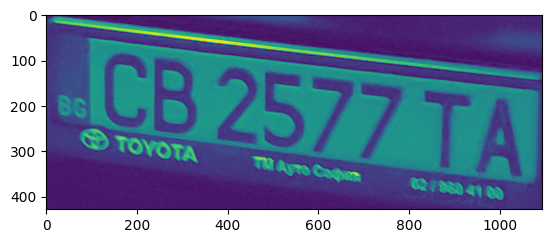

In [15]:
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline
testim = cv2.imread('/content/drive/MyDrive/NumberPlateRecognition/testcrop.png', cv2.IMREAD_GRAYSCALE)

imshow(testim)

In [13]:
import cv2
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline
# Load the grayscale image

def read_image1(img_path):
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

  # Image Enhancement
  enhanced_image = cv2.equalizeHist(image)

  # Noise Reduction (Gaussian Blur)
  blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

  # Thresholding
  _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Morphological Operations (Erosion and Dilation)
  kernel = np.ones((3, 3), np.uint8)
  eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
  dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
  return dilated_image

# Display the preprocessed images
# imshow(image)
# imshow(enhanced_image)
# imshow(blurred_image)
# imshow(thresholded_image)
# imshow(eroded_image)
# imshow(dilated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
!pip install easyocr ultralytics filterpy scikit-image lap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=63445bc6a7bf3b2fa2c602797e7ec257dce3f9cbf160d14cae331dbec302cc58
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1628961 sha256=a57a6de081d917ce9952cef8bb086c17bd7fab8ed019e00b545a87e7127f9374
  Stored in directory: /root/.cache/pip/wheels/00/42/2e/9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built filterpy lap


In [14]:
import cv2
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline
# Load the grayscale image

def read_image2(img_path):

  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

  # Image Enhancement
  enhanced_image = cv2.equalizeHist(image)

  # Noise Reduction (Gaussian Blur)
  blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

  # Adaptive Thresholding
  thresholded_image = cv2.adaptiveThreshold(
      blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
      cv2.THRESH_BINARY, 11, 2
  )

  # Morphological Operations (Erosion and Dilation)
  kernel = np.ones((3, 3), np.uint8)
  eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
  dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

  return dilated_image

  # Rotation and Alignment (Optional)
  # You can apply rotation or deskew operations here if needed.

  # Character Segmentation (Optional)
  # If characters are not well-separated, you can implement character segmentation here.


# Display the preprocessed images
# imshow(image)
# imshow(enhanced_image)
# imshow(blurred_image)
# imshow(thresholded_image)
# imshow(eroded_image)
# imshow(dilated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
import easyocr
import re


# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=True)

def read_license_plate(license_plate_crop):

    detections = reader.readtext(license_plate_crop, allowlist = "ABEKMHOXPCTYX1234567890")
    print(f"!!!DETECTIONS!!! : {detections}")
    if detections == None or detections == []:
        return None, 0

    for detection in detections:
        bbox, text, score = detection
        text = text.upper().replace(' ', '')
        print(text)

        # Check if license_plate_text matches the pattern
        pattern = r'^(?:EA|BT|BH|BR|EB|TX|KH|OB|PA|PK|EH|PV|PP|CC|CH|CM|CO|CA|CB|CT|A|B|E|K|M|H|O|P|C|T|Y|X)\d{4}[ABEKMHOXPCTYX]{2}$'
        print(f"re.match(pattern, text): {re.match(pattern, text)}")
        if re.match(pattern, text):
            return text, score
        else:
            return None, 0

def get_car(license_plate, vehicle_track_ids):

    x1, y1, x2, y2, score, class_id = license_plate

    foundIt = False
    for j in range(len(vehicle_track_ids)):
        xcar1, ycar1, xcar2, ycar2, car_id = vehicle_track_ids[j]

        if x1 > xcar1 and y1 > ycar1 and x2 < xcar2 and y2 < ycar2:
            car_indx = j
            foundIt = True
            break

    if foundIt:
        return vehicle_track_ids[car_indx]

    return -1, -1, -1, -1, -1

In [20]:
image_test = read_image1('/content/drive/MyDrive/NumberPlateRecognition/car5.jpg')
text, score = read_license_plate(image_test)

!!!DETECTIONS!!! : [([[0, 734], [293, 734], [293, 1006], [0, 1006]], '3', 0.9121620424964227), ([[1612, 1097], [1743, 1097], [1743, 1205], [1612, 1205]], 'CB', 0.6601762743713266), ([[1636, 1195], [1732, 1195], [1732, 1232], [1636, 1232]], '07', 0.5116371328184299), ([[1746.0029455144984, 1101.0382916884794], [2110.846353696086, 1149.007213831078], [2088.9970544855014, 1256.9617083115206], [1724.1536463039135, 1208.992786168922]], '2577TA', 0.9812830333510211)]
3
re.match(pattern, text): None


In [29]:
from __future__ import print_function

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io

import glob
import time
import argparse
from filterpy.kalman import KalmanFilter

np.random.seed(0)


def linear_assignment(cost_matrix):
  try:
    import lap
    _, x, y = lap.lapjv(cost_matrix, extend_cost=True)
    return np.array([[y[i],i] for i in x if i >= 0]) #
  except ImportError:
    from scipy.optimize import linear_sum_assignment
    x, y = linear_sum_assignment(cost_matrix)
    return np.array(list(zip(x, y)))


def iou_batch(bb_test, bb_gt):
  """
  From SORT: Computes IOU between two bboxes in the form [x1,y1,x2,y2]
  """
  bb_gt = np.expand_dims(bb_gt, 0)
  bb_test = np.expand_dims(bb_test, 1)

  xx1 = np.maximum(bb_test[..., 0], bb_gt[..., 0])
  yy1 = np.maximum(bb_test[..., 1], bb_gt[..., 1])
  xx2 = np.minimum(bb_test[..., 2], bb_gt[..., 2])
  yy2 = np.minimum(bb_test[..., 3], bb_gt[..., 3])
  w = np.maximum(0., xx2 - xx1)
  h = np.maximum(0., yy2 - yy1)
  wh = w * h
  o = wh / ((bb_test[..., 2] - bb_test[..., 0]) * (bb_test[..., 3] - bb_test[..., 1])
    + (bb_gt[..., 2] - bb_gt[..., 0]) * (bb_gt[..., 3] - bb_gt[..., 1]) - wh)
  return(o)


def convert_bbox_to_z(bbox):
  """
  Takes a bounding box in the form [x1,y1,x2,y2] and returns z in the form
    [x,y,s,r] where x,y is the centre of the box and s is the scale/area and r is
    the aspect ratio
  """
  w = bbox[2] - bbox[0]
  h = bbox[3] - bbox[1]
  x = bbox[0] + w/2.
  y = bbox[1] + h/2.
  s = w * h    #scale is just area
  r = w / float(h)
  return np.array([x, y, s, r]).reshape((4, 1))


def convert_x_to_bbox(x,score=None):
  """
  Takes a bounding box in the centre form [x,y,s,r] and returns it in the form
    [x1,y1,x2,y2] where x1,y1 is the top left and x2,y2 is the bottom right
  """
  w = np.sqrt(x[2] * x[3])
  h = x[2] / w
  if(score==None):
    return np.array([x[0]-w/2.,x[1]-h/2.,x[0]+w/2.,x[1]+h/2.]).reshape((1,4))
  else:
    return np.array([x[0]-w/2.,x[1]-h/2.,x[0]+w/2.,x[1]+h/2.,score]).reshape((1,5))


class KalmanBoxTracker(object):
  """
  This class represents the internal state of individual tracked objects observed as bbox.
  """
  count = 0
  def __init__(self,bbox):
    """
    Initialises a tracker using initial bounding box.
    """
    #define constant velocity model
    self.kf = KalmanFilter(dim_x=7, dim_z=4)
    self.kf.F = np.array([[1,0,0,0,1,0,0],[0,1,0,0,0,1,0],[0,0,1,0,0,0,1],[0,0,0,1,0,0,0],  [0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]])
    self.kf.H = np.array([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0]])

    self.kf.R[2:,2:] *= 10.
    self.kf.P[4:,4:] *= 1000. #give high uncertainty to the unobservable initial velocities
    self.kf.P *= 10.
    self.kf.Q[-1,-1] *= 0.01
    self.kf.Q[4:,4:] *= 0.01

    self.kf.x[:4] = convert_bbox_to_z(bbox)
    self.time_since_update = 0
    self.id = KalmanBoxTracker.count
    KalmanBoxTracker.count += 1
    self.history = []
    self.hits = 0
    self.hit_streak = 0
    self.age = 0

  def update(self,bbox):
    """
    Updates the state vector with observed bbox.
    """
    self.time_since_update = 0
    self.history = []
    self.hits += 1
    self.hit_streak += 1
    self.kf.update(convert_bbox_to_z(bbox))

  def predict(self):
    """
    Advances the state vector and returns the predicted bounding box estimate.
    """
    if((self.kf.x[6]+self.kf.x[2])<=0):
      self.kf.x[6] *= 0.0
    self.kf.predict()
    self.age += 1
    if(self.time_since_update>0):
      self.hit_streak = 0
    self.time_since_update += 1
    self.history.append(convert_x_to_bbox(self.kf.x))
    return self.history[-1]

  def get_state(self):
    """
    Returns the current bounding box estimate.
    """
    return convert_x_to_bbox(self.kf.x)


def associate_detections_to_trackers(detections, trackers, iou_threshold=0.3):
    """
    Assigns detections to tracked objects (both represented as bounding boxes)

    Returns 3 lists of matches, unmatched_detections, and unmatched_trackers
    """
    if len(trackers) == 0:
        return np.empty((0, 2), dtype=int), np.arange(len(detections)), np.empty((0, 5), dtype=int)

    if len(detections) == 0:
        return np.empty((0, 2), dtype=int), np.empty((0,), dtype=int), np.arange(len(trackers))

    iou_matrix = iou_batch(detections, trackers)

    if min(iou_matrix.shape) > 0:
        a = (iou_matrix > iou_threshold).astype(np.int32)
        if a.sum(1).max() == 1 and a.sum(0).max() == 1:
            matched_indices = np.stack(np.where(a), axis=1)
        else:
            matched_indices = linear_assignment(-iou_matrix)
    else:
        matched_indices = np.empty(shape=(0, 2))

    unmatched_detections = []
    for d, det in enumerate(detections):
        if d not in matched_indices[:, 0]:
            unmatched_detections.append(d)
    unmatched_trackers = []
    for t, trk in enumerate(trackers):
        if t not in matched_indices[:, 1]:
            unmatched_trackers.append(t)

    # filter out matched with low IOU
    matches = []
    for m in matched_indices:
        if iou_matrix[m[0], m[1]] < iou_threshold:
            unmatched_detections.append(m[0])
            unmatched_trackers.append(m[1])
        else:
            matches.append(m.reshape(1, 2))
    if len(matches) == 0:
        matches = np.empty((0, 2), dtype=int)
    else:
        matches = np.concatenate(matches, axis=0)

    return matches, np.array(unmatched_detections), np.array(unmatched_trackers)


class Sort(object):
  def __init__(self, max_age=1, min_hits=3, iou_threshold=0.3):
    """
    Sets key parameters for SORT
    """
    self.max_age = max_age
    self.min_hits = min_hits
    self.iou_threshold = iou_threshold
    self.trackers = []
    self.frame_count = 0

  def update(self, dets=np.empty((0, 5))):
    """
    Params:
      dets - a numpy array of detections in the format [[x1,y1,x2,y2,score],[x1,y1,x2,y2,score],...]
    Requires: this method must be called once for each frame even with empty detections (use np.empty((0, 5)) for frames without detections).
    Returns the a similar array, where the last column is the object ID.

    NOTE: The number of objects returned may differ from the number of detections provided.
    """
    self.frame_count += 1
    # get predicted locations from existing trackers.
    trks = np.zeros((len(self.trackers), 5))
    to_del = []
    ret = []
    for t, trk in enumerate(trks):
      pos = self.trackers[t].predict()[0]
      trk[:] = [pos[0], pos[1], pos[2], pos[3], 0]
      if np.any(np.isnan(pos)):
        to_del.append(t)
    trks = np.ma.compress_rows(np.ma.masked_invalid(trks))
    for t in reversed(to_del):
      self.trackers.pop(t)
    matched, unmatched_dets, unmatched_trks = associate_detections_to_trackers(dets,trks, self.iou_threshold)

    # update matched trackers with assigned detections
    for m in matched:
      self.trackers[m[1]].update(dets[m[0], :])

    # create and initialise new trackers for unmatched detections
    for i in unmatched_dets:
        trk = KalmanBoxTracker(dets[i,:])
        self.trackers.append(trk)
    i = len(self.trackers)
    for trk in reversed(self.trackers):
        d = trk.get_state()[0]
        if (trk.time_since_update < 1) and (trk.hit_streak >= self.min_hits or self.frame_count <= self.min_hits):
          ret.append(np.concatenate((d,[trk.id+1])).reshape(1,-1)) # +1 as MOT benchmark requires positive
        i -= 1
        # remove dead tracklet
        if(trk.time_since_update > self.max_age):
          self.trackers.pop(i)
    if(len(ret)>0):
      return np.concatenate(ret)
    return np.empty((0,5))

def parse_args():
    """Parse input arguments."""
    parser = argparse.ArgumentParser(description='SORT demo')
    parser.add_argument('--display', dest='display', help='Display online tracker output (slow) [False]',action='store_true')
    parser.add_argument("--seq_path", help="Path to detections.", type=str, default='data')
    parser.add_argument("--phase", help="Subdirectory in seq_path.", type=str, default='train')
    parser.add_argument("--max_age",
                        help="Maximum number of frames to keep alive a track without associated detections.",
                        type=int, default=1)
    parser.add_argument("--min_hits",
                        help="Minimum number of associated detections before track is initialised.",
                        type=int, default=3)
    parser.add_argument("--iou_threshold", help="Minimum IOU for match.", type=float, default=0.3)
    args, unknown = parser.parse_known_args()
    return args

if __name__ == '__main__':
  # all train
  args = parse_args()
  display = args.display
  phase = args.phase
  total_time = 0.0
  total_frames = 0
  colours = np.random.rand(32, 3) #used only for display
  if(display):
    if not os.path.exists('mot_benchmark'):
      print('\n\tERROR: mot_benchmark link not found!\n\n    Create a symbolic link to the MOT benchmark\n    (https://motchallenge.net/data/2D_MOT_2015/#download). E.g.:\n\n    $ ln -s /path/to/MOT2015_challenge/2DMOT2015 mot_benchmark\n\n')
      exit()
    plt.ion()
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')

  if not os.path.exists('output'):
    os.makedirs('output')
  pattern = os.path.join(args.seq_path, phase, '*', 'det', 'det.txt')
  for seq_dets_fn in glob.glob(pattern):
    mot_tracker = Sort(max_age=args.max_age,
                       min_hits=args.min_hits,
                       iou_threshold=args.iou_threshold) #create instance of the SORT tracker
    seq_dets = np.loadtxt(seq_dets_fn, delimiter=',')
    seq = seq_dets_fn[pattern.find('*'):].split(os.path.sep)[0]

    with open(os.path.join('output', '%s.txt'%(seq)),'w') as out_file:
      print("Processing %s."%(seq))
      for frame in range(int(seq_dets[:,0].max())):
        frame += 1 #detection and frame numbers begin at 1
        dets = seq_dets[seq_dets[:, 0]==frame, 2:7]
        dets[:, 2:4] += dets[:, 0:2] #convert to [x1,y1,w,h] to [x1,y1,x2,y2]
        total_frames += 1

        if(display):
          fn = os.path.join('mot_benchmark', phase, seq, 'img1', '%06d.jpg'%(frame))
          im =io.imread(fn)
          ax1.imshow(im)
          plt.title(seq + ' Tracked Targets')

        start_time = time.time()
        trackers = mot_tracker.update(dets)
        cycle_time = time.time() - start_time
        total_time += cycle_time

        for d in trackers:
          print('%d,%d,%.2f,%.2f,%.2f,%.2f,1,-1,-1,-1'%(frame,d[4],d[0],d[1],d[2]-d[0],d[3]-d[1]),file=out_file)
          if(display):
            d = d.astype(np.int32)
            ax1.add_patch(patches.Rectangle((d[0],d[1]),d[2]-d[0],d[3]-d[1],fill=False,lw=3,ec=colours[d[4]%32,:]))

        if(display):
          fig.canvas.flush_events()
          plt.draw()
          ax1.cla()

  # print("Total Tracking took: %.3f seconds for %d frames or %.1f FPS" % (total_time, total_frames, total_frames / total_time))

  if(display):
    print("Note: to get real runtime results run without the option: --display")

In [37]:
import cv2
import csv
from ultralytics import YOLO


results = {}

mot_tracker = Sort(max_age=60, min_hits=50)

# load models
yolo_model = YOLO('yolov8n.pt')
license_plate_detector = YOLO('/content/drive/MyDrive/NumberPlateRecognition/licence_plate_model_1.pt')

# load video
capture = cv2.VideoCapture('/content/drive/MyDrive/NumberPlateRecognition/videos/cars2.mp4')

#init super resolution model
# sr = dnn_superres.DnnSuperResImpl_create()
# superResolutionModel = 'models/ESPCN_x2.pb'
# sr.readModel(superResolutionModel)
# sr.setModel("espcn", 2)

vehicles = [2, 3, 5, 7]

# uncomment to export frames
# frame_list = []

frame_nmr = -1
isStillReading = True
while isStillReading:

    frame_nmr += 1
    isStillReading, frame = capture.read()

    if isStillReading:
        results[frame_nmr] = {}
        foundVehicle = False  # Initialize foundVehicle flag
        # detect vehicles
        detections = yolo_model(frame)[0]
        detections_ = []
        for detection in detections.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = detection
            if int(class_id) in vehicles:
                detections_.append([x1, y1, x2, y2, score])
                print(f"score: {score}")
                foundVehicle = True

        if foundVehicle:
            # Uncomment to append the frame to the frame list
            # frame_list.append(frame)

            # track vehicles
            print(f"detection: {detections_}")
            track_ids = mot_tracker.update(np.asarray(detections_))

            # detect license plates
            license_plates = license_plate_detector(frame)[0]
            for license_plate in license_plates.boxes.data.tolist():
                x1, y1, x2, y2, score, class_id = license_plate
                #add logic to check license plate confidence
                if score > 0.77:
                    # assign license plate to car
                    xcar1, ycar1, xcar2, ycar2, car_id = get_car(license_plate, track_ids)

                    if car_id != -1:

                        # crop license plate
                        license_plate_crop = frame[int(y1):int(y2), int(x1): int(x2), :]

                        # Super resolution
                        # license_plate_crop = sr.upsample(license_plate_crop) # Comment out if needed

                        # resize license plate crop x2
                        resized_license_plate_crop = cv2.resize(
                            license_plate_crop, None, fx = 2, fy = 2,
                            interpolation = cv2.INTER_CUBIC)
                        # Uncomment to export license plate crops

                        # if not os.path.exists("exportedLicensePlates"):
                        #     os.makedirs("exportedLicensePlates")
                        # cv2.imwrite(f"exportedLicensePlates\img{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.png", license_plate_crop)

                        # process license plate
                        licence_plate_crop_gray = cv2.cvtColor(resized_license_plate_crop, cv2.COLOR_BGR2GRAY)

                        # Image Enhancement
                        enhanced_image = cv2.equalizeHist(licence_plate_crop_gray)

                        # Noise Reduction (Gaussian Blur)
                        blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

                        # Adaptive Thresholding
                        thresholded_image = cv2.adaptiveThreshold(
                            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2
                        )

                        # Morphological Operations (Erosion and Dilation)
                        kernel = np.ones((3, 3), np.uint8)
                        eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
                        dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

                        # _, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

                        # EasyOCR
                        license_plate_text, license_plate_text_score = read_license_plate(blurred_image)

                        # Pytesseract
                        # import pytesseract
                        # license_plate_text = pytesseract.image_to_string(license_plate_crop_thresh, lang ='eng', config ='--oem 3 --psm 6 -c tessedit_char_whitelist = ABEKMHOXPCTYX1234567890') # if doesnt work, try license_plate_crop_gray

                        if license_plate_text is not None:
                            results[frame_nmr][car_id] = {'license_plate': {'text': license_plate_text, 'text_score': license_plate_text_score}}

# Filter out empty elements from the results dictionary
filtered_results = {frame_key: frame_data for frame_key, frame_data in results.items() if frame_data}

# Define the CSV file path
csv_file_path = 'test.csv'

# Write the filtered results to the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Frame Number', 'Car ID', 'License Plate', 'License Plate Score'])

    for frame_key, frame_data in filtered_results.items():
        for car_id, car_info in frame_data.items():
            license_plate_info = car_info.get('license_plate', {})
            license_plate_text = license_plate_info.get('text', 'N/A')
            license_plate_score = license_plate_info.get('text_score', 'N/A')
            csv_writer.writerow([frame_key, car_id, license_plate_text, license_plate_score])

print("Filtered results have been written to", csv_file_path)


# Uncomment to export frames

# if not os.path.exists("output_frames"):
#     os.makedirs("output_frames")

# prediced_frames = frame_list[::]

# for i, frame in enumerate(prediced_frames):
#     frame_filename = os.path.join("output_frames", f"frame_{i+1}.jpg")
#     cv2.imwrite(frame_filename, frame)


0: 384x640 1 car, 1 truck, 30.6ms
Speed: 2.7ms preprocess, 30.6ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9193633794784546
score: 0.8924939036369324
detection: [[200.18862915039062, 67.0018539428711, 599.7293090820312, 355.9821472167969, 0.9193633794784546], [687.5814208984375, 15.476221084594727, 1023.6463012695312, 358.5350036621094, 0.8924939036369324]]



0: 384x640 2 Licence Plates, 28.3ms
Speed: 13.9ms preprocess, 28.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 27.1ms
Speed: 3.1ms preprocess, 27.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.8ms
Speed: 19.1ms preprocess, 16.8ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 4], [234, 4], [234, 54], [18, 54]], 'CB8721TB', 0.9999770298582858)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9170111417770386
score: 0.8914145231246948
detection: [[200.54014587402344, 67.421875, 601.4855346679688, 356.500732421875, 0.9170111417770386], [687.7267456054688, 15.773877143859863, 1023.6412353515625, 358.70367431640625, 0.8914145231246948]]



0: 384x640 2 cars, 1 truck, 43.5ms
Speed: 2.7ms preprocess, 43.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.0ms
Speed: 2.7ms preprocess, 15.0ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 2], [234, 2], [234, 54], [18, 54]], 'CB8721TB', 0.9851097761042286)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9193286299705505
score: 0.8984670639038086
score: 0.28494852781295776
detection: [[197.54061889648438, 66.80250549316406, 597.4631958007812, 354.6576843261719, 0.9193286299705505], [687.044921875, 13.71311092376709, 1023.3937377929688, 356.59393310546875, 0.8984670639038086], [557.5338745117188, 129.1726531982422, 602.4276733398438, 274.96856689453125, 0.28494852781295776]]



0: 384x640 1 car, 1 truck, 18.1ms
Speed: 5.6ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 27.2ms
Speed: 4.3ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 36.7ms


!!!DETECTIONS!!! : [([[18, 4], [234, 4], [234, 56], [18, 56]], 'CB8721TB', 0.6303564750237027)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9346765279769897
score: 0.8764452338218689
detection: [[194.6466827392578, 72.52679443359375, 593.1505737304688, 361.20416259765625, 0.9346765279769897], [685.6306762695312, 19.076513290405273, 1023.6605834960938, 362.14654541015625, 0.8764452338218689]]
!!!DETECTIONS!!! : [([[16, 4], [234, 4], [234, 54], [16, 54]], 'CB8721TB', 0.9998824074287136)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>


Speed: 7.7ms preprocess, 36.7ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 35.9ms
Speed: 5.1ms preprocess, 35.9ms inference, 10.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 14.4ms
Speed: 5.1ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9308390617370605
score: 0.8494535684585571
detection: [[194.53384399414062, 78.26219940185547, 595.9635620117188, 365.6498107910156, 0.9308390617370605], [683.8135986328125, 23.298816680908203, 1023.54931640625, 364.5355529785156, 0.8494535684585571]]
!!!DETECTIONS!!! : [([[16, 6], [232, 6], [232, 56], [16, 56]], 'CB8721TB', 0.9992342515947058)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9273830056190491
score: 0.8460812568664551
detection: [[195.59654235839844, 78.9659194946289, 596.73828125, 365.85308837890625, 0.9273830056190491], [685.1605834960938, 23.139209747314453, 1023.5704956054688, 363.50518798828125, 0.8460812568664551]]



0: 384x640 2 Licence Plates, 50.8ms
Speed: 15.9ms preprocess, 50.8ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 21.1ms
Speed: 2.7ms preprocess, 21.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 27.5ms
Speed: 4.7ms preprocess, 27.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 34.5ms


!!!DETECTIONS!!! : [([[16, 4], [232, 4], [232, 54], [16, 54]], 'CB8721TB', 0.9999341159141182)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9325448870658875
score: 0.8525697588920593
detection: [[194.7246551513672, 80.18017578125, 597.3013305664062, 367.49151611328125, 0.9325448870658875], [685.4293212890625, 24.514404296875, 1023.5632934570312, 365.7474060058594, 0.8525697588920593]]
!!!DETECTIONS!!! : [([[16, 4], [232, 4], [232, 54], [16, 54]], 'CB8721TB', 0.8730010443334423)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>


Speed: 2.4ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 29.3ms
Speed: 2.6ms preprocess, 29.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9332479238510132
score: 0.728770911693573
detection: [[194.099853515625, 82.30220031738281, 593.1025390625, 368.4047546386719, 0.9332479238510132], [684.4003295898438, 26.38966178894043, 1023.5624389648438, 367.7964782714844, 0.728770911693573]]
!!!DETECTIONS!!! : [([[12, 4], [229, 4], [229, 55], [12, 55]], 'CB8721TB', 0.9983872028509837)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[14, 2], [256, 2], [256, 62], [14, 62]], 'KH5888BE', 0.9989663801099977)]
KH5888BE
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BE'>



0: 384x640 1 car, 1 truck, 24.7ms
Speed: 5.7ms preprocess, 24.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 32.2ms
Speed: 2.7ms preprocess, 32.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 25.8ms


score: 0.9352438449859619
score: 0.7944883704185486
detection: [[193.9482421875, 87.0615005493164, 591.07421875, 374.5279235839844, 0.9352438449859619], [682.947021484375, 31.22590446472168, 1023.6232299804688, 373.0811462402344, 0.7944883704185486]]
!!!DETECTIONS!!! : [([[13, 3], [232, 3], [232, 59], [13, 59]], 'CCB8721TB', 0.7816941254441713)]
CCB8721TB
re.match(pattern, text): None


Speed: 2.8ms preprocess, 25.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 23.9ms
Speed: 6.6ms preprocess, 23.9ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 13.5ms
Speed: 5.4ms preprocess, 13.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9443395733833313
score: 0.8010957837104797
detection: [[191.925048828125, 96.61128234863281, 591.90185546875, 385.73681640625, 0.9443395733833313], [680.3333129882812, 39.59050369262695, 1023.65185546875, 383.8681335449219, 0.8010957837104797]]
!!!DETECTIONS!!! : [([[14, 4], [232, 4], [232, 58], [14, 58]], 'CB8721TB', 0.6400172689136631)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9345963597297668
score: 0.5898621678352356
score: 0.5770899057388306
detection: [[188.1083526611328, 102.36547088623047, 593.2860717773438, 390.0144958496094, 0.9345963597297668], [678.0285034179688, 46.2080078125, 1023.7039184570312, 382.7169494628906, 0.5898621678352356], [678.1156616210938, 48.389259338378906, 1023.5787353515625, 380.3154296875, 0.5770899057388306]]


0: 384x640 2 Licence Plates, 22.2ms
Speed: 4.4ms preprocess, 22.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 13.6ms
Speed: 3.5ms preprocess, 13.6ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 25.7ms
Speed: 2.5ms preprocess, 25.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[12, 4], [230, 4], [230, 58], [12, 58]], 'CB8721TB', 0.9669710929504888)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9374790787696838
score: 0.6508318185806274
score: 0.506015956401825
detection: [[185.4794921875, 105.3466796875, 590.7496337890625, 392.53887939453125, 0.9374790787696838], [675.6268310546875, 48.027137756347656, 1023.6470947265625, 391.14239501953125, 0.6508318185806274], [675.94482421875, 47.471534729003906, 1023.3170776367188, 392.5138854980469, 0.506015956401825]]
!!!DETECTIONS!!! : [([[17, 1], [272, 1], [272, 58], [17, 58]], 'KH5888BB', 0.9884506534176588)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>



0: 384x640 2 cars, 1 truck, 13.4ms
Speed: 3.2ms preprocess, 13.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 32.2ms
Speed: 4.7ms preprocess, 32.2ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[14, 4], [232, 4], [232, 58], [14, 58]], 'CB8721TB', 0.9798260038820121)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9362862706184387
score: 0.6773012280464172
score: 0.47472870349884033
detection: [[180.96612548828125, 110.35273742675781, 585.9552001953125, 393.7025451660156, 0.9362862706184387], [674.219970703125, 52.97710037231445, 1023.6484375, 381.301025390625, 0.6773012280464172], [674.1498413085938, 53.42147445678711, 1023.6146850585938, 383.17364501953125, 0.47472870349884033]]
!!!DETECTIONS!!! : [([[18, 6], [270, 6], [270, 60], [18, 60]], 'KH5888BB', 0.9999384648169385)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[10, 2], [228, 2], [228, 58], [10, 58]], 'CB8721TB', 0.9945261614677873)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>


0: 384x640 1 car, 1 truck, 14.7ms
Speed: 2.9ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.1ms
Speed: 5.4ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 12.6ms
Speed: 2.7ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9384311437606812
score: 0.6038748025894165
detection: [[177.0715789794922, 108.867431640625, 582.5702514648438, 393.2154846191406, 0.9384311437606812], [670.88134765625, 51.281494140625, 1023.5465698242188, 388.9137878417969, 0.6038748025894165]]
!!!DETECTIONS!!! : [([[10, 2], [228, 2], [228, 58], [10, 58]], 'CB8721TB', 0.735330897049213)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[18, 2], [269, 2], [269, 55], [18, 55]], 'KH5888BB', 0.9999753018204368)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9212501049041748
score: 0.7299674153327942
detection: [[174.59010314941406, 100.54951477050781, 580.691162109375, 391.96588134765625, 0.9212501049041748], [671.022216796875, 45.05078125, 1023.61328125, 362.3699645996094, 0.7299674153327942]]


0: 384x640 2 Licence Plates, 21.1ms
Speed: 4.8ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.5ms
Speed: 2.7ms preprocess, 17.5ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[20, 4], [268, 4], [268, 58], [20, 58]], 'KH5888BB', 0.880978454737712)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : []
score: 0.9159994721412659
score: 0.780990719795227
detection: [[166.19305419921875, 117.49259185791016, 574.8864135742188, 401.4790954589844, 0.9159994721412659], [663.6997680664062, 60.798683166503906, 1023.5865478515625, 385.27740478515625, 0.780990719795227]]
!!!DETECTIONS!!! : [([[16, 4], [266, 4], [266, 58], [16, 58]], 'KH58888B', 0.7826582630127441)]
KH58888B
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[10, 3], [228, 3], [228, 60], [10, 60]], 'CB8721TB', 0.5974370408103988)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>


0: 384x640 1 car, 1 bus, 1 truck, 29.4ms
Speed: 4.3ms preprocess, 29.4ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.3ms
Speed: 2.9ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 13.6ms
Speed: 2.7ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9416104555130005
score: 0.5445213317871094
score: 0.3444395661354065
detection: [[160.5702667236328, 119.3201675415039, 569.8866577148438, 409.2734375, 0.9416104555130005], [659.3688354492188, 61.36955642700195, 1023.9306030273438, 389.50946044921875, 0.5445213317871094], [659.3851318359375, 61.66476058959961, 1023.8598022460938, 389.4117126464844, 0.3444395661354065]]
!!!DETECTIONS!!! : [([[10, 0], [233, 0], [233, 58], [10, 58]], 'CB8721TB', 0.40586063568297315)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[18, 6], [270, 6], [270, 60], [18, 60]], 'KH5888BB', 0.9675179753111784)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9437633156776428
score: 0.6109141707420349
detection: [[153.6898956298828, 122.70722961425781, 565.3662719726562, 411.59014892578125, 0.9437633156776428], [652.0053100585938, 66.0223617553711, 1023.8759765625, 398.4983825683594, 0.6109141707420349]]



0: 384x640 1 car, 1 truck, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 1 truck, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 6], [266, 6], [266, 62], [18, 62]], 'KH5888BB', 0.9662053231880342)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[11, 0], [230, 0], [230, 55], [11, 55]], 'CB8721TB', 0.763070803371573)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9353072643280029
score: 0.709064781665802
detection: [[145.52627563476562, 124.7962417602539, 561.3961181640625, 418.7608337402344, 0.9353072643280029], [646.1857299804688, 68.6005859375, 1023.9150390625, 399.5508728027344, 0.709064781665802]]
!!!DETECTIONS!!! : [([[20, 6], [270, 6], [270, 62], [20, 62]], 'KH5888BB', 0.9989941666232692)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[7, 0], [227, 0], [227, 58], [7, 58]], 'CB8221TB', 0.6043058863922908)]
CB8221TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8221TB'>



0: 384x640 2 Licence Plates, 25.9ms
Speed: 5.7ms preprocess, 25.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 10.2ms
Speed: 4.2ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9333664774894714
score: 0.6145022511482239
detection: [[136.1793975830078, 132.21661376953125, 550.2932739257812, 421.84405517578125, 0.9333664774894714], [638.1344604492188, 73.9356460571289, 1023.8358764648438, 402.5518493652344, 0.6145022511482239]]
!!!DETECTIONS!!! : [([[12, 0], [263, 0], [263, 57], [12, 57]], 'KH5888BB', 0.9914648174568764)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[6, 0], [226, 0], [226, 54], [6, 54]], 'CB8721TB', 0.9958998425847232)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.935089647769928
score: 0.4948388934135437
score: 0.4225541651248932
detection: [[126.1836929321289, 135.23165893554688, 541.21533203125, 423.8817443847656, 0.935089647769928], [632.3412475585938, 73.15211486816406, 1023.8283081054688, 406.751220703125, 0.4948388934135437], [631.6024780273438, 74.05303192138672, 1023.5020751953125, 403.7194519042969, 0.4225541651248932]]


0: 384x640 2 Licence Plates, 25.2ms
Speed: 4.5ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 13.1ms
Speed: 2.7ms preprocess, 13.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 29.3ms
Speed: 2.6ms preprocess, 29.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[20, 4], [266, 4], [266, 60], [20, 60]], 'KH5888BB', 0.9996713164995414)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[8, 2], [226, 2], [226, 56], [8, 56]], 'CB8721TB', 0.7478309405537714)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.942159116268158
score: 0.4401797354221344
score: 0.41551780700683594
detection: [[114.4115219116211, 139.4838104248047, 531.03955078125, 426.3955078125, 0.942159116268158], [622.6503295898438, 78.37895965576172, 1023.5051879882812, 393.2112731933594, 0.4401797354221344], [622.8511962890625, 78.02680969238281, 1023.6968994140625, 393.2196960449219, 0.41551780700683594]]
!!!DETECTIONS!!! : [([[16, 2], [262, 2], [262, 59], [16, 59]], 'KH5888BB', 0.9697956824535152)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>



0: 384x640 1 car, 1 truck, 12.7ms
Speed: 3.6ms preprocess, 12.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 25.1ms
Speed: 4.7ms preprocess, 25.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[8, 0], [228, 0], [228, 56], [8, 56]], 'CB8721TB', 0.9389452570774268)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9459701776504517
score: 0.6135265231132507
detection: [[103.0787124633789, 144.1454620361328, 522.9315795898438, 433.5321960449219, 0.9459701776504517], [611.5009155273438, 84.32319641113281, 1023.7738647460938, 409.78472900390625, 0.6135265231132507]]
!!!DETECTIONS!!! : [([[13, 0], [232, 0], [232, 58], [13, 58]], 'CB8721TB', 0.8112208055775376)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[16, 0], [262, 0], [262, 61], [16, 61]], 'KH5888BB', 0.9632197966602011)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>


0: 384x640 2 cars, 1 truck, 14.0ms
Speed: 2.6ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.4ms
Speed: 6.6ms preprocess, 21.4ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 11.6ms
Speed: 4.5ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9435274004936218
score: 0.7171622514724731
score: 0.3374169170856476
detection: [[88.4817886352539, 147.8292999267578, 512.0418090820312, 437.4227600097656, 0.9435274004936218], [598.3983764648438, 87.71294403076172, 1023.9577026367188, 428.41943359375, 0.7171622514724731], [979.6101684570312, 153.34104919433594, 1023.69140625, 243.2130126953125, 0.3374169170856476]]
!!!DETECTIONS!!! : [([[9, 0], [230, 0], [230, 59], [9, 59]], 'CB8721TB', 0.9966819563072778)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[20, 0], [266, 0], [266, 61], [20, 61]], 'KH5888BB', 0.8981627372676781)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9345090985298157
score: 0.6232626438140869
score: 0.495810866355896
score: 0.45277366042137146
detection: [[72.65303039550781, 151.60487365722656, 497.3771667480469, 443.2198181152344, 0.9345090985298157], [585.4993286132812, 92.08634185791016, 1019.002563

0: 384x640 2 Licence Plates, 26.8ms
Speed: 8.7ms preprocess, 26.8ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 12.8ms
Speed: 3.8ms preprocess, 12.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 23.2ms
Speed: 8.2ms preprocess, 23.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[16, 1], [262, 1], [262, 62], [16, 62]], 'KH5888BB', 0.9873299494412079)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[9, 0], [236, 0], [236, 62], [9, 62]], 'CCB8721TB', 0.7147467910259873)]
CCB8721TB
re.match(pattern, text): None
score: 0.9413082599639893
score: 0.688894510269165
score: 0.5451866388320923
detection: [[55.53759765625, 155.5745086669922, 484.7410583496094, 443.6214904785156, 0.9413082599639893], [571.5950317382812, 95.98866271972656, 998.6190795898438, 436.79571533203125, 0.688894510269165], [951.0914306640625, 144.8463592529297, 1023.7605590820312, 359.6592712402344, 0.5451866388320923]]
!!!DETECTIONS!!! : [([[14, 1], [258, 1], [258, 61], [14, 61]], 'KH5888BB', 0.8278546448133449)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>



0: 384x640 4 cars, 1 truck, 12.8ms
Speed: 4.7ms preprocess, 12.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.9ms
Speed: 4.4ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[2, 0], [229, 0], [229, 62], [2, 62]], 'CB8721TB', 0.9754972764188892)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9377530217170715
score: 0.5882399678230286
score: 0.5092967748641968
score: 0.4870348274707794
score: 0.48616307973861694
detection: [[39.30825424194336, 158.18603515625, 469.9714050292969, 446.398193359375, 0.9377530217170715], [932.7642822265625, 130.57774353027344, 1023.6876831054688, 342.05908203125, 0.5882399678230286], [557.9678955078125, 99.24785614013672, 984.4078369140625, 436.3516540527344, 0.5092967748641968], [558.7142944335938, 98.71317291259766, 984.546875, 435.3348693847656, 0.4870348274707794], [527.0514526367188, 165.6090850830078, 588.0307006835938, 282.1369323730469, 0.48616307973861694]]
!!!DETECTIONS!!! : [([[22, 4], [264, 4], [264, 60], [22, 60]], 'KH5888BB', 0.999938633408624)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [(

0: 384x640 4 cars, 1 truck, 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 32.0ms
Speed: 3.7ms preprocess, 32.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.4ms
Speed: 5.3ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9269921779632568
score: 0.6840097308158875
score: 0.5655670166015625
score: 0.38919597864151
score: 0.363966703414917
detection: [[20.21064567565918, 162.00498962402344, 457.59747314453125, 448.7772521972656, 0.9269921779632568], [540.78125, 100.3336410522461, 967.3510131835938, 443.0926818847656, 0.6840097308158875], [917.7072143554688, 134.21347045898438, 1023.7998046875, 361.4025573730469, 0.5655670166015625], [918.54296875, 134.7312469482422, 1023.60546875, 293.0082092285156, 0.38919597864151], [514.1146850585938, 168.76251220703125, 573.0698852539062, 287.95782470703125, 0.363966703414917]]
!!!DETECTIONS!!! : [([[17, 0], [260, 0], [260, 59], [17, 59]], 'KH5888BB', 0.9990718743986623)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[11, 0], [236, 0], [236, 62], [11, 62]], 'CB8721TB', 0.9894102584711427)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9414462447166443
scor


0: 384x640 4 cars, 1 truck, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 29.2ms
Speed: 3.3ms preprocess, 29.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[22, 0], [262, 0], [262, 59], [22, 59]], 'KH5888BB', 0.9998134086906842)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[6, 0], [228, 0], [228, 56], [6, 56]], 'CCB8721TB', 0.8312183476872521)]
CCB8721TB
re.match(pattern, text): None
score: 0.9223160147666931
score: 0.75173020362854
score: 0.6219182014465332
score: 0.4358234703540802
score: 0.2915143370628357
detection: [[0.209228515625, 162.5067901611328, 429.7238464355469, 453.2095642089844, 0.9223160147666931], [889.1199340820312, 135.20654296875, 1023.466796875, 368.8420104980469, 0.75173020362854], [506.4188537597656, 106.2013168334961, 931.3456420898438, 442.54443359375, 0.6219182014465332], [506.9483337402344, 105.12440490722656, 930.4143676757812, 441.1787109375, 0.4358234703540802], [484.1166076660156, 183.7906951904297, 542.1096801757812, 286.7286376953125, 0.2915143370628357]]
!!!DETECTIONS!!! : [([[14, 0], [254, 0], [254, 55], [14, 55]], 'KH5888


0: 384x640 3 cars, 1 truck, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 22.4ms
Speed: 3.0ms preprocess, 22.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[13, 0], [242, 0], [242, 66], [13, 66]], 'CB8721TB', 0.9023135818450405)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9424940347671509
score: 0.862657904624939
score: 0.5676824450492859
score: 0.41085341572761536
detection: [[0.0, 164.95205688476562, 413.7254333496094, 460.3671569824219, 0.9424940347671509], [866.8976440429688, 137.40689086914062, 1023.6656494140625, 390.70849609375, 0.862657904624939], [484.2955017089844, 107.60099029541016, 913.5759887695312, 445.5918884277344, 0.5676824450492859], [484.740234375, 107.07430267333984, 912.2006225585938, 446.3617248535156, 0.41085341572761536]]
!!!DETECTIONS!!! : [([[13, 0], [254, 0], [254, 57], [13, 57]], 'KH5888BB', 0.8596763557526553)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[13, 1], [242, 1], [242, 65], [13, 65]], 'CB8721TB', 0.7258387153174514)]
CB8721TB
re.match(pattern, text): <re.Match object; s

0: 384x640 3 cars, 1 truck, 12.8ms
Speed: 4.5ms preprocess, 12.8ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 14.3ms
Speed: 6.6ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.3ms
Speed: 2.9ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


score: 0.926015317440033
score: 0.8846195936203003
score: 0.5120423436164856
score: 0.5026759505271912
detection: [[0.0, 164.64894104003906, 401.6028137207031, 460.96368408203125, 0.926015317440033], [856.7008056640625, 136.05746459960938, 1023.6179809570312, 414.1383361816406, 0.8846195936203003], [470.8869323730469, 107.35737609863281, 895.2640991210938, 445.6297912597656, 0.5120423436164856], [472.0915222167969, 107.00166320800781, 894.3699340820312, 446.009765625, 0.5026759505271912]]
!!!DETECTIONS!!! : [([[9, 1], [240, 1], [240, 65], [9, 65]], 'CB8721TB', 0.9791673459916831)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
!!!DETECTIONS!!! : [([[19, 0], [256, 0], [256, 59], [19, 59]], 'KH5888BB', 0.5805953488139092)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9261899590492249
score: 0.8633146286010742
score: 0.5833581686019897
score: 0.4017084240913391
detection: [[0.0, 162.51724243164062, 387.0928


0: 384x640 3 cars, 1 truck, 14.8ms
Speed: 3.1ms preprocess, 14.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 20.1ms
Speed: 3.5ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[5, 0], [238, 0], [238, 60], [5, 60]], 'CB8721TB1', 0.48063814583452774)]
CB8721TB1
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[14, 0], [253, 0], [253, 61], [14, 61]], 'KH5888BB', 0.9323343878292473)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9223484396934509
score: 0.870060384273529
score: 0.5356124639511108
score: 0.39173468947410583
detection: [[0.23471680283546448, 160.76034545898438, 376.6248474121094, 457.9089050292969, 0.9223484396934509], [825.541015625, 134.5771026611328, 1023.4324340820312, 424.8334655761719, 0.870060384273529], [447.9541931152344, 106.89765930175781, 864.7089233398438, 445.3709411621094, 0.5356124639511108], [447.6963806152344, 106.21046447753906, 864.1646728515625, 443.3058776855469, 0.39173468947410583]]



0: 384x640 3 cars, 1 truck, 11.9ms
Speed: 4.1ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 35.9ms
Speed: 5.1ms preprocess, 35.9ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[14, 0], [252, 0], [252, 57], [14, 57]], 'KH5888BB', 0.7352021703862459)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[9, 0], [245, 0], [245, 66], [9, 66]], 'CB8721TB', 0.6853012073980178)]
CB8721TB
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB8721TB'>
score: 0.9323179125785828
score: 0.8965214490890503
score: 0.587760329246521
score: 0.44359102845191956
detection: [[0.3373046815395355, 160.47021484375, 362.3136291503906, 454.57275390625, 0.9323179125785828], [813.6282348632812, 134.8102569580078, 1023.5243530273438, 426.4877014160156, 0.8965214490890503], [431.91778564453125, 105.6241683959961, 848.53515625, 443.0077209472656, 0.587760329246521], [432.8309631347656, 105.3558578491211, 848.2874145507812, 444.1083068847656, 0.44359102845191956]]



0: 384x640 3 cars, 1 truck, 14.9ms
Speed: 3.2ms preprocess, 14.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.4ms
Speed: 4.6ms preprocess, 18.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[17, 0], [254, 0], [254, 57], [17, 57]], 'KH5888BB', 0.9987528054017296)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[0, 1], [213, 1], [213, 61], [0, 61]], 'B8721TB', 0.7253976309328933)]
B8721TB
re.match(pattern, text): <re.Match object; span=(0, 7), match='B8721TB'>
score: 0.928650975227356
score: 0.8954359889030457
score: 0.5542009472846985
score: 0.48610326647758484
detection: [[0.3833251893520355, 159.0075225830078, 349.8442077636719, 454.6841735839844, 0.928650975227356], [798.7357177734375, 135.14468383789062, 1023.4943237304688, 430.1329650878906, 0.8954359889030457], [418.4235534667969, 105.1844253540039, 834.5136108398438, 443.2281799316406, 0.5542009472846985], [419.4266662597656, 104.62983703613281, 834.0411376953125, 444.4400329589844, 0.48610326647758484]]
!!!DETECTIONS!!! : [([[15, 0], [250, 0], [250, 56], [15, 56]], 'KH5888BB', 0.9904452483640174)]
KH5888BB
re.match(pattern, text): <re.M


0: 384x640 3 cars, 1 truck, 12.0ms
Speed: 2.7ms preprocess, 12.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.5ms
Speed: 4.8ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 7.0ms
Speed: 3.8ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.5ms
Speed: 3.1ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 1], [178, 1], [178, 63], [0, 63]], '8721TB', 0.9173564699051878)]
8721TB
re.match(pattern, text): None
score: 0.923181414604187
score: 0.9212503433227539
score: 0.7097032070159912
score: 0.4470239281654358
detection: [[786.3129272460938, 134.36761474609375, 1023.3930053710938, 428.6780700683594, 0.923181414604187], [0.25275880098342896, 157.7916717529297, 337.7818298339844, 449.7535705566406, 0.9212503433227539], [405.9273376464844, 104.1793441772461, 819.3471069335938, 446.3550720214844, 0.7097032070159912], [405.1036682128906, 105.22246551513672, 818.5162963867188, 443.54638671875, 0.4470239281654358]]
!!!DETECTIONS!!! : [([[15, 0], [252, 0], [252, 58], [15, 58]], 'KH5888BB', 0.999699263503532)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
!!!DETECTIONS!!! : [([[0, 0], [148, 0], [148, 61], [0, 61]], '221TB1', 0.563403261912208)]
221TB1
re.match(pattern, text): None
score: 0.9299170970916748
score: 0.9066696166992188
scor


0: 384x640 2 cars, 1 truck, 8.0ms
Speed: 3.4ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 cars, 1 truck, 7.5ms
Speed: 3.3ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.5ms
Speed: 3.3ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[0, 0], [116, 0], [116, 62], [0, 62]], 'TB', 0.9662808014403123)]
TB
re.match(pattern, text): None
score: 0.9239400625228882
score: 0.9085724949836731
score: 0.6927272081375122
detection: [[758.2821655273438, 130.98948669433594, 1023.3233642578125, 428.1521911621094, 0.9239400625228882], [0.05446777492761612, 152.50108337402344, 315.1747131347656, 448.6246032714844, 0.9085724949836731], [378.07647705078125, 99.4517593383789, 790.2482299804688, 442.3854675292969, 0.6927272081375122]]
!!!DETECTIONS!!! : [([[14, 4], [252, 4], [252, 64], [14, 64]], 'KH5888BB', 0.9998782768328239)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9251363277435303
score: 0.9107426404953003
score: 0.7792995572090149
detection: [[743.5261840820312, 129.3518524169922, 1023.6101684570312, 427.5608825683594, 0.9251363277435303], [0.17666016519069672, 152.7245635986328, 305.95086669921875, 449.75762939453125, 0.9107426404953003], [364.3909606933594, 

0: 384x640 3 cars, 1 truck, 9.8ms
Speed: 10.1ms preprocess, 9.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.0ms
Speed: 3.5ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 8.0ms
Speed: 3.7ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 6.8ms
Speed: 2.6ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9276428818702698
score: 0.902883768081665
score: 0.6810882687568665
score: 0.5565142035484314
detection: [[736.6495971679688, 126.3812026977539, 1023.3193359375, 426.7596740722656, 0.9276428818702698], [0.1572265625, 149.81016540527344, 293.4254150390625, 449.21075439453125, 0.902883768081665], [352.8546142578125, 95.54571533203125, 765.3186645507812, 437.3918151855469, 0.6810882687568665], [352.062255859375, 97.30059051513672, 764.0633544921875, 435.236328125, 0.5565142035484314]]
!!!DETECTIONS!!! : [([[16, 1], [250, 1], [250, 63], [16, 63]], 'KH5888BB', 0.9725718519928499)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9287324547767639
score: 0.8897960186004639
score: 0.6054924726486206
score: 0.5904721021652222
detection: [[723.927734375, 124.4906234741211, 1023.5126953125, 429.1845397949219, 0.9287324547767639], [0.16494141519069672, 148.93312072753906, 282.687255859375, 447.2821350097656, 0.8897960186004639], [337.955047607421


0: 384x640 3 cars, 1 truck, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.6ms
Speed: 3.2ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[17, 0], [254, 0], [254, 61], [17, 61]], 'KH5888BB', 0.7286001876392071)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9245704412460327
score: 0.8914405703544617
score: 0.7303528189659119
score: 0.5478023886680603
detection: [[705.9884033203125, 121.30034637451172, 1023.3430786132812, 423.4687194824219, 0.9245704412460327], [0.04433593899011612, 145.93572998046875, 266.8392028808594, 443.228515625, 0.8914405703544617], [318.1475524902344, 90.89310455322266, 728.9417114257812, 431.42974853515625, 0.7303528189659119], [317.8036193847656, 91.80293273925781, 729.6461181640625, 426.53125, 0.5478023886680603]]
!!!DETECTIONS!!! : [([[21, 0], [256, 0], [256, 65], [21, 65]], 'KH5888BB', 0.9560945666547302)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9296829104423523
score: 0.8799570798873901
score: 0.6009035110473633
score: 0.5862933993339539
detection: [[699.8533325195312, 118.

0: 384x640 1 Licence Plate, 8.3ms
Speed: 3.5ms preprocess, 8.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.6ms
Speed: 3.4ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.5ms
Speed: 4.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.8ms
Speed: 4.5ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.1ms


!!!DETECTIONS!!! : [([[14, 0], [250, 0], [250, 63], [14, 63]], 'KH5888BB', 0.9483780566107607)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9268933534622192
score: 0.8902904987335205
score: 0.7052592039108276
score: 0.4086140990257263
detection: [[684.3619384765625, 118.04756164550781, 1023.6734619140625, 418.2926330566406, 0.9268933534622192], [0.10649414360523224, 143.16876220703125, 239.8430633544922, 440.4673767089844, 0.8902904987335205], [285.0328674316406, 86.724609375, 700.8926391601562, 430.89337158203125, 0.7052592039108276], [284.8233947753906, 86.9827651977539, 702.1918334960938, 426.1395568847656, 0.4086140990257263]]
!!!DETECTIONS!!! : [([[11, 0], [248, 0], [248, 64], [11, 64]], 'KH5888BB', 0.9995927849505102)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9301235675811768
score: 0.8785547614097595
score: 0.634969174861908
score: 0.47360989451408386
detection: [[674.2147827148438

Speed: 2.9ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.7ms
Speed: 3.2ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.9ms
Speed: 3.1ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.4ms
Speed: 3.1ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.4ms
Speed: 3.3ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9300186038017273
score: 0.9008512496948242
score: 0.6671205759048462
score: 0.5358172059059143
detection: [[667.3912963867188, 116.05419921875, 1023.5842895507812, 417.2437438964844, 0.9300186038017273], [0.11088867485523224, 140.7167510986328, 223.13272094726562, 439.59893798828125, 0.9008512496948242], [263.3835144042969, 84.70391082763672, 678.9068603515625, 430.7853088378906, 0.6671205759048462], [263.6974182128906, 85.01313781738281, 678.9229125976562, 427.579345703125, 0.5358172059059143]]
!!!DETECTIONS!!! : [([[15, 0], [252, 0], [252, 63], [15, 63]], 'KH5888BB', 0.9997320154628684)]
KH5888BB
re.match(pattern, text): <re.Match object; span=(0, 8), match='KH5888BB'>
score: 0.9283145070075989
score: 0.9094305038452148
score: 0.642139732837677
score: 0.4924205243587494
detection: [[660.1854858398438, 114.1466293334961, 1024.0, 413.889404296875, 0.9283145070075989], [0.252685546875, 141.915283203125, 218.2111053466797, 438.3727722167969, 0.9094305038452148], [253.08818054199

0: 384x640 4 cars, 12.5ms
Speed: 4.1ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.0ms
Speed: 3.4ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 8.4ms
Speed: 4.3ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.6ms
Speed: 3.6ms preprocess, 10.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.8ms
Speed: 4.3ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9174224138259888
score: 0.9075421094894409
score: 0.6590317487716675
score: 0.2698688805103302
detection: [[648.92431640625, 113.85698699951172, 1023.91455078125, 414.37872314453125, 0.9174224138259888], [0.28984376788139343, 141.1342315673828, 205.96788024902344, 441.05279541015625, 0.9075421094894409], [233.6869659423828, 83.708740234375, 653.5374755859375, 425.7305603027344, 0.6590317487716675], [991.5990600585938, 127.23200988769531, 1023.5587768554688, 167.4251251220703, 0.2698688805103302]]
score: 0.9116852283477783
score: 0.8986753821372986
score: 0.7001425623893738
score: 0.26943597197532654
detection: [[637.88623046875, 113.541259765625, 1023.8192749023438, 414.3127136230469, 0.9116852283477783], [0.0, 140.43458557128906, 198.06773376464844, 443.42041015625, 0.8986753821372986], [223.0372314453125, 82.73150634765625, 640.17529296875, 426.42388916015625, 0.7001425623893738], [984.6173706054688, 124.94207000732422, 1023.5685424804688, 175.17918395996094, 0.2694359719753

0: 384x640 2 Licence Plates, 8.5ms
Speed: 7.9ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 8.3ms
Speed: 5.2ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.9ms
Speed: 4.5ms preprocess, 16.9ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 11.0ms
Speed: 3.5ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.7ms
Speed: 3.1ms preprocess, 7.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.5ms
Speed: 2.8ms preprocess, 7.5ms inferenc

score: 0.9244732856750488
score: 0.9095706343650818
score: 0.6151858568191528
score: 0.5209737420082092
score: 0.4647284150123596
detection: [[619.5153198242188, 115.17431640625, 1023.0178833007812, 410.947265625, 0.9244732856750488], [0.14432373642921448, 138.3268280029297, 175.0233154296875, 440.70123291015625, 0.9095706343650818], [194.4594268798828, 82.52593231201172, 613.4154052734375, 426.9278259277344, 0.6151858568191528], [192.8595733642578, 82.0364761352539, 613.1949462890625, 430.365966796875, 0.5209737420082092], [964.2613525390625, 122.21435546875, 1023.7601928710938, 197.1696014404297, 0.4647284150123596]]
score: 0.9220188856124878
score: 0.88348788022995
score: 0.507049560546875
score: 0.4443937838077545
score: 0.42461562156677246
score: 0.42048943042755127
detection: [[614.5413208007812, 113.60762023925781, 1022.9285278320312, 408.9898986816406, 0.9220188856124878], [0.17257080972194672, 138.58447265625, 172.17356872558594, 442.005859375, 0.88348788022995], [187.40849304

0: 384x640 2 Licence Plates, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.9ms
Speed: 4.1ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.1ms
Speed: 3.3ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.9ms
Speed: 2.7ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.6ms
Speed: 3.2ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.0ms
Speed: 3.8ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 1

score: 0.9232226610183716
score: 0.7455706596374512
score: 0.7271663546562195
score: 0.6396958231925964
detection: [[599.1949462890625, 109.915283203125, 1023.7916259765625, 406.1322937011719, 0.9232226610183716], [0.08168945461511612, 138.41229248046875, 153.1531219482422, 437.32940673828125, 0.7455706596374512], [160.96792602539062, 78.98725891113281, 579.9268798828125, 428.0574645996094, 0.7271663546562195], [944.810546875, 107.82158660888672, 1023.4402465820312, 190.94790649414062, 0.6396958231925964]]
score: 0.9189610481262207
score: 0.7830583453178406
score: 0.7693551778793335
score: 0.6809290051460266
detection: [[592.4592895507812, 108.25972747802734, 1023.216796875, 402.86138916015625, 0.9189610481262207], [0.04757080227136612, 135.03245544433594, 143.53367614746094, 431.8504333496094, 0.7830583453178406], [149.759765625, 78.31363677978516, 570.6016845703125, 428.7215270996094, 0.7693551778793335], [940.6611328125, 105.84895324707031, 1023.4669799804688, 200.779541015625, 0.68

0: 384x640 2 Licence Plates, 7.9ms
Speed: 2.7ms preprocess, 7.9ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.7ms
Speed: 4.4ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.0ms
Speed: 2.5ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 7.4ms
Speed: 4.8ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 1

score: 0.9245391488075256
score: 0.8778356313705444
score: 0.6590685844421387
score: 0.5781400203704834
score: 0.40916407108306885
detection: [[577.0167846679688, 108.515380859375, 1023.1954345703125, 402.31396484375, 0.9245391488075256], [0.19569091498851776, 140.1220245361328, 129.2828826904297, 399.1654357910156, 0.8778356313705444], [915.7841186523438, 105.82976531982422, 1023.5481567382812, 214.10264587402344, 0.6590685844421387], [125.1641616821289, 79.25252532958984, 545.9334106445312, 427.5604553222656, 0.5781400203704834], [122.76411437988281, 78.68575286865234, 546.8574829101562, 426.8360290527344, 0.40916407108306885]]
score: 0.920724630355835
score: 0.877196192741394
score: 0.6883423924446106
score: 0.5943528413772583
detection: [[571.3262939453125, 107.31689453125, 1024.0, 401.18072509765625, 0.920724630355835], [0.0, 138.68238830566406, 116.1209487915039, 375.2315979003906, 0.877196192741394], [110.503662109375, 77.7381820678711, 537.8093872070312, 427.4596862792969, 0.68


0: 384x640 4 cars, 1 truck, 8.9ms
Speed: 2.6ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 6.8ms
Speed: 2.3ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 8.7ms
Speed: 2.5ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 6.6ms
Speed: 2.5ms preprocess, 6.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.7ms
Speed: 4.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9216254353523254
score: 0.8459459543228149
score: 0.5336751341819763
score: 0.45067715644836426
score: 0.3185197114944458
detection: [[553.6428833007812, 109.00946044921875, 1024.0, 405.0660095214844, 0.9216254353523254], [0.0, 141.9339599609375, 97.85145568847656, 365.6030578613281, 0.8459459543228149], [83.07588195800781, 78.15571594238281, 510.1701354980469, 430.377685546875, 0.5336751341819763], [890.7431030273438, 106.5550308227539, 1023.71826171875, 249.209716796875, 0.45067715644836426], [890.470703125, 105.9122085571289, 1023.9203491210938, 179.718017578125, 0.3185197114944458]]
score: 0.9131167531013489
score: 0.8252466917037964
score: 0.467134028673172
score: 0.4615703821182251
detection: [[546.9758911132812, 109.45177459716797, 1023.5172729492188, 408.1061706542969, 0.9131167531013489], [0.06777343899011612, 142.00845336914062, 91.56511688232422, 358.4537658691406, 0.8252466917037964], [77.53008270263672, 78.3614273071289, 502.3564453125, 430.9545593261719, 0.467134

0: 384x640 2 Licence Plates, 13.8ms
Speed: 9.2ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 12.6ms
Speed: 2.4ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 11.2ms
Speed: 2.7ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.5ms
Speed: 2.5ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.9ms
Speed: 4.2ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 7.5ms
Speed: 2.4ms preprocess, 7.5ms infere

score: 0.9339515566825867
score: 0.8228117823600769
score: 0.7532942295074463
score: 0.7215512990951538
detection: [[533.6778564453125, 110.9273910522461, 1009.8222045898438, 409.2185974121094, 0.9339515566825867], [0.0, 149.4598846435547, 73.97265625, 371.8364562988281, 0.8228117823600769], [868.3056640625, 107.72325897216797, 1023.3627319335938, 345.7578125, 0.7532942295074463], [50.64311599731445, 80.61421203613281, 476.6098327636719, 434.1476135253906, 0.7215512990951538]]
score: 0.9324461221694946
score: 0.7792221307754517
score: 0.7457554936408997
score: 0.7154624462127686
detection: [[527.5636596679688, 110.6895523071289, 1002.8504028320312, 408.8772888183594, 0.9324461221694946], [0.0, 149.3105010986328, 65.53704833984375, 367.5113830566406, 0.7792221307754517], [862.1921997070312, 105.98223876953125, 1023.345703125, 336.6198425292969, 0.7457554936408997], [39.33056640625, 80.79692840576172, 467.26837158203125, 435.99462890625, 0.7154624462127686]]
score: 0.9372813105583191
sco


0: 384x640 2 Licence Plates, 7.5ms
Speed: 4.6ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.3ms
Speed: 4.9ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 6.9ms
Speed: 4.2ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.4ms
Speed: 4.4ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


score: 0.6099063754081726
score: 0.5984526872634888
score: 0.5077911615371704
score: 0.4090718924999237
detection: [[515.1657104492188, 111.2427749633789, 987.0836181640625, 409.8127136230469, 0.9359281659126282], [17.381982803344727, 80.567138671875, 452.0519104003906, 434.1440124511719, 0.6521488428115845], [20.351465225219727, 80.1690444946289, 450.7377014160156, 437.0536804199219, 0.6099063754081726], [0.03641357645392418, 151.8323516845703, 51.72771072387695, 362.7118835449219, 0.5984526872634888], [849.0961303710938, 107.9429931640625, 1024.0, 192.6852569580078, 0.5077911615371704], [850.4721069335938, 107.4747543334961, 1023.8834228515625, 335.94140625, 0.4090718924999237]]
!!!DETECTIONS!!! : [([[19, 4], [246, 4], [246, 71], [19, 71]], 'CA8943CX', 0.7470599445489691)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9310693740844727
score: 0.7844432592391968
score: 0.5318927764892578
score: 0.5272102355957031
score: 0.41197440028190613



0: 384x640 1 person, 3 cars, 1 truck, 7.5ms
Speed: 6.5ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.2ms
Speed: 5.7ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 6.9ms
Speed: 4.8ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[20, 0], [252, 0], [252, 72], [20, 72]], 'CA8943CX', 0.8524041740334399)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9373247027397156
score: 0.8573336005210876
score: 0.6246225237846375
score: 0.5313271284103394
detection: [[499.3550720214844, 110.00487518310547, 962.3734741210938, 409.4217834472656, 0.9373247027397156], [836.1559448242188, 103.12702941894531, 1023.2921142578125, 342.1628112792969, 0.8573336005210876], [0.0, 77.5302734375, 425.4912109375, 435.897705078125, 0.6246225237846375], [0.0, 78.55615234375, 426.1082458496094, 433.5065612792969, 0.5313271284103394]]
!!!DETECTIONS!!! : [([[18, 0], [250, 0], [250, 70], [18, 70]], 'CA8943CX', 0.7543351908933099)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9376811385154724
score: 0.8482933044433594
score: 0.5265921950340271
score: 0.49868395924568176
detection: [[495.3013610839844, 108.9518051147461, 956.2982788085


0: 384x640 2 Licence Plates, 6.9ms
Speed: 3.0ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 6.9ms
Speed: 2.7ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.2ms
Speed: 3.1ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


detection: [[489.0787048339844, 106.5628433227539, 947.7867431640625, 407.6142578125, 0.9339506030082703], [822.9207153320312, 99.96846008300781, 1023.8765869140625, 351.209228515625, 0.8575519919395447], [0.0, 75.03722381591797, 413.53717041015625, 427.6626892089844, 0.5657237768173218]]
!!!DETECTIONS!!! : [([[19, 3], [252, 3], [252, 71], [19, 71]], 'CA8943CX', 0.955601118571769)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9414292573928833
score: 0.8842389583587646
score: 0.6568556427955627
detection: [[482.0126037597656, 106.92559051513672, 938.3676147460938, 406.20904541015625, 0.9414292573928833], [814.2675170898438, 98.84000396728516, 1023.4212036132812, 359.57135009765625, 0.8842389583587646], [0.20725098252296448, 76.01625061035156, 407.01959228515625, 421.74273681640625, 0.6568556427955627]]
!!!DETECTIONS!!! : [([[19, 1], [248, 1], [248, 69], [19, 69]], 'CA8943CX', 0.8297708193960323)]
CA8943CX
re.match(pattern, text): <re.Match 


0: 384x640 2 cars, 1 truck, 7.3ms
Speed: 3.6ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.3ms
Speed: 3.2ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 7.1ms
Speed: 3.0ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[19, 5], [252, 5], [252, 71], [19, 71]], 'CA8943CX', 0.7110873046806823)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.93143230676651
score: 0.8949946761131287
score: 0.505435049533844
detection: [[469.9281311035156, 104.8807144165039, 922.3571166992188, 406.8584899902344, 0.93143230676651], [806.4015502929688, 99.09638977050781, 1023.2101440429688, 371.534423828125, 0.8949946761131287], [0.0, 75.15728759765625, 392.0096130371094, 421.55621337890625, 0.505435049533844]]
!!!DETECTIONS!!! : [([[18, 0], [252, 0], [252, 70], [18, 70]], 'CA8943CX', 0.9946239515148247)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9376813769340515
score: 0.8885578513145447
score: 0.5456687211990356
detection: [[462.4515686035156, 105.0894546508789, 912.9159545898438, 406.7284240722656, 0.9376813769340515], [799.6997680664062, 97.7156753540039, 1023.0943603515625, 374.92559814453125, 0.888557851

0: 384x640 3 cars, 1 truck, 20.2ms
Speed: 2.4ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 6.9ms
Speed: 2.6ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.0ms
Speed: 2.8ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.6ms
Speed: 3.0ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9398162364959717
score: 0.8975350856781006
score: 0.5829981565475464
score: 0.41250428557395935
detection: [[459.7203063964844, 107.76515197753906, 903.7250366210938, 410.9082946777344, 0.9398162364959717], [796.2714233398438, 98.8974380493164, 1023.7112426757812, 381.1993408203125, 0.8975350856781006], [0.40949708223342896, 75.90532684326172, 380.2157897949219, 422.7316589355469, 0.5829981565475464], [0.0, 73.5277328491211, 378.8373718261719, 422.71807861328125, 0.41250428557395935]]
!!!DETECTIONS!!! : [([[21, 4], [252, 4], [252, 71], [21, 71]], 'CA8943CX', 0.9958467301677546)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9342089891433716
score: 0.9097145795822144
score: 0.6369249820709229
score: 0.5139952898025513
detection: [[454.140625, 106.431884765625, 896.6358642578125, 411.1115417480469, 0.9342089891433716], [790.9369506835938, 98.35448455810547, 1023.4099731445312, 382.7821350097656, 0.9097145795822144], [0.38115236163139


0: 384x640 2 cars, 1 truck, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.3ms
Speed: 3.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 7.0ms
Speed: 2.9ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.0ms
Speed: 7.0ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 7.6ms
Speed: 5.3ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[19, 3], [252, 3], [252, 71], [19, 71]], 'CA8943CX', 0.6091312303482639)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9208671450614929
score: 0.9126490354537964
score: 0.5627437829971313
detection: [[436.8203125, 107.173583984375, 877.7179565429688, 413.152587890625, 0.9208671450614929], [778.3818969726562, 100.5447006225586, 1023.5213012695312, 384.7165222167969, 0.9126490354537964], [0.3196044862270355, 74.4315414428711, 360.1968688964844, 422.0021667480469, 0.5627437829971313]]
!!!DETECTIONS!!! : [([[19, 1], [254, 1], [254, 69], [19, 69]], 'CA8943CX', 0.6484837846306286)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9259865880012512
score: 0.902064323425293
score: 0.6860981583595276
detection: [[429.5762634277344, 108.1651840209961, 869.4996337890625, 413.7145690917969, 0.9259865880012512], [772.494384765625, 98.716552734375, 1023.5697631835938, 386.0657653808594, 0.9


0: 384x640 2 Licence Plates, 8.3ms
Speed: 4.9ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.0ms
Speed: 4.7ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 1 truck, 10.5ms
Speed: 5.2ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9445138573646545
score: 0.9028626680374146
score: 0.5929718613624573
detection: [[423.4125061035156, 108.42046356201172, 861.9441528320312, 414.7823791503906, 0.9445138573646545], [765.8644409179688, 99.7635269165039, 1023.7578125, 386.2826843261719, 0.9028626680374146], [0.0, 75.21587371826172, 351.1614685058594, 422.68585205078125, 0.5929718613624573]]
!!!DETECTIONS!!! : [([[19, 6], [254, 6], [254, 71], [19, 71]], 'CA8943CX', 0.9092187129858522)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9429187774658203
score: 0.902675449848175
score: 0.6293627023696899
detection: [[416.98046875, 108.49183654785156, 852.6212768554688, 415.3274841308594, 0.9429187774658203], [756.6422729492188, 99.4128189086914, 1023.5328979492188, 384.47113037109375, 0.902675449848175], [0.22553710639476776, 74.60262298583984, 347.3058776855469, 425.6395568847656, 0.6293627023696899]]
!!!DETECTIONS!!! : [([[21, 3], [256, 3], [256, 71], [21, 71]], 'CA8943CX',

0: 384x640 2 Licence Plates, 8.4ms
Speed: 5.0ms preprocess, 8.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 8.5ms
Speed: 5.1ms preprocess, 8.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 7.5ms
Speed: 5.1ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.7ms
Speed: 2.8ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.7ms
Speed: 5.7ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[19, 5], [252, 5], [252, 69], [19, 69]], 'CA8943CXC', 0.6125354861981371)]
CA8943CXC
re.match(pattern, text): None
score: 0.9410197138786316
score: 0.9153278470039368
score: 0.5186723470687866
score: 0.4077354371547699
detection: [[399.1170959472656, 108.29194641113281, 835.0528564453125, 414.0248107910156, 0.9410197138786316], [744.681640625, 100.07704162597656, 1023.478515625, 382.2100524902344, 0.9153278470039368], [0.15778808295726776, 75.2386245727539, 335.4600524902344, 424.0336608886719, 0.5186723470687866], [0.24274902045726776, 73.9169921875, 335.3020935058594, 423.134033203125, 0.4077354371547699]]
!!!DETECTIONS!!! : [([[21, 5], [259, 5], [259, 71], [21, 71]], 'CA8943CX', 0.8112244585611681)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9336430430412292
score: 0.916050910949707
score: 0.7180075645446777
detection: [[397.1157531738281, 107.10137176513672, 828.7536010742188, 414.3476257324219, 0.93364304304122


0: 384x640 2 Licence Plates, 7.5ms
Speed: 5.1ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 17.5ms
Speed: 8.3ms preprocess, 17.5ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Licence Plates, 10.3ms
Speed: 4.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


score: 0.928765594959259
score: 0.908358097076416
score: 0.614578127861023
score: 0.5121636390686035
detection: [[389.2311706542969, 106.33263397216797, 817.2885131835938, 413.0912170410156, 0.928765594959259], [728.1222534179688, 98.1678237915039, 1023.4273681640625, 381.61016845703125, 0.908358097076416], [0.20009766519069672, 72.39031982421875, 323.3066101074219, 422.8009948730469, 0.614578127861023], [0.322998046875, 74.642333984375, 322.640625, 422.6899108886719, 0.5121636390686035]]
!!!DETECTIONS!!! : [([[21, 3], [256, 3], [256, 71], [21, 71]], 'CA8943CX', 0.7447462639297023)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9367783069610596
score: 0.8965988755226135
score: 0.6173351407051086
detection: [[380.2263488769531, 105.28404998779297, 807.4271850585938, 412.59088134765625, 0.9367783069610596], [721.6986694335938, 97.6375732421875, 1023.419921875, 381.6577453613281, 0.8965988755226135], [0.28215333819389343, 73.6961898803711, 314


0: 384x640 2 Licence Plates, 7.4ms
Speed: 3.1ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6.9ms
Speed: 5.8ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.6ms
Speed: 2.3ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


score: 0.941673755645752
score: 0.8873787522315979
score: 0.6416057348251343
score: 0.3326130509376526
detection: [[367.8542175292969, 105.2845230102539, 796.04638671875, 412.5626525878906, 0.941673755645752], [714.0332641601562, 97.47279357910156, 1023.6422119140625, 382.194580078125, 0.8873787522315979], [0.1815185546875, 74.07706451416016, 307.8011779785156, 422.4178771972656, 0.6416057348251343], [0.14697265625, 72.54521942138672, 308.2455749511719, 421.86138916015625, 0.3326130509376526]]
!!!DETECTIONS!!! : [([[21, 3], [256, 3], [256, 71], [21, 71]], 'CA8943CX', 0.9983641057049287)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9347304105758667
score: 0.9039168953895569
score: 0.7799835801124573
detection: [[379.2662048339844, 105.58564758300781, 788.5270385742188, 411.4858093261719, 0.9347304105758667], [702.78466796875, 96.46142578125, 1023.5977783203125, 380.43951416015625, 0.9039168953895569], [0.0, 71.64818572998047, 301.664886474


0: 384x640 3 cars, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.0ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.6ms
Speed: 4.4ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 7.0ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[21, 3], [260, 3], [260, 69], [21, 69]], 'CA8943CX', 0.9928479321803316)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.929770827293396
score: 0.910147488117218
score: 0.8258803486824036
detection: [[344.54541015625, 103.83780670166016, 772.75634765625, 413.8104553222656, 0.929770827293396], [691.57373046875, 94.40862274169922, 1023.5098876953125, 378.8335266113281, 0.910147488117218], [0.08203125, 72.83465576171875, 292.3116149902344, 424.1418151855469, 0.8258803486824036]]
!!!DETECTIONS!!! : [([[21, 5], [258, 5], [258, 71], [21, 71]], 'CA8943CX', 0.9977393642762187)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9329025149345398
score: 0.9101738333702087
score: 0.8144376277923584
detection: [[337.9564514160156, 105.36396789550781, 762.9005126953125, 414.49810791015625, 0.9329025149345398], [686.0408325195312, 97.15917205810547, 1023.4959106445312, 380.12060546875, 0.91017


0: 384x640 1 Licence Plate, 10.0ms
Speed: 5.4ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6.8ms
Speed: 4.2ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.6ms
Speed: 4.7ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.2ms
Speed: 4.4ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.7ms
Speed: 4.6ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6.8ms
Speed: 4.5ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[21, 5], [260, 5], [260, 71], [21, 71]], 'CA8943CX', 0.9619819339183595)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9451290369033813
score: 0.9108118414878845
score: 0.5669293999671936
detection: [[320.4120178222656, 107.60408782958984, 744.3505249023438, 418.84747314453125, 0.9451290369033813], [669.6137084960938, 98.2721176147461, 1023.4287109375, 386.68701171875, 0.9108118414878845], [0.13334961235523224, 73.04058074951172, 273.3638610839844, 427.6535339355469, 0.5669293999671936]]
!!!DETECTIONS!!! : [([[21, 7], [260, 7], [260, 73], [21, 73]], 'CA8943CX', 0.8868158882400098)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9400116205215454
score: 0.9067878127098083
score: 0.8015404343605042
detection: [[316.625732421875, 108.21943664550781, 735.5125732421875, 418.0008239746094, 0.9400116205215454], [683.2838745117188, 98.16031646728516, 1023.4332885742188, 387.66275024


0: 384x640 1 Licence Plate, 14.1ms
Speed: 2.5ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.1ms
Speed: 4.8ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.1ms
Speed: 3.4ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.0ms
Speed: 3.4ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9093409776687622
score: 0.8483121991157532
detection: [[325.12939453125, 108.8165054321289, 727.908203125, 419.76910400390625, 0.9381975531578064], [679.8090209960938, 97.5344009399414, 1023.4246215820312, 386.49725341796875, 0.9093409776687622], [0.21711425483226776, 72.35607147216797, 260.5671081542969, 429.5008850097656, 0.8483121991157532]]
!!!DETECTIONS!!! : [([[16, 0], [258, 0], [258, 70], [16, 70]], 'CA8943CX', 0.6689044542333752)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9339314699172974
score: 0.9198669791221619
score: 0.7076606750488281
detection: [[318.2413635253906, 109.66307830810547, 719.4555053710938, 419.5934753417969, 0.9339314699172974], [675.3466186523438, 98.37651824951172, 1023.7963256835938, 388.8157653808594, 0.9198669791221619], [0.35249024629592896, 74.84673309326172, 256.5506286621094, 432.6483459472656, 0.7076606750488281]]
!!!DETECTIONS!!! : [([[21, 1], [264, 1], [264, 69], [21, 69]], 'CA8943CX', 0


0: 384x640 3 cars, 12.2ms
Speed: 3.0ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.1ms
Speed: 3.9ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.4ms
Speed: 3.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.3ms
Speed: 3.3ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[17, 3], [256, 3], [256, 71], [17, 71]], 'CA8943CX', 0.6285302135490052)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9315105080604553
score: 0.9252215623855591
score: 0.5580177307128906
detection: [[302.7154235839844, 109.3111343383789, 705.1115112304688, 420.7196350097656, 0.9315105080604553], [665.92626953125, 98.19417572021484, 1023.99365234375, 389.171630859375, 0.9252215623855591], [0.2908691465854645, 74.2577133178711, 249.662841796875, 433.26837158203125, 0.5580177307128906]]
!!!DETECTIONS!!! : [([[17, 3], [262, 3], [262, 69], [17, 69]], 'CA8943CX', 0.984465410612859)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.940406858921051
score: 0.9134834408760071
score: 0.7781100273132324
detection: [[294.1322021484375, 109.48188781738281, 696.8982543945312, 420.37774658203125, 0.940406858921051], [656.7205200195312, 98.44316864013672, 1023.0949096679688, 390.473785400390

0: 384x640 3 cars, 20.1ms
Speed: 2.6ms preprocess, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 16.5ms
Speed: 2.6ms preprocess, 16.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.4ms
Speed: 7.5ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9396274089813232
score: 0.9150862097740173
score: 0.688849925994873
detection: [[284.6216735839844, 109.67060852050781, 689.2724609375, 419.8270568847656, 0.9396274089813232], [647.8787231445312, 98.0517578125, 1022.9207153320312, 390.9092712402344, 0.9150862097740173], [0.37773439288139343, 72.8365249633789, 239.2844696044922, 433.5752868652344, 0.688849925994873]]
!!!DETECTIONS!!! : [([[17, 1], [260, 1], [260, 69], [17, 69]], 'CA8943CX', 0.9972020608271802)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9392282366752625
score: 0.9115719795227051
score: 0.4756988286972046
score: 0.4709905982017517
detection: [[275.741455078125, 109.53875732421875, 681.596435546875, 420.8078308105469, 0.9392282366752625], [636.0011596679688, 97.77819061279297, 1022.9425659179688, 389.5071716308594, 0.9115719795227051], [0.12468262016773224, 73.74549865722656, 234.1570281982422, 434.3501892089844, 0.4756988286972046], [0.3487792909145355, 73.2930679


0: 384x640 3 cars, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 14.9ms
Speed: 2.5ms preprocess, 14.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[21, 3], [266, 3], [266, 71], [21, 71]], 'CA8943CX', 0.7552682335671669)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9405454397201538
score: 0.902320921421051
score: 0.6472904086112976
detection: [[265.8752136230469, 107.96070861816406, 673.7398681640625, 419.9698791503906, 0.9405454397201538], [639.9461059570312, 96.14421844482422, 1023.2728881835938, 388.0681457519531, 0.902320921421051], [0.39436036348342896, 72.03353118896484, 224.1156005859375, 433.7641296386719, 0.6472904086112976]]
!!!DETECTIONS!!! : [([[16, 0], [264, 0], [264, 72], [16, 72]], 'CA8943CX', 0.9941493262854207)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9372238516807556
score: 0.9082313179969788
score: 0.651032567024231
detection: [[257.1485290527344, 107.24784088134766, 666.6213989257812, 421.31964111328125, 0.9372238516807556], [637.4304809570312, 95.6059341430664, 1023.1945190429688, 388.13601

0: 384x640 2 Licence Plates, 14.0ms
Speed: 10.9ms preprocess, 14.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 13.7ms
Speed: 7.0ms preprocess, 13.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.0ms
Speed: 8.9ms preprocess, 13.0ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 17.7ms
Speed: 4.3ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[18, 0], [264, 0], [264, 72], [18, 72]], 'CA8943CX', 0.9971935794582052)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9314776062965393
score: 0.908701479434967
score: 0.5007767677307129
detection: [[242.6588897705078, 105.39757537841797, 657.8381958007812, 420.7421875, 0.9314776062965393], [624.7946166992188, 95.417236328125, 1023.4758911132812, 387.3575134277344, 0.908701479434967], [0.3165527284145355, 71.28604888916016, 214.4597625732422, 434.09552001953125, 0.5007767677307129]]
!!!DETECTIONS!!! : [([[27, 1], [274, 1], [274, 69], [27, 69]], 'CA8943CX', 0.9984061964272324)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9347472786903381
score: 0.9191179871559143
score: 0.5892030596733093
detection: [[238.13719177246094, 104.1634292602539, 650.7042236328125, 421.44659423828125, 0.9347472786903381], [630.3932495117188, 95.4373550415039, 1023.3724975585938, 385.48974609375,

0: 384x640 2 Licence Plates, 20.7ms
Speed: 4.8ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 12.1ms
Speed: 9.7ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 19.9ms
Speed: 5.6ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 17.7ms
Speed: 2.8ms preprocess, 17.7ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[21, 1], [270, 1], [270, 69], [21, 69]], 'CA8943CX', 0.6684150027464169)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9482540488243103
score: 0.9256988763809204
score: 0.5626749992370605
score: 0.4645006060600281
detection: [[230.783935546875, 103.99901580810547, 647.1244506835938, 423.7775573730469, 0.9482540488243103], [626.1828002929688, 95.7066650390625, 1023.2189331054688, 389.58294677734375, 0.9256988763809204], [0.04937744140625, 72.11539459228516, 203.12762451171875, 436.25445556640625, 0.5626749992370605], [0.34196779131889343, 73.59759521484375, 202.6728973388672, 436.5316467285156, 0.4645006060600281]]
!!!DETECTIONS!!! : [([[19, 3], [269, 3], [269, 69], [19, 69]], 'CA8943CX', 0.88037004222314)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9477260708808899
score: 0.9275820851325989
score: 0.603468656539917
detection: [[222.11436462402344, 104.32875061035156, 63

0: 384x640 2 Licence Plates, 19.2ms
Speed: 3.3ms preprocess, 19.2ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 15.3ms
Speed: 4.5ms preprocess, 15.3ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.4ms
Speed: 2.6ms preprocess, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 18.2ms
Speed: 2.8ms preprocess, 18.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[23, 3], [270, 3], [270, 71], [23, 71]], 'CA8943CX', 0.9975483789738934)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9401586651802063
score: 0.9284135103225708
score: 0.5653367042541504
detection: [[212.6689453125, 103.87435150146484, 632.2188720703125, 422.9482116699219, 0.9401586651802063], [617.8119506835938, 95.03388977050781, 1023.6228637695312, 389.4471130371094, 0.9284135103225708], [0.09370117634534836, 72.07132720947266, 194.1637420654297, 436.4495544433594, 0.5653367042541504]]
!!!DETECTIONS!!! : [([[22, 0], [274, 0], [274, 72], [22, 72]], 'CA8943CX', 0.7063865606322731)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9434214234352112
score: 0.9178902506828308
score: 0.6381638646125793
detection: [[202.4228515625, 103.70484924316406, 621.3057861328125, 425.4129333496094, 0.9434214234352112], [608.6959228515625, 96.33790588378906, 1023.8812866210938, 390.74462890

0: 384x640 2 Licence Plates, 31.3ms
Speed: 7.7ms preprocess, 31.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 12.4ms
Speed: 2.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.4ms
Speed: 4.8ms preprocess, 17.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.9ms
Speed: 6.1ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[19, 3], [272, 3], [272, 70], [19, 70]], 'CA8943CX', 0.9768244044132994)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9445919990539551
score: 0.9219987988471985
score: 0.5086951851844788
score: 0.49820324778556824
score: 0.48816829919815063
detection: [[191.1365203857422, 105.24150848388672, 608.6560668945312, 424.7271423339844, 0.9445919990539551], [604.1236572265625, 96.25453186035156, 1023.2055053710938, 391.6161804199219, 0.9219987988471985], [0.2942138612270355, 73.35485076904297, 179.8819580078125, 439.20220947265625, 0.5086951851844788], [0.15736083686351776, 71.44510650634766, 179.23423767089844, 439.38995361328125, 0.49820324778556824], [971.0746459960938, 108.29963684082031, 1023.7410278320312, 187.45530700683594, 0.48816829919815063]]
!!!DETECTIONS!!! : [([[18, 2], [272, 2], [272, 74], [18, 74]], 'CA8943CX', 0.839459775593834)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943C


0: 384x640 4 cars, 1 truck, 8.5ms
Speed: 4.2ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.8ms
Speed: 8.2ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 8.7ms
Speed: 5.7ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.3ms
Speed: 2.7ms preprocess, 18.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 0], [272, 0], [272, 72], [18, 72]], 'CA8943CX', 0.9862084610817512)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9553354978561401
score: 0.918631374835968
score: 0.6337970495223999
score: 0.43826061487197876
score: 0.40635621547698975
detection: [[176.72544860839844, 106.43263244628906, 594.9940185546875, 427.91436767578125, 0.9553354978561401], [593.5217895507812, 95.4228515625, 1023.3651733398438, 394.5122985839844, 0.918631374835968], [0.06977539509534836, 72.90731048583984, 166.73330688476562, 440.0914001464844, 0.6337970495223999], [962.5904541015625, 103.0610580444336, 1023.7183837890625, 199.20852661132812, 0.43826061487197876], [0.15351562201976776, 70.94364166259766, 167.1672821044922, 440.8556823730469, 0.40635621547698975]]
!!!DETECTIONS!!! : [([[22, 2], [276, 2], [276, 74], [22, 74]], 'CA8943CX', 0.9982788254551112)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
s


0: 384x640 4 cars, 1 truck, 13.6ms
Speed: 6.6ms preprocess, 13.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.2ms
Speed: 3.4ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 20.5ms
Speed: 2.9ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[18, 0], [274, 0], [274, 72], [18, 72]], 'CA8943CX', 0.9986370497035502)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9480541944503784
score: 0.9231756329536438
score: 0.6317833065986633
score: 0.44450944662094116
score: 0.3558734655380249
detection: [[157.69033813476562, 107.55708312988281, 576.7068481445312, 431.0081481933594, 0.9480541944503784], [584.0011596679688, 96.93228912353516, 1023.2208251953125, 393.019775390625, 0.9231756329536438], [0.702038586139679, 73.6094741821289, 156.5433349609375, 437.2055358886719, 0.6317833065986633], [0.11799316853284836, 71.59793853759766, 155.25401306152344, 437.8594665527344, 0.44450944662094116], [954.7703247070312, 100.695556640625, 1023.51953125, 228.86680603027344, 0.3558734655380249]]
!!!DETECTIONS!!! : [([[18, 0], [276, 0], [276, 72], [18, 72]], 'CA8943CX', 0.9232742040096287)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0

0: 384x640 2 Licence Plates, 15.3ms
Speed: 11.0ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 11.7ms
Speed: 4.7ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.1ms
Speed: 5.6ms preprocess, 9.1ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[20, 2], [276, 2], [276, 74], [20, 74]], 'CA8943CX', 0.9215626235775062)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[15, 0], [236, 0], [236, 66], [15, 66]], 'C4911484', 0.4661165685350149)]
C4911484
re.match(pattern, text): None
score: 0.9466115832328796
score: 0.9133920669555664
score: 0.6125867366790771
score: 0.2744519114494324
detection: [[139.13134765625, 108.0767593383789, 561.4226684570312, 431.1695251464844, 0.9466115832328796], [574.9912109375, 97.73439025878906, 1024.0, 393.2383728027344, 0.9133920669555664], [0.09116210788488388, 76.93006896972656, 143.31040954589844, 425.40020751953125, 0.6125867366790771], [941.5074462890625, 98.86865234375, 1023.7335815429688, 309.7142639160156, 0.2744519114494324]]
!!!DETECTIONS!!! : [([[23, 5], [282, 5], [282, 73], [23, 73]], 'CA8943CX', 0.9987506126314005)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>


0: 384x640 5 cars, 24.2ms
Speed: 5.5ms preprocess, 24.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 20.1ms
Speed: 6.7ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9433740973472595
score: 0.9194821715354919
score: 0.7380911111831665
score: 0.4395589530467987
score: 0.3594379127025604
detection: [[128.225830078125, 107.3092269897461, 551.4381713867188, 433.3099670410156, 0.9433740973472595], [569.07958984375, 98.383056640625, 1016.2767944335938, 393.4079284667969, 0.9194821715354919], [0.1046142578125, 77.7445297241211, 134.3605194091797, 398.5693359375, 0.7380911111831665], [935.8630981445312, 97.48638153076172, 1023.5767822265625, 355.4689636230469, 0.4395589530467987], [934.8484497070312, 99.1833724975586, 1023.5465087890625, 185.19834899902344, 0.3594379127025604]]
!!!DETECTIONS!!! : [([[74, 0], [236, 0], [236, 68], [74, 68]], '1911481', 0.11579688825218276)]
1911481
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[22, 2], [282, 2], [282, 74], [22, 74]], 'CA8943CX', 0.9988728987006644)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9456493854522705
score: 0.9177942276000977
score: 0.73

0: 384x640 2 Licence Plates, 18.8ms
Speed: 7.9ms preprocess, 18.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 14.0ms
Speed: 2.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.8ms
Speed: 6.6ms preprocess, 17.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[20, 2], [282, 2], [282, 74], [20, 74]], 'CA8943CX', 0.9951762154438346)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[15, 0], [242, 0], [242, 66], [15, 66]], 'CA9148H', 0.586625781280022)]
CA9148H
re.match(pattern, text): None
score: 0.9428001046180725
score: 0.9049301147460938
score: 0.7207807302474976
score: 0.3657442033290863
detection: [[104.7447738647461, 104.17681884765625, 535.6698608398438, 433.1425476074219, 0.9428001046180725], [558.1487426757812, 97.0487289428711, 1019.8549194335938, 394.0568542480469, 0.9049301147460938], [0.01260986365377903, 76.50817108154297, 118.40938568115234, 374.1391296386719, 0.7207807302474976], [923.7355346679688, 95.95393371582031, 1023.583984375, 193.47654724121094, 0.3657442033290863]]
!!!DETECTIONS!!! : [([[18, 2], [282, 2], [282, 74], [18, 74]], 'CA8943CX', 0.9973116521002763)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>



0: 384x640 4 cars, 11.4ms
Speed: 7.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.3ms
Speed: 2.9ms preprocess, 21.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 15.1ms
Speed: 2.9ms preprocess, 15.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9498958587646484
score: 0.8897300362586975
score: 0.7018016576766968
score: 0.2755756676197052
detection: [[95.72676086425781, 104.46986389160156, 524.8626098632812, 431.9811096191406, 0.9498958587646484], [552.4050903320312, 97.2411117553711, 1019.9070434570312, 395.1290588378906, 0.8897300362586975], [0.07960205525159836, 76.1483154296875, 114.30438232421875, 368.9365539550781, 0.7018016576766968], [912.2999877929688, 95.51240539550781, 1023.7413940429688, 343.688720703125, 0.2755756676197052]]
!!!DETECTIONS!!! : [([[20, 0], [284, 0], [284, 74], [20, 74]], 'CA8943CX', 0.9939926754006215)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[19, 0], [242, 0], [242, 66], [19, 66]], 'C4211483', 0.26936401947308053)]
C4211483
re.match(pattern, text): None
score: 0.939605712890625
score: 0.9082508683204651
score: 0.44712620973587036
score: 0.3549702763557434
score: 0.3382228910923004
detection: [[85.4415054321289, 105.438865661

0: 384x640 2 Licence Plates, 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 7.9ms
Speed: 6.9ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[20, 2], [284, 2], [284, 74], [20, 74]], 'CA8943CX', 0.9902081004357098)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[18, 0], [240, 0], [240, 68], [18, 68]], 'C491148H', 0.20116484696325415)]
C491148H
re.match(pattern, text): None
score: 0.9330564141273499
score: 0.9196723103523254
score: 0.5606191158294678
score: 0.41299504041671753
score: 0.3972780704498291
detection: [[71.59590148925781, 103.4000015258789, 506.517333984375, 434.24755859375, 0.9330564141273499], [538.4239501953125, 94.7413558959961, 1024.0, 395.06964111328125, 0.9196723103523254], [0.14296875894069672, 76.590087890625, 100.22266387939453, 376.2752380371094, 0.5606191158294678], [903.5671997070312, 91.6667709350586, 1023.7664184570312, 200.3607177734375, 0.41299504041671753], [904.5519409179688, 92.06365203857422, 1023.6769409179688, 262.4386291503906, 0.3972780704498291]]
!!!DETECTIONS!!! : [([[20, 0], [282, 0], [282, 74], [20, 74]], 

0: 384x640 2 Licence Plates, 17.0ms
Speed: 2.7ms preprocess, 17.0ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.7ms
Speed: 3.2ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.7ms
Speed: 2.8ms preprocess, 17.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 20.3ms
Speed: 7.4ms preprocess, 20.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[22, 2], [288, 2], [288, 76], [22, 76]], 'CA8943CX', 0.9500434007642428)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9493557214736938
score: 0.9395317435264587
score: 0.7428902983665466
score: 0.45420074462890625
score: 0.3007906973361969
detection: [[52.62490463256836, 104.79219818115234, 489.4815368652344, 433.3965759277344, 0.9493557214736938], [529.8876342773438, 96.552978515625, 1024.0, 399.0483093261719, 0.9395317435264587], [891.6547241210938, 87.8754653930664, 1023.599609375, 281.671875, 0.7428902983665466], [0.0, 76.189697265625, 86.34818267822266, 347.0303649902344, 0.45420074462890625], [0.0, 73.8743896484375, 86.59506225585938, 345.5349426269531, 0.3007906973361969]]
!!!DETECTIONS!!! : [([[20, 2], [286, 2], [286, 74], [20, 74]], 'CA8943CX', 0.9549743292039368)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[19, 0], [242, 0], [242, 68], [19, 68]],

0: 384x640 2 Licence Plates, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 19.1ms
Speed: 4.9ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[20, 4], [288, 4], [288, 78], [20, 78]], 'CA8943CX', 0.7719314976105013)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[19, 0], [242, 0], [242, 65], [19, 65]], 'CA914H', 0.2595469030271887)]
CA914H
re.match(pattern, text): None
score: 0.9396640062332153
score: 0.9392935633659363
score: 0.8481928706169128
score: 0.4644940197467804
detection: [[27.93408203125, 106.0860824584961, 468.78057861328125, 435.72100830078125, 0.9396640062332153], [513.7262573242188, 98.2393569946289, 1001.5907592773438, 397.6370544433594, 0.9392935633659363], [869.1974487304688, 90.8944320678711, 1023.1365356445312, 303.6692810058594, 0.8481928706169128], [0.0, 105.22602844238281, 69.60743713378906, 350.06036376953125, 0.4644940197467804]]
!!!DETECTIONS!!! : [([[22, 2], [290, 2], [290, 78], [22, 78]], 'CA8943CX', 0.782122656792417)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>



0: 384x640 4 cars, 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 0], [242, 0], [242, 68], [0, 68]], '1CT21145', 0.07283854201092892)]
1CT21145
re.match(pattern, text): None
score: 0.9351568818092346
score: 0.9346412420272827
score: 0.890545666217804
score: 0.4064507484436035
detection: [[17.782812118530273, 107.93560028076172, 461.66436767578125, 439.21514892578125, 0.9351568818092346], [509.11212158203125, 98.21880340576172, 993.9518432617188, 401.6894226074219, 0.9346412420272827], [863.619140625, 92.05223846435547, 1023.3052978515625, 312.38671875, 0.890545666217804], [0.0, 111.76318359375, 79.72657012939453, 349.44775390625, 0.4064507484436035]]
!!!DETECTIONS!!! : [([[20, 0], [288, 0], [288, 76], [20, 76]], 'CA8943CX', 0.8327842501699488)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[14, 0], [246, 0], [246, 60], [14, 60]], 'CA911484', 0.36056388194303646)]
CA911484
re.match(pattern, text): None
score: 0.939024031162262
score: 0.9306824803352356
score: 0.859148


0: 384x640 2 Licence Plates, 16.1ms
Speed: 6.1ms preprocess, 16.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.0ms
Speed: 2.6ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[24, 6], [294, 6], [294, 80], [24, 80]], 'CA8943CX', 0.9943655032513297)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[16, 0], [248, 0], [248, 60], [16, 60]], 'CA911481', 0.5446786535400829)]
CA911481
re.match(pattern, text): None
score: 0.9439786672592163
score: 0.9341784119606018
score: 0.8214640617370605
detection: [[0.561718761920929, 109.43798065185547, 442.6164245605469, 447.3498229980469, 0.9439786672592163], [497.3654479980469, 100.9423828125, 975.5248413085938, 403.88092041015625, 0.9341784119606018], [849.1871337890625, 93.4791488647461, 1023.6527709960938, 315.7922058105469, 0.8214640617370605]]
!!!DETECTIONS!!! : [([[22, 1], [292, 1], [292, 78], [22, 78]], 'CA8943CX', 0.7336509434398085)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>



0: 384x640 3 cars, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 25.1ms
Speed: 3.5ms preprocess, 25.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.1ms


!!!DETECTIONS!!! : [([[14, 0], [246, 0], [246, 64], [14, 64]], 'C91144', 0.29651736007557594)]
C91144
re.match(pattern, text): None
score: 0.9451056122779846
score: 0.9383963346481323
score: 0.871711790561676
detection: [[491.4649353027344, 100.60518646240234, 966.7074584960938, 406.1462097167969, 0.9451056122779846], [0.0, 109.27178955078125, 434.5201110839844, 450.3251037597656, 0.9383963346481323], [843.1701049804688, 92.1363525390625, 1023.6463012695312, 312.5822448730469, 0.871711790561676]]
!!!DETECTIONS!!! : [([[19, 0], [292, 0], [292, 83], [19, 83]], 'CA8943CX', 0.9727658336290713)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[21, 0], [246, 0], [246, 62], [21, 62]], 'CA911488', 0.14473728078034206)]
CA911488
re.match(pattern, text): None


Speed: 3.3ms preprocess, 10.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.8ms
Speed: 4.9ms preprocess, 16.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 15.5ms
Speed: 6.8ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.2ms
Speed: 5.2ms preprocess, 15.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9491392970085144
score: 0.9421993494033813
score: 0.8948022127151489
detection: [[484.73272705078125, 101.02672576904297, 958.55224609375, 406.2555236816406, 0.9491392970085144], [0.0, 110.1808090209961, 423.5390319824219, 442.52130126953125, 0.9421993494033813], [835.1795043945312, 92.25939178466797, 1023.7853393554688, 316.0267639160156, 0.8948022127151489]]
!!!DETECTIONS!!! : [([[20, 2], [296, 2], [296, 80], [20, 80]], 'CA8943CX', 0.972799299242487)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
score: 0.9479193091392517
score: 0.9443938732147217
score: 0.8983254432678223
score: 0.32617291808128357
detection: [[479.37530517578125, 101.7982406616211, 948.3326416015625, 406.26904296875, 0.9479193091392517], [0.0, 110.73766326904297, 415.9670104980469, 449.7286682128906, 0.9443938732147217], [827.4556884765625, 94.89238739013672, 1023.7115478515625, 322.3378601074219, 0.8983254432678223], [0.04515380784869194, 161.944091796875, 40.009342193


0: 384x640 4 cars, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.2ms
Speed: 2.9ms preprocess, 15.2ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[15, 0], [292, 0], [292, 81], [15, 81]], 'CA8943CX', 0.9875617023038684)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[18, 0], [250, 0], [250, 66], [18, 66]], 'C194BH', 0.4223673024649443)]
C194BH
re.match(pattern, text): None
score: 0.9364876747131348
score: 0.9319068789482117
score: 0.8711544871330261
score: 0.2709349989891052
detection: [[473.1201171875, 100.41777801513672, 940.8486328125, 409.0069885253906, 0.9364876747131348], [0.0, 109.7998046875, 412.10888671875, 447.578125, 0.9319068789482117], [821.0691528320312, 94.66991424560547, 1023.5473022460938, 319.3460998535156, 0.8711544871330261], [0.02728271484375, 160.5910186767578, 30.16507911682129, 236.4148406982422, 0.2709349989891052]]
!!!DETECTIONS!!! : [([[17, 0], [292, 0], [292, 81], [17, 81]], 'CA8943CX', 0.9928965576554686)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[16, 0], [24

0: 384x640 3 cars, 13.3ms
Speed: 6.9ms preprocess, 13.3ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.8ms
Speed: 6.8ms preprocess, 21.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9311602711677551
score: 0.9291222095489502
score: 0.8962190747261047
detection: [[0.0, 109.6598129272461, 403.62310791015625, 442.902587890625, 0.9311602711677551], [466.6568298339844, 100.69400787353516, 928.6437377929688, 407.0574645996094, 0.9291222095489502], [813.93603515625, 92.54500579833984, 1023.6483764648438, 322.3019714355469, 0.8962190747261047]]
!!!DETECTIONS!!! : [([[18, 0], [294, 0], [294, 80], [18, 80]], 'CA8943CX', 0.9397415979177193)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[77, 0], [248, 0], [248, 66], [77, 66]], '911488', 0.08241825976670064)]
911488
re.match(pattern, text): None
score: 0.9302399158477783
score: 0.9246099591255188
score: 0.8770301938056946
detection: [[458.5849609375, 99.46739959716797, 920.0734252929688, 406.1629943847656, 0.9302399158477783], [0.0, 107.9881362915039, 396.4660339355469, 443.5078125, 0.9246099591255188], [803.5694580078125, 91.1410140991211, 1023.5774536132812

0: 384x640 2 Licence Plates, 15.8ms
Speed: 3.1ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.5ms
Speed: 5.9ms preprocess, 11.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 26.2ms
Speed: 5.9ms preprocess, 26.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[3, 55], [29, 55], [29, 75], [3, 75]], '06', 0.8665825753713473), ([[24, 2], [300, 2], [300, 82], [24, 82]], 'CA8943CX', 0.9967075175500978)]
06
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[16, 0], [246, 0], [246, 66], [16, 66]], 'CAM4BH', 0.43559020914898483)]
CAM4BH
re.match(pattern, text): None
score: 0.936597466468811
score: 0.93407142162323
score: 0.9037590026855469
detection: [[452.26123046875, 98.51698303222656, 910.1112670898438, 405.70880126953125, 0.936597466468811], [0.16123047471046448, 105.67391204833984, 379.78814697265625, 442.3013610839844, 0.93407142162323], [795.1921997070312, 91.76361083984375, 1023.7540893554688, 344.6058044433594, 0.9037590026855469]]
!!!DETECTIONS!!! : [([[0, 55], [25, 55], [25, 75], [0, 75]], '0C', 0.6237353209402895), ([[20, 2], [298, 2], [298, 82], [20, 82]], 'CA8943CX', 0.9396868478932303)]
0C
re.match(pattern, text): None



0: 384x640 3 cars, 10.4ms
Speed: 2.6ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.1ms


!!!DETECTIONS!!! : [([[18, 0], [248, 0], [248, 66], [18, 66]], 'CTHABH', 0.2126928483356232)]
CTHABH
re.match(pattern, text): None
score: 0.9453744292259216
score: 0.9254873394966125
score: 0.9115176796913147
detection: [[447.8926696777344, 98.22264862060547, 900.9049682617188, 405.18145751953125, 0.9453744292259216], [0.3034912049770355, 106.16694641113281, 370.7088623046875, 439.751220703125, 0.9254873394966125], [792.0645141601562, 91.12313079833984, 1023.6027221679688, 357.16925048828125, 0.9115176796913147]]
!!!DETECTIONS!!! : [([[3, 57], [25, 57], [25, 73], [3, 73]], '0O', 0.10495519591659976), ([[20, 0], [300, 0], [300, 78], [20, 78]], 'CA8943CX', 0.9772322868978973)]
0O
re.match(pattern, text): None
score: 0.941891610622406
score: 0.9277199506759644
score: 0.9015247821807861
detection: [[441.7435607910156, 97.19506072998047, 894.5919799804688, 404.7142028808594, 0.941891610622406], [0.4202636778354645, 105.63701629638672, 368.22174072265625, 434.1224060058594, 0.927719950675964

Speed: 7.5ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.2ms
Speed: 2.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.0ms
Speed: 2.5ms preprocess, 21.0ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[23, 0], [308, 0], [308, 83], [23, 83]], 'CA8943CX', 0.9948363724142681)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[16, 0], [252, 0], [252, 64], [16, 64]], 'C49114BH', 0.16433823388175453)]
C49114BH
re.match(pattern, text): None
score: 0.933795154094696
score: 0.9079316258430481
score: 0.9005307555198669
detection: [[433.9429626464844, 95.8778305053711, 884.2587280273438, 403.9361267089844, 0.933795154094696], [0.584301769733429, 104.397216796875, 359.1386413574219, 430.4598693847656, 0.9079316258430481], [787.6410522460938, 85.11373138427734, 1023.7406616210938, 362.410400390625, 0.9005307555198669]]
!!!DETECTIONS!!! : [([[1, 61], [23, 61], [23, 79], [1, 79]], '06', 0.8763204380704217), ([[20, 4], [302, 4], [302, 84], [20, 84]], 'CA8943CX', 0.9735017113054953)]
06
re.match(pattern, text): None



0: 384x640 3 cars, 12.1ms
Speed: 7.3ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.4ms
Speed: 5.8ms preprocess, 15.4ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[16, 0], [250, 0], [250, 66], [16, 66]], 'C49114B1', 0.36938388434490776)]
C49114B1
re.match(pattern, text): None
score: 0.9297376275062561
score: 0.9216306209564209
score: 0.915302574634552
detection: [[426.3634948730469, 97.2643051147461, 872.4070434570312, 405.1488952636719, 0.9297376275062561], [0.0, 103.16080474853516, 342.0468444824219, 432.9833679199219, 0.9216306209564209], [775.7736206054688, 85.1259765625, 1023.6775512695312, 363.3075256347656, 0.915302574634552]]
!!!DETECTIONS!!! : [([[0, 0], [276, 0], [276, 85], [0, 85]], 'CA8943CX', 0.7987374489011572)]
CA8943CX
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA8943CX'>
!!!DETECTIONS!!! : [([[16, 0], [252, 0], [252, 62], [16, 62]], 'CA9114B4', 0.2524709841526514)]
CA9114B4
re.match(pattern, text): None


0: 384x640 3 cars, 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 19.7ms
Speed: 8.2ms preprocess, 19.7ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9128315448760986
score: 0.9020501375198364
score: 0.8940582871437073
detection: [[423.4068298339844, 97.33247375488281, 868.11279296875, 402.6988220214844, 0.9128315448760986], [781.0372924804688, 82.27190399169922, 1023.6025390625, 375.8289489746094, 0.9020501375198364], [0.6441650390625, 105.4266586303711, 345.07470703125, 436.1393737792969, 0.8940582871437073]]
!!!DETECTIONS!!! : [([[0, 6], [254, 6], [254, 82], [0, 82]], 'A8943CX', 0.969561155513518)]
A8943CX
re.match(pattern, text): <re.Match object; span=(0, 7), match='A8943CX'>
!!!DETECTIONS!!! : [([[0, 0], [256, 0], [256, 64], [0, 64]], 'OCA2114BH', 0.15831179975637064)]
OCA2114BH
re.match(pattern, text): None
score: 0.9279664754867554
score: 0.9110711216926575
score: 0.889906108379364
detection: [[413.43341064453125, 93.47627258300781, 856.3189697265625, 404.2673034667969, 0.9279664754867554], [764.5473022460938, 80.4890365600586, 1023.3012084960938, 371.67913818359375, 0.9110711216926575], [0.4405273497104645, 101.046


0: 384x640 3 cars, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.5ms
Speed: 2.8ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 4.8ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.7ms


!!!DETECTIONS!!! : [([[6, 11], [220, 11], [220, 80], [6, 80]], '8943CX', 0.9995941961414277)]
8943CX
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[16, 0], [258, 0], [258, 70], [16, 70]], 'C494BM', 0.3471316738360537)]
C494BM
re.match(pattern, text): None
score: 0.9344739317893982
score: 0.9155761003494263
score: 0.9093918800354004
detection: [[402.8311462402344, 96.16207122802734, 843.4107666015625, 404.4363708496094, 0.9344739317893982], [0.37492677569389343, 103.61299133300781, 326.3341979980469, 444.2357482910156, 0.9155761003494263], [762.2035522460938, 81.94490051269531, 1023.3425903320312, 372.9122314453125, 0.9093918800354004]]
!!!DETECTIONS!!! : [([[0, 8], [196, 8], [196, 81], [0, 81]], '3943CX', 0.9980573248441356)]
3943CX
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[14, 0], [256, 0], [256, 66], [14, 66]], '42414B8', 0.17105158756696043)]
42414B8
re.match(pattern, text): None
score: 0.9379368424415588
score: 0.9197227358818054
score: 0.9073854684829712
detection

Speed: 5.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.6ms
Speed: 7.8ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.9ms
Speed: 7.0ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[0, 10], [174, 10], [174, 82], [0, 82]], '94CX', 0.9980636239051819)]
94CX
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[18, 0], [258, 0], [258, 70], [18, 70]], 'C49140', 0.3906290520226786)]
C49140
re.match(pattern, text): None
score: 0.9341975450515747
score: 0.9236178994178772
score: 0.9109732508659363
detection: [[389.8959045410156, 96.40433502197266, 828.720703125, 402.7794494628906, 0.9341975450515747], [0.22817383706569672, 105.466552734375, 310.4983825683594, 442.9837951660156, 0.9236178994178772], [768.8057861328125, 81.4581298828125, 1023.4854736328125, 378.95111083984375, 0.9109732508659363]]
!!!DETECTIONS!!! : [([[0, 9], [152, 9], [152, 77], [0, 77]], '43CX', 0.997540295124054)]
43CX
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[18, 0], [258, 0], [258, 68], [18, 68]], 'C49114BK', 0.22915201013563463)]
C49114BK
re.match(pattern, text): None
score: 0.9307509660720825
score: 0.9077934622764587
score: 0.907425045967102
detection: [[377.374420

0: 384x640 2 Licence Plates, 10.0ms
Speed: 6.4ms preprocess, 10.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 3.2ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.4ms
Speed: 2.5ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.0ms
Speed: 4.1ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.5ms
Speed: 2.6ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 0], [262, 0], [262, 71], [18, 71]], 'C494B8', 0.19881887905925807)]
C494B8
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 6], [118, 6], [118, 74], [0, 74]], '3CX', 0.9838025980924902)]
3CX
re.match(pattern, text): None
score: 0.9253692030906677
score: 0.9168235063552856
score: 0.8986861705780029
detection: [[373.3529052734375, 97.8154296875, 805.6726684570312, 412.2388610839844, 0.9253692030906677], [0.03271484375, 103.53499603271484, 294.2397766113281, 445.6712341308594, 0.9168235063552856], [752.9052124023438, 83.018798828125, 1023.7073364257812, 376.0922546386719, 0.8986861705780029]]
!!!DETECTIONS!!! : [([[18, 0], [260, 0], [260, 70], [18, 70]], 'CA914B0', 0.2535696835552334)]
CA914B0
re.match(pattern, text): None
score: 0.9355378746986389
score: 0.933961808681488
score: 0.8982884883880615
detection: [[365.0135803222656, 96.92933654785156, 797.0197143554688, 411.4098205566406, 0.9355378746986389], [0.13627929985523224, 104.31568908691406, 288.015


0: 384x640 3 cars, 14.6ms
Speed: 7.6ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 2.8ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.9ms
Speed: 2.4ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[15, 0], [264, 0], [264, 74], [15, 74]], 'C1914B8', 0.28307914734235284)]
C1914B8
re.match(pattern, text): None
score: 0.9390264749526978
score: 0.9390071034431458
score: 0.8740207552909851
detection: [[0.126708984375, 105.35326385498047, 281.15350341796875, 444.9823913574219, 0.9390264749526978], [359.83892822265625, 97.29082489013672, 788.2206420898438, 410.785400390625, 0.9390071034431458], [741.1074829101562, 83.13680267333984, 1023.6710815429688, 370.1001892089844, 0.8740207552909851]]
!!!DETECTIONS!!! : [([[16, 0], [256, 0], [256, 72], [16, 72]], 'CA9148H', 0.11000078531314589)]
CA9148H
re.match(pattern, text): None
score: 0.9347981214523315
score: 0.9337515234947205
score: 0.8773531913757324
detection: [[346.9193420410156, 97.6041488647461, 777.0294799804688, 412.35089111328125, 0.9347981214523315], [0.03208008036017418, 105.06001281738281, 274.3049011230469, 445.2853698730469, 0.9337515234947205], [718.8929443359375, 82.69140625, 1023.5558471679688, 372.47

0: 384x640 3 cars, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 15.0ms
Speed: 2.5ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.3ms
Speed: 6.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.6ms
Speed: 6.1ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 6.9ms
Speed: 6.6ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9243735671043396
score: 0.9181299209594727
score: 0.8971375823020935
detection: [[0.2501464784145355, 104.44404602050781, 267.30938720703125, 444.0682067871094, 0.9243735671043396], [344.3469543457031, 97.54022216796875, 769.8643798828125, 412.8868103027344, 0.9181299209594727], [727.7730712890625, 82.5938491821289, 1023.5941772460938, 375.2940368652344, 0.8971375823020935]]
!!!DETECTIONS!!! : [([[18, 0], [264, 0], [264, 74], [18, 74]], 'C491140', 0.3955591184477992)]
C491140
re.match(pattern, text): None
score: 0.9226059317588806
score: 0.9049167633056641
score: 0.900398850440979
detection: [[336.8279724121094, 96.6366195678711, 762.4103393554688, 413.875732421875, 0.9226059317588806], [0.14199219644069672, 101.895751953125, 261.3632507324219, 445.2129821777344, 0.9049167633056641], [726.8418579101562, 81.57347869873047, 1023.5992431640625, 373.198974609375, 0.900398850440979]]
!!!DETECTIONS!!! : [([[18, 0], [264, 0], [264, 70], [18, 70]], 'CA94B0', 0.3381614671951026)]
CA94B


0: 384x640 1 Licence Plate, 12.5ms
Speed: 2.3ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 18.0ms
Speed: 2.8ms preprocess, 18.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


score: 0.922881007194519
score: 0.9127141833305359
score: 0.906256377696991
detection: [[326.2394714355469, 94.81473541259766, 751.3705444335938, 412.81866455078125, 0.922881007194519], [722.2962036132812, 79.79900360107422, 1023.5289916992188, 373.42156982421875, 0.9127141833305359], [0.1512451171875, 102.08758544921875, 254.3121337890625, 440.31689453125, 0.906256377696991]]
!!!DETECTIONS!!! : [([[24, 0], [270, 0], [270, 73], [24, 73]], 'CA9114BH', 0.587292176350362)]
CA9114BH
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA9114BH'>
score: 0.9303845763206482
score: 0.9007654786109924
score: 0.8912582397460938
detection: [[325.50762939453125, 94.4981460571289, 740.6826171875, 411.4408264160156, 0.9303845763206482], [704.2491455078125, 80.3787612915039, 1023.4591064453125, 375.3067932128906, 0.9007654786109924], [0.07102050632238388, 101.44780731201172, 247.7195587158203, 440.70562744140625, 0.8912582397460938]]
!!!DETECTIONS!!! : [([[16, 0], [264, 0], [264, 72], [16, 


0: 384x640 3 cars, 8.4ms
Speed: 6.8ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.6ms
Speed: 3.5ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.0ms
Speed: 3.5ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.9ms
Speed: 2.6ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 9.0ms
Speed: 3.5ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9192527532577515
score: 0.9150946140289307
score: 0.8963677883148193
detection: [[707.1370239257812, 76.2271728515625, 1023.2971801757812, 374.9387512207031, 0.9192527532577515], [320.00714111328125, 93.39507293701172, 730.8873291015625, 409.34063720703125, 0.9150946140289307], [0.34135743975639343, 100.5050277709961, 243.47496032714844, 442.1197814941406, 0.8963677883148193]]
!!!DETECTIONS!!! : [([[18, 0], [266, 0], [266, 74], [18, 74]], 'C49114B1', 0.5618581945160627)]
C49114B1
re.match(pattern, text): None
score: 0.9161970615386963
score: 0.9122909903526306
score: 0.9106447100639343
detection: [[310.02142333984375, 91.95259094238281, 719.9954223632812, 412.02880859375, 0.9161970615386963], [0.151123046875, 100.2249526977539, 233.65322875976562, 440.28839111328125, 0.9122909903526306], [703.6914672851562, 77.12104797363281, 1023.73046875, 375.3186950683594, 0.9106447100639343]]
!!!DETECTIONS!!! : [([[18, 0], [270, 0], [270, 73], [18, 73]], '1A9114B18', 0.37692814405404934)]


0: 384x640 1 Licence Plate, 9.6ms
Speed: 3.5ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 5.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.7ms
Speed: 7.8ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.3ms
Speed: 3.4ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[16, 0], [266, 0], [266, 73], [16, 73]], 'CA914B1', 0.46095581892488435)]
CA914B1
re.match(pattern, text): None
score: 0.9296590089797974
score: 0.9200966954231262
score: 0.8956149220466614
detection: [[298.4715881347656, 94.9256820678711, 705.5439453125, 411.61895751953125, 0.9296590089797974], [0.374267578125, 102.1510238647461, 226.17959594726562, 439.3901062011719, 0.9200966954231262], [694.1256103515625, 79.54479217529297, 1023.5199584960938, 379.726806640625, 0.8956149220466614]]
!!!DETECTIONS!!! : [([[18, 0], [272, 0], [272, 75], [18, 75]], 'C49114B0', 0.32470810656407323)]
C49114B0
re.match(pattern, text): None
score: 0.9292309284210205
score: 0.9173802137374878
score: 0.9085378646850586
detection: [[285.7465515136719, 91.13024139404297, 694.6919555664062, 412.276123046875, 0.9292309284210205], [0.3364501893520355, 100.5643539428711, 217.00942993164062, 438.3658142089844, 0.9173802137374878], [687.6737670898438, 77.15874481201172, 1023.9304809570312, 378.5

0: 384x640 3 cars, 15.9ms
Speed: 7.3ms preprocess, 15.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 15.1ms
Speed: 4.2ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.2ms
Speed: 2.7ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.2ms
Speed: 3.2ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9252933859825134
score: 0.9233920574188232
score: 0.9233337640762329
detection: [[678.5744018554688, 79.83330535888672, 1023.9691772460938, 386.2445373535156, 0.9252933859825134], [271.7939147949219, 93.64989471435547, 679.4813232421875, 413.26025390625, 0.9233920574188232], [0.01987304724752903, 100.90071868896484, 205.21629333496094, 439.925048828125, 0.9233337640762329]]
!!!DETECTIONS!!! : [([[18, 0], [274, 0], [274, 74], [18, 74]], 'CA911488', 0.20685400523524497)]
CA911488
re.match(pattern, text): None
score: 0.9196638464927673
score: 0.914522647857666
score: 0.8917556405067444
detection: [[672.3864135742188, 81.2800064086914, 1023.8116455078125, 383.9869384765625, 0.9196638464927673], [262.1685485839844, 95.88481903076172, 670.2111206054688, 418.485107421875, 0.914522647857666], [0.127197265625, 102.36805725097656, 201.9557342529297, 437.68927001953125, 0.8917556405067444]]
!!!DETECTIONS!!! : [([[14, 0], [270, 0], [270, 72], [14, 72]], 'CA914B8', 0.5918802603681927)]
CA9

0: 384x640 1 Licence Plate, 10.0ms
Speed: 6.2ms preprocess, 10.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.6ms
Speed: 7.1ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.6ms
Speed: 4.5ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.5ms
Speed: 7.3ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[14, 0], [266, 0], [266, 68], [14, 68]], 'CA914BH', 0.6463145546551172)]
CA914BH
re.match(pattern, text): None
score: 0.9217795729637146
score: 0.9211475849151611
score: 0.8973628282546997
detection: [[667.137451171875, 82.0877456665039, 1023.8031616210938, 384.92022705078125, 0.9217795729637146], [248.48828125, 96.64946746826172, 656.8460083007812, 419.8674011230469, 0.9211475849151611], [0.0, 104.02899169921875, 193.2157440185547, 438.50714111328125, 0.8973628282546997]]
!!!DETECTIONS!!! : [([[18, 0], [274, 0], [274, 66], [18, 66]], 'CA94H', 0.7956992513990703)]
CA94H
re.match(pattern, text): None
score: 0.9189594388008118
score: 0.91651451587677
score: 0.879245400428772
detection: [[664.00146484375, 82.53022766113281, 1023.8098754882812, 390.1914978027344, 0.9189594388008118], [239.7279510498047, 96.9803237915039, 649.6023559570312, 421.9945983886719, 0.91651451587677], [0.0, 104.21085357666016, 187.6041259765625, 439.2198181152344, 0.879245400428772]]
!!!DETEC

0: 384x640 3 cars, 8.8ms
Speed: 3.4ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.9ms
Speed: 2.7ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.6ms
Speed: 5.4ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9126304388046265
score: 0.9039511680603027
score: 0.9020134806632996
detection: [[233.12266540527344, 96.77076721191406, 640.3966064453125, 422.1023864746094, 0.9126304388046265], [658.49951171875, 80.37641906738281, 1023.6594848632812, 390.4419860839844, 0.9039511680603027], [0.03574218973517418, 105.2279281616211, 180.8256378173828, 445.27325439453125, 0.9020134806632996]]
!!!DETECTIONS!!! : [([[10, 0], [268, 0], [268, 68], [10, 68]], 'C4914B8', 0.3029615823599953)]
C4914B8
re.match(pattern, text): None
score: 0.9238201975822449
score: 0.8956960439682007
score: 0.8458861112594604
detection: [[654.4393920898438, 81.117431640625, 1023.6444702148438, 389.72393798828125, 0.9238201975822449], [221.729248046875, 97.61504364013672, 633.2547607421875, 418.8553771972656, 0.8956960439682007], [0.0675048828125, 105.71563720703125, 177.11695861816406, 443.1630859375, 0.8458861112594604]]
score: 0.9182268977165222
score: 0.8999794125556946
score: 0.8978584408760071
detection: [[650.88983


0: 384x640 3 cars, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Licence Plates, 13.3ms
Speed: 2.6ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.2ms
Speed: 3.5ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[17, 0], [274, 0], [274, 72], [17, 72]], 'C4914BH', 0.7302020328625852)]
C4914BH
re.match(pattern, text): <re.Match object; span=(0, 7), match='C4914BH'>
score: 0.9293371438980103
score: 0.888985812664032
score: 0.8829506635665894
detection: [[645.0167846679688, 81.5185775756836, 1023.1808471679688, 388.8125915527344, 0.9293371438980103], [0.11011963337659836, 105.36553955078125, 168.01255798339844, 442.1493225097656, 0.888985812664032], [204.1016845703125, 96.99063873291016, 618.3329467773438, 419.3809509277344, 0.8829506635665894]]
!!!DETECTIONS!!! : [([[20, 0], [276, 0], [276, 73], [20, 73]], 'C4914B8', 0.41187847684526324)]
C4914B8
re.match(pattern, text): None
score: 0.9230488538742065
score: 0.8914050459861755
score: 0.8561100363731384
detection: [[639.6318359375, 80.14855194091797, 1023.2890625, 385.2569274902344, 0.9230488538742065], [196.34776306152344, 95.5775375366211, 609.7405395507812, 419.2482604980469, 0.8914050459861755], [0.40705567598342896, 103.

0: 384x640 3 cars, 9.8ms
Speed: 2.6ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.5ms
Speed: 6.4ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.3ms
Speed: 14.7ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9307920336723328
score: 0.899531900882721
score: 0.6697250008583069
detection: [[631.4573364257812, 77.1417465209961, 1023.8565673828125, 384.7907409667969, 0.9307920336723328], [187.82681274414062, 94.19258880615234, 604.1013793945312, 420.7022399902344, 0.899531900882721], [0.1151123046875, 104.47285461425781, 155.37132263183594, 443.3833923339844, 0.6697250008583069]]
!!!DETECTIONS!!! : [([[16, 0], [280, 0], [280, 70], [16, 70]], '14914BH', 0.3096833496284948)]
14914BH
re.match(pattern, text): None
score: 0.932437539100647
score: 0.9123750329017639
score: 0.7360520362854004
detection: [[631.0346069335938, 77.8333969116211, 1023.3404541015625, 386.9081115722656, 0.932437539100647], [180.81787109375, 93.60259246826172, 596.8223876953125, 420.8963928222656, 0.9123750329017639], [0.0, 103.91875457763672, 152.70230102539062, 440.7237243652344, 0.7360520362854004]]
!!!DETECTIONS!!! : [([[24, 0], [284, 0], [284, 73], [24, 73]], 'C4914B4', 0.29061231633745005)]
C4914B4
re.match(pat

0: 384x640 2 Licence Plates, 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.4ms
Speed: 6.1ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[18, 0], [280, 0], [280, 70], [18, 70]], 'C494B4', 0.4833927538196022)]
C494B4
re.match(pattern, text): None
score: 0.9240332841873169
score: 0.9146817922592163
score: 0.8224109411239624
detection: [[622.7482299804688, 75.0635986328125, 1023.8761596679688, 387.1593933105469, 0.9240332841873169], [159.26744079589844, 90.899169921875, 576.7965698242188, 420.85577392578125, 0.9146817922592163], [0.19085693359375, 101.36518859863281, 140.23907470703125, 433.6380920410156, 0.8224109411239624]]
!!!DETECTIONS!!! : [([[18, 0], [282, 0], [282, 71], [18, 71]], 'C4914B4', 0.5015400007697975)]
C4914B4
re.match(pattern, text): None
score: 0.9288374781608582
score: 0.9048888087272644
score: 0.7596714496612549
score: 0.2876286506652832
detection: [[617.8189086914062, 76.33519744873047, 1023.9818725585938, 387.8437194824219, 0.9288374781608582], [150.02261352539062, 92.10721588134766, 569.5927124023438, 420.2294921875, 0.9048888087272644], [0.0, 101.00981903076172, 135.0824584960


0: 384x640 2 Licence Plates, 10.2ms
Speed: 9.5ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.9ms
Speed: 2.6ms preprocess, 16.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[22, 0], [286, 0], [286, 71], [22, 71]], 'C49114B1', 0.3747609608622526)]
C49114B1
re.match(pattern, text): None
score: 0.9215376377105713
score: 0.9063229560852051
score: 0.48348334431648254
detection: [[609.4675903320312, 75.50117492675781, 1023.82861328125, 386.109375, 0.9215376377105713], [130.7270050048828, 90.693603515625, 553.6229248046875, 420.64434814453125, 0.9063229560852051], [0.0, 99.30059814453125, 126.96532440185547, 385.1773376464844, 0.48348334431648254]]
!!!DETECTIONS!!! : [([[26, 0], [296, 0], [296, 71], [26, 71]], 'C49114BH', 0.30559128821935877)]
C49114BH
re.match(pattern, text): None
score: 0.9143277406692505
score: 0.8577793836593628
score: 0.6939758658409119
score: 0.32927563786506653
detection: [[602.2320556640625, 77.67146301269531, 1023.794921875, 387.9336853027344, 0.9143277406692505], [119.53462219238281, 90.996337890625, 545.6471557617188, 421.90380859375, 0.8577793836593628], [0.0, 104.23892974853516, 115.92858123779297, 343.64331054

0: 384x640 4 cars, 14.9ms
Speed: 6.4ms preprocess, 14.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.4ms
Speed: 7.0ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 7.7ms
Speed: 6.6ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.1ms
Speed: 3.0ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9066595435142517
score: 0.9020262956619263
score: 0.626456081867218
score: 0.34261664748191833
detection: [[599.7820434570312, 77.90917205810547, 1023.8305053710938, 386.5541076660156, 0.9066595435142517], [111.8199691772461, 92.63903045654297, 539.5232543945312, 421.19586181640625, 0.9020262956619263], [0.0, 104.04170227050781, 111.27081298828125, 374.1827087402344, 0.626456081867218], [985.3298950195312, 96.8650894165039, 1023.7486572265625, 161.617431640625, 0.34261664748191833]]
!!!DETECTIONS!!! : [([[18, 0], [288, 0], [288, 72], [18, 72]], 'C49114BH', 0.594185135492767)]
C49114BH
re.match(pattern, text): None
score: 0.9039792418479919
score: 0.8673415184020996
score: 0.47442004084587097
score: 0.3327629566192627
detection: [[596.7228393554688, 76.52526092529297, 1023.7175903320312, 386.3559265136719, 0.9039792418479919], [104.326416015625, 91.13091278076172, 529.9832153320312, 421.3612365722656, 0.8673415184020996], [0.0, 103.69341278076172, 103.51407623291016, 366.381652

0: 384x640 2 Licence Plates, 13.0ms
Speed: 3.2ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.3ms
Speed: 3.4ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.5ms
Speed: 2.7ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 9.0ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.4ms
Speed: 7.3ms preprocess, 13.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.8ms
Speed: 3.2ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9271543622016907
score: 0.9262645840644836
score: 0.3809262216091156
detection: [[85.927490234375, 92.70039367675781, 516.0958862304688, 424.1051940917969, 0.9271543622016907], [585.1243286132812, 75.21333312988281, 1023.0838012695312, 390.953369140625, 0.9262645840644836], [0.0, 113.18707275390625, 99.67720794677734, 367.7900085449219, 0.3809262216091156]]
!!!DETECTIONS!!! : [([[24, 0], [294, 0], [294, 72], [24, 72]], 'C49114B0', 0.40265127683864793)]
C49114B0
re.match(pattern, text): None
score: 0.9343506097793579
score: 0.9236896634101868
score: 0.4225499927997589
detection: [[77.53096008300781, 93.9408187866211, 510.79962158203125, 425.77032470703125, 0.9343506097793579], [583.5147705078125, 75.31249237060547, 1022.9874267578125, 390.73956298828125, 0.9236896634101868], [0.0, 113.5434799194336, 92.57305145263672, 363.6432800292969, 0.4225499927997589]]
!!!DETECTIONS!!! : [([[26, 0], [298, 0], [298, 72], [26, 72]], 'C4914BH', 0.40721332560686013)]
C4914BH
re.match(pattern, 

0: 384x640 2 Licence Plates, 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.0ms
Speed: 2.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[25, 0], [296, 0], [296, 74], [25, 74]], 'C4914BH', 0.6332099491857176)]
C4914BH
re.match(pattern, text): <re.Match object; span=(0, 7), match='C4914BH'>
score: 0.922896146774292
score: 0.91086345911026
score: 0.3152369558811188
detection: [[59.63432693481445, 93.47938537597656, 492.498046875, 426.10205078125, 0.922896146774292], [572.4345092773438, 77.5284194946289, 1023.81884765625, 392.4831237792969, 0.91086345911026], [0.0, 126.04560852050781, 117.42278289794922, 347.3805847167969, 0.3152369558811188]]
!!!DETECTIONS!!! : [([[24, 5], [267, 5], [267, 67], [24, 67]], 'CA77254', 0.4277552753613515)]
CA77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[31, 0], [304, 0], [304, 74], [31, 74]], 'C4914BH', 0.36232158808016424)]
C4914BH
re.match(pattern, text): <re.Match object; span=(0, 7), match='C4914BH'>
score: 0.9326714873313904
score: 0.9129688739776611
score: 0.5173994302749634
detection: [[50.53095626831055, 92.84380340576172, 486.6752624511719, 426.2011

0: 384x640 2 Licence Plates, 8.2ms
Speed: 7.6ms preprocess, 8.2ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.8ms
Speed: 2.9ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 11.2ms
Speed: 7.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[23, 3], [264, 3], [264, 70], [23, 70]], 'CA72541', 0.4955480391454357)]
CA72541
re.match(pattern, text): None
score: 0.9270135760307312
score: 0.9084635376930237
score: 0.2989034950733185
detection: [[41.06425857543945, 91.85595703125, 478.54327392578125, 428.32794189453125, 0.9270135760307312], [565.3488159179688, 75.58524322509766, 1023.7891845703125, 389.5697326660156, 0.9084635376930237], [955.3660278320312, 80.1396255493164, 1023.505859375, 188.5367889404297, 0.2989034950733185]]
!!!DETECTIONS!!! : [([[27, 7], [270, 7], [270, 69], [27, 69]], 'CA772541', 0.5230837500141801)]
CA772541
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[26, 14], [102, 14], [102, 68], [26, 68]], 'C4', 0.874330508733236), ([[93, 0], [298, 0], [298, 74], [93, 74]], '914BH', 0.8453508726337302)]
C4
re.match(pattern, text): None
score: 0.9290016293525696
score: 0.9112133979797363
score: 0.4485517144203186
score: 0.2972423732280731
detection: [[27.91425895690918, 91.03193664550781, 

0: 384x640 2 Licence Plates, 7.4ms
Speed: 6.8ms preprocess, 7.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.5ms
Speed: 4.4ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.7ms
Speed: 2.7ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.4ms
Speed: 3.0ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[23, 7], [268, 7], [268, 69], [23, 69]], 'CA772542', 0.33656136710132717)]
CA772542
re.match(pattern, text): None
score: 0.9322735071182251
score: 0.912764310836792
score: 0.4368308484554291
detection: [[18.836034774780273, 90.60698699951172, 461.6698913574219, 424.5840759277344, 0.9322735071182251], [553.4942626953125, 73.82982635498047, 1023.9348754882812, 390.990966796875, 0.912764310836792], [0.0, 141.40966796875, 56.9054069519043, 340.28814697265625, 0.4368308484554291]]
!!!DETECTIONS!!! : [([[27, 5], [270, 5], [270, 70], [27, 70]], 'CH77254', 0.345580421073456)]
CH77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[25, 0], [300, 0], [300, 76], [25, 76]], 'C49114BH', 0.46053214220296973)]
C49114BH
re.match(pattern, text): None
score: 0.9251057505607605
score: 0.9163684248924255
score: 0.4063543677330017
detection: [[2.419970750808716, 90.1570816040039, 450.337890625, 430.1773376464844, 0.9251057505607605], [547.2994995117188, 72.9025650024414, 1022.895


0: 384x640 3 cars, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.5ms
Speed: 4.6ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[27, 5], [268, 5], [268, 70], [27, 70]], 'CH77254', 0.0961670680908178)]
CH77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[29, 11], [109, 11], [109, 71], [29, 71]], 'C', 0.8945764378695209), ([[93, 0], [306, 0], [306, 74], [93, 74]], '9104BH', 0.12565292302697278)]
C
re.match(pattern, text): None
score: 0.9219592213630676
score: 0.921886146068573
score: 0.29481932520866394
detection: [[541.0421752929688, 73.4134292602539, 1023.3104858398438, 392.712646484375, 0.9219592213630676], [0.0, 89.5833511352539, 441.1351623535156, 435.23760986328125, 0.921886146068573], [925.9317626953125, 72.8653793334961, 1023.5889892578125, 209.8164520263672, 0.29481932520866394]]
!!!DETECTIONS!!! : [([[23, 5], [270, 5], [270, 71], [23, 71]], 'CA77254', 0.3911027111864706)]
CA77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[21, 0], [298, 0], [298, 74], [21, 74]], 'C49114BH', 0.718566003675819)]
C49114BH
re.match(pattern, text): None
score: 0.9291037917137146
score: 

0: 384x640 2 Licence Plates, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.0ms
Speed: 2.8ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.4ms
Speed: 3.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[25, 3], [266, 3], [266, 71], [25, 71]], 'CA77254', 0.8050121557787869)]
CA77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[24, 0], [308, 0], [308, 76], [24, 76]], 'C49114BH', 0.5127374753622858)]
C49114BH
re.match(pattern, text): None
score: 0.9312876462936401
score: 0.8966423273086548
score: 0.516911506652832
detection: [[535.0983276367188, 73.57295989990234, 1023.2846069335938, 395.7953186035156, 0.9312876462936401], [0.39580079913139343, 88.8511734008789, 430.3201599121094, 419.74560546875, 0.8966423273086548], [916.8507080078125, 73.04621887207031, 1023.5631713867188, 241.0929718017578, 0.516911506652832]]
!!!DETECTIONS!!! : [([[27, 5], [273, 5], [273, 69], [27, 69]], 'CA7E54', 0.3398198132439057)]
CA7E54
re.match(pattern, text): None
score: 0.92637699842453
score: 0.9239111542701721
score: 0.45921751856803894
detection: [[527.4376831054688, 72.65325927734375, 1022.9025268554688, 396.89556884765625, 0.92637699842453], [0.3289550840854645, 87.9759674


0: 384x640 3 cars, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.6ms
Speed: 6.1ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[27, 7], [271, 7], [271, 73], [27, 73]], 'CA77254', 0.36284947296820813)]
CA77254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[27, 0], [314, 0], [314, 74], [27, 74]], 'C49114B0', 0.26393753116604535)]
C49114B0
re.match(pattern, text): None
score: 0.9309389591217041
score: 0.9246415495872498
score: 0.7091289162635803
detection: [[517.9580078125, 73.8824691772461, 1015.68212890625, 394.85894775390625, 0.9309389591217041], [0.18239746987819672, 90.33833312988281, 402.7265319824219, 419.5060119628906, 0.9246415495872498], [892.6795043945312, 66.43071746826172, 1023.7183837890625, 325.463134765625, 0.7091289162635803]]
!!!DETECTIONS!!! : [([[24, 0], [276, 0], [276, 67], [24, 67]], 'CA775H', 0.29891105664816586)]
CA775H
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[93, 0], [308, 0], [308, 72], [93, 72]], '9114BH', 0.9691729183320565)]
9114BH
re.match(pattern, text): None
score: 0.9376091361045837
score: 0.9358373284339905
score: 0.7835782766342163
detecti

0: 384x640 2 Licence Plates, 12.9ms
Speed: 4.0ms preprocess, 12.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 7.1ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.7ms
Speed: 11.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.4ms
Speed: 3.1ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[24, 4], [271, 4], [271, 69], [24, 69]], 'C4774', 0.3278677215452957)]
C4774
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[30, 12], [108, 12], [108, 68], [30, 68]], 'C4', 0.8422172827163167), ([[95, 0], [312, 0], [312, 74], [95, 74]], '94BH', 0.4585742652416229)]
C4
re.match(pattern, text): None
score: 0.9322648048400879
score: 0.9250221848487854
score: 0.7807881832122803
detection: [[508.9144592285156, 73.88172912597656, 1002.3193359375, 396.69580078125, 0.9322648048400879], [0.01711425743997097, 90.18603515625, 387.67755126953125, 423.3105163574219, 0.9250221848487854], [882.0245971679688, 69.69367980957031, 1023.3910522460938, 304.16839599609375, 0.7807881832122803]]
!!!DETECTIONS!!! : [([[27, 7], [274, 7], [274, 69], [27, 69]], 'CATH', 0.6827776432037354)]
CATH
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[25, 0], [312, 0], [312, 74], [25, 74]], 'C4914BH', 0.571488630544171)]
C4914BH
re.match(pattern, text): <re.Match object; span=(0, 7), match='

0: 384x640 2 Licence Plates, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[24, 6], [274, 6], [274, 71], [24, 71]], 'C474', 0.16971814632415771)]
C474
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[18, 0], [310, 0], [310, 75], [18, 75]], '04914BH', 0.3220264455562172)]
04914BH
re.match(pattern, text): None
score: 0.924392819404602
score: 0.9175227880477905
score: 0.8196082711219788
detection: [[0.0, 91.154052734375, 370.08697509765625, 422.2004089355469, 0.924392819404602], [499.93927001953125, 75.49507904052734, 982.3746337890625, 398.3971252441406, 0.9175227880477905], [872.1762084960938, 67.79326629638672, 1023.4699096679688, 307.6963806152344, 0.8196082711219788]]
!!!DETECTIONS!!! : [([[22, 7], [274, 7], [274, 73], [22, 73]], 'CA7E5H', 0.141877400878127)]
CA7E5H
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[27, 0], [312, 0], [312, 78], [27, 78]], 'C49114BH', 0.38943839968513116)]
C49114BH
re.match(pattern, text): None
score: 0.9259259700775146
score: 0.9139308929443359
score: 0.8476080298423767
detection: [[0.35312500596

0: 384x640 2 Licence Plates, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.3ms
Speed: 7.0ms preprocess, 11.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.7ms
Speed: 2.7ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.6ms
Speed: 6.9ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[22, 0], [310, 0], [310, 77], [22, 77]], 'C4914BH', 0.6171720501474471)]
C4914BH
re.match(pattern, text): <re.Match object; span=(0, 7), match='C4914BH'>
!!!DETECTIONS!!! : [([[24, 3], [276, 3], [276, 70], [24, 70]], 'EA7254', 0.1207034688110002)]
EA7254
re.match(pattern, text): None
score: 0.919905960559845
score: 0.9173251390457153
score: 0.8234559893608093
detection: [[489.49639892578125, 76.96070861816406, 965.9743041992188, 404.9930114746094, 0.919905960559845], [0.45166015625, 92.13944244384766, 361.5271911621094, 427.6971740722656, 0.9173251390457153], [856.56640625, 67.1507797241211, 1023.6027221679688, 313.28759765625, 0.8234559893608093]]
!!!DETECTIONS!!! : [([[24, 0], [276, 0], [276, 72], [24, 72]], 'CH7254', 0.41602813736122596)]
CH7254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[97, 0], [312, 0], [312, 75], [97, 75]], '914BH', 0.48786006605017274)]
914BH
re.match(pattern, text): None



0: 384x640 2 Licence Plates, 8.5ms
Speed: 2.5ms preprocess, 8.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9318219423294067
score: 0.9286723136901855
score: 0.8612130880355835
detection: [[0.489013671875, 93.48540496826172, 358.0262145996094, 428.14776611328125, 0.9318219423294067], [474.3080139160156, 76.24153900146484, 957.1532592773438, 406.9303283691406, 0.9286723136901855], [848.3610229492188, 66.83573150634766, 1023.5772705078125, 316.9424743652344, 0.8612130880355835]]
!!!DETECTIONS!!! : [([[20, 1], [272, 1], [272, 74], [20, 74]], 'H7E54', 0.21381224798443016)]
H7E54
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[24, 16], [100, 16], [100, 70], [24, 70]], 'C4', 0.9739495755821425), ([[88, 0], [308, 0], [308, 80], [88, 80]], '914BH', 0.7803589143679853)]
C4
re.match(pattern, text): None
score: 0.9366182684898376
score: 0.9319650530815125
score: 0.849047839641571
detection: [[0.4024414122104645, 92.43360900878906, 349.4290466308594, 425.3351745605469, 0.9366182684898376], [449.6429748535156, 76.99403381347656, 949.8707885742188, 408.03497314453125, 0.9319650530815125], [8


0: 384x640 3 cars, 7.9ms
Speed: 2.6ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 0], [288, 0], [288, 75], [0, 75]], '04914BH', 0.8648207124152654)]
04914BH
re.match(pattern, text): None
score: 0.9333162307739258
score: 0.9286247491836548
score: 0.8280252814292908
detection: [[464.4471740722656, 76.42388916015625, 942.3544311523438, 401.8048400878906, 0.9333162307739258], [0.4627441465854645, 91.80635070800781, 347.5000915527344, 426.7315368652344, 0.9286247491836548], [834.53759765625, 70.7710189819336, 1023.62841796875, 323.3214111328125, 0.8280252814292908]]
!!!DETECTIONS!!! : [([[26, 3], [278, 3], [278, 70], [26, 70]], 'CATE5H', 0.7948038090812733)]
CATE5H
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[43, 0], [264, 0], [264, 79], [43, 79]], '914BH', 0.3235913723923479)]
914BH
re.match(pattern, text): None
score: 0.9159091711044312
score: 0.900773286819458
score: 0.8543609380722046
detection: [[463.8423767089844, 75.5274429321289, 931.7355346679688, 399.1064147949219, 0.9159091711044312], [0.49687501788139343, 90.74681854248047, 3


0: 384x640 3 cars, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.0ms
Speed: 5.2ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.4ms


!!!DETECTIONS!!! : [([[24, 3], [280, 3], [280, 70], [24, 70]], 'CATE5H', 0.40119110905612076)]
CATE5H
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[20, 0], [240, 0], [240, 79], [20, 79]], '914BH', 0.34530181834699564)]
914BH
re.match(pattern, text): None
score: 0.9039698839187622
score: 0.897493302822113
score: 0.8775108456611633
detection: [[392.50927734375, 75.4686508178711, 923.4410400390625, 413.6123962402344, 0.9039698839187622], [0.5438476800918579, 90.2853012084961, 330.57940673828125, 429.2574157714844, 0.897493302822113], [829.5714721679688, 62.8604621887207, 1023.9281616210938, 324.40997314453125, 0.8775108456611633]]
!!!DETECTIONS!!! : [([[24, 0], [282, 0], [282, 72], [24, 72]], 'CH7254', 0.2737806038449687)]
CH7254
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 0], [216, 0], [216, 77], [0, 77]], '914BH', 0.8451639669921733)]
914BH
re.match(pattern, text): None
score: 0.9260213375091553
score: 0.9089199900627136
score: 0.8773391246795654
detection: [[0.453320

Speed: 2.8ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.1ms
Speed: 2.5ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 15.0ms
Speed: 2.5ms preprocess, 15.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[24, 4], [284, 4], [284, 69], [24, 69]], 'CATE5H2', 0.41967672912356235)]
CATE5H2
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 0], [192, 0], [192, 75], [0, 75]], 'A4BH', 0.35670095682144165)]
A4BH
re.match(pattern, text): None
score: 0.9096606969833374
score: 0.8878684639930725
score: 0.8671324253082275
detection: [[0.19550780951976776, 88.83995819091797, 316.1366882324219, 425.99951171875, 0.9096606969833374], [419.9790954589844, 73.18387603759766, 906.6498413085938, 402.6437683105469, 0.8878684639930725], [821.9693603515625, 61.1821403503418, 1023.7238159179688, 350.9308776855469, 0.8671324253082275]]
!!!DETECTIONS!!! : [([[0, 0], [162, 0], [162, 73], [0, 73]], 'M4BH', 0.1395908147096634)]
M4BH
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[26, 4], [284, 4], [284, 69], [26, 69]], 'CATE25HE', 0.2715119342284722)]
CATE25HE
re.match(pattern, text): None
score: 0.9158458113670349
score: 0.9062585234642029
score: 0.8781239986419678
detection: [[383.8


0: 384x640 2 Licence Plates, 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.5ms
Speed: 4.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.4ms
Speed: 5.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.8ms
Speed: 3.1ms preprocess, 11.8ms inference, 8.2ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[24, 4], [286, 4], [286, 77], [24, 77]], 'CH54', 0.6684039831161499)]
CH54
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 0], [142, 0], [142, 67], [0, 67]], '14BH', 0.49707525968551636)]
14BH
re.match(pattern, text): None
score: 0.917353630065918
score: 0.9084191918373108
score: 0.893607497215271
detection: [[0.16982422769069672, 90.5157241821289, 305.2487487792969, 430.0424499511719, 0.917353630065918], [356.2502136230469, 72.26416015625, 890.4689331054688, 421.0561218261719, 0.9084191918373108], [821.0419921875, 61.31783676147461, 1023.7135009765625, 362.5833435058594, 0.893607497215271]]
!!!DETECTIONS!!! : [([[26, 4], [288, 4], [288, 71], [26, 71]], 'CATE5H', 0.396715727547188)]
CATE5H
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 0], [118, 0], [118, 71], [0, 71]], '4B1', 0.3467869995976111)]
4B1
re.match(pattern, text): None
score: 0.9144031405448914
score: 0.9085050821304321
score: 0.8972044587135315
detection: [[0.2423095703125, 86.8093795

0: 384x640 2 Licence Plates, 13.2ms
Speed: 6.4ms preprocess, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 17.2ms
Speed: 2.9ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.2ms
Speed: 3.0ms preprocess, 18.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.6ms
Speed: 2.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.4ms
Speed: 5.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[26, 4], [288, 4], [288, 71], [26, 71]], 'CCATT25H2', 0.09591477043939343)]
CCATT25H2
re.match(pattern, text): None
score: 0.8939410448074341
score: 0.8727681636810303
score: 0.8675464987754822
detection: [[0.22006836533546448, 89.74663543701172, 287.73052978515625, 431.2275390625, 0.8939410448074341], [395.0922546386719, 71.9351577758789, 867.3479614257812, 409.06134033203125, 0.8727681636810303], [812.3329467773438, 61.323486328125, 1023.5462036132812, 377.5430603027344, 0.8675464987754822]]
!!!DETECTIONS!!! : [([[26, 3], [292, 3], [292, 70], [26, 70]], 'CATE25H7', 0.07845770361996185)]
CATE25H7
re.match(pattern, text): None
score: 0.9059190154075623
score: 0.8947961330413818
score: 0.8418866395950317
detection: [[0.16948242485523224, 89.4144058227539, 282.7238464355469, 432.3868713378906, 0.9059190154075623], [335.7692565917969, 73.08641815185547, 857.72607421875, 415.5453186035156, 0.8947961330413818], [807.2267456054688, 61.56606674194336, 1023.3572387695312,


0: 384x640 3 cars, 8.1ms
Speed: 7.8ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.1ms
Speed: 6.9ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[26, 0], [290, 0], [290, 69], [26, 69]], 'CA7T2541', 0.15653981340568768)]
CA7T2541
re.match(pattern, text): None
score: 0.9093665480613708
score: 0.9068315625190735
score: 0.8786788582801819
detection: [[0.09738769382238388, 89.10478973388672, 278.431396484375, 430.99688720703125, 0.9093665480613708], [322.85205078125, 73.35169982910156, 848.2174072265625, 419.4915466308594, 0.9068315625190735], [800.3151245117188, 59.86909103393555, 1023.3095703125, 379.2176208496094, 0.8786788582801819]]
!!!DETECTIONS!!! : [([[24, 4], [286, 4], [286, 71], [24, 71]], 'CATT25HE', 0.2867340160958347)]
CATT25HE
re.match(pattern, text): None
score: 0.9213652014732361
score: 0.9160603880882263
score: 0.9126946926116943
detection: [[304.5189514160156, 73.91619873046875, 839.724609375, 425.3397521972656, 0.9213652014732361], [0.15104980766773224, 89.78032684326172, 272.2934265136719, 438.0823669433594, 0.9160603880882263], [796.7882690429688, 61.668922424316406, 1023.5390625, 383.05276


0: 384x640 1 Licence Plate, 16.9ms
Speed: 2.7ms preprocess, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 4.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.1ms
Speed: 4.7ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[28, 6], [292, 6], [292, 71], [28, 71]], 'CATT25H', 0.3443784006343654)]
CATT25H
re.match(pattern, text): None
score: 0.9143540859222412
score: 0.9095209240913391
score: 0.8615861535072327
detection: [[784.9580078125, 61.84832763671875, 1023.6591796875, 380.5995178222656, 0.9143540859222412], [0.18776856362819672, 89.7972640991211, 257.0592346191406, 434.9030456542969, 0.9095209240913391], [391.42950439453125, 74.295654296875, 819.3010864257812, 420.1066589355469, 0.8615861535072327]]
!!!DETECTIONS!!! : [([[24, 5], [290, 5], [290, 73], [24, 73]], 'CATE5H', 0.8104120917096062)]
CATE5H
re.match(pattern, text): None
score: 0.9136852025985718
score: 0.9042436480522156
score: 0.889851450920105
detection: [[779.5033569335938, 60.481689453125, 1023.7234497070312, 380.5570373535156, 0.9136852025985718], [0.19257812201976776, 86.11235809326172, 253.1558074951172, 430.6216735839844, 0.9042436480522156], [374.96923828125, 73.8888168334961, 811.0546264648438, 414.429534912109

0: 384x640 1 Licence Plate, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 10.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.6ms
Speed: 2.6ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.5ms
Speed: 2.5ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[26, 2], [292, 2], [292, 71], [26, 71]], 'CA772547', 0.5939295505676987)]
CA772547
re.match(pattern, text): None
score: 0.9232823252677917
score: 0.9136531949043274
score: 0.9042038917541504
detection: [[275.13629150390625, 73.22724914550781, 793.8330688476562, 431.34381103515625, 0.9232823252677917], [0.22587890923023224, 87.78936767578125, 241.431396484375, 425.21630859375, 0.9136531949043274], [773.6409912109375, 59.57851791381836, 1023.4539184570312, 381.5943908691406, 0.9042038917541504]]
!!!DETECTIONS!!! : [([[26, 4], [294, 4], [294, 71], [26, 71]], 'CA7T5HT', 0.5090490613149908)]
CA7T5HT
re.match(pattern, text): None
score: 0.9205424785614014
score: 0.9025680422782898
score: 0.8851189613342285
detection: [[0.1177978515625, 88.10570526123047, 235.5055389404297, 424.6488952636719, 0.9205424785614014], [769.6002197265625, 58.99101638793945, 1023.6810913085938, 380.8216857910156, 0.9025680422782898], [352.4585876464844, 74.77569580078125, 783.5552978515625, 415

0: 384x640 3 cars, 15.7ms
Speed: 2.6ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 16.6ms
Speed: 3.9ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.7ms
Speed: 2.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9233875870704651
score: 0.9232762455940247
score: 0.9197415709495544
detection: [[0.102294921875, 86.40630340576172, 229.03038024902344, 424.0419921875, 0.9233875870704651], [762.56982421875, 58.45280838012695, 1023.7581176757812, 379.7815246582031, 0.9232762455940247], [260.1314392089844, 72.985107421875, 773.7188720703125, 430.43487548828125, 0.9197415709495544]]
!!!DETECTIONS!!! : [([[27, 5], [296, 5], [296, 71], [27, 71]], 'CA725H', 0.3521570081610024)]
CA725H
re.match(pattern, text): None
score: 0.925199568271637
score: 0.9226487278938293
score: 0.8787022233009338
detection: [[757.559814453125, 58.12995529174805, 1023.6222534179688, 382.3679504394531, 0.925199568271637], [0.04853515699505806, 86.19140625, 223.77915954589844, 423.4798889160156, 0.9226487278938293], [310.93505859375, 72.86348724365234, 765.4094848632812, 412.82208251953125, 0.8787022233009338]]
!!!DETECTIONS!!! : [([[31, 4], [296, 4], [296, 71], [31, 71]], 'CA75H1', 0.14661571896706618)]
CA75H1
re.match(pat

0: 384x640 1 Licence Plate, 8.0ms
Speed: 3.6ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.0ms
Speed: 2.8ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.3ms
Speed: 8.1ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[27, 5], [296, 5], [296, 71], [27, 71]], 'CATEHT', 0.3991782976285667)]
CATEHT
re.match(pattern, text): None
score: 0.9365790486335754
score: 0.8949331045150757
score: 0.8785346150398254
detection: [[747.3953247070312, 59.2698974609375, 1023.6763916015625, 385.6999816894531, 0.9365790486335754], [0.09516602009534836, 86.77059173583984, 208.52529907226562, 425.34454345703125, 0.8949331045150757], [307.80023193359375, 72.02596282958984, 743.4389038085938, 412.52569580078125, 0.8785346150398254]]
!!!DETECTIONS!!! : [([[32, 5], [302, 5], [302, 73], [32, 73]], 'CAT2HT', 0.5547535851248602)]
CAT2HT
re.match(pattern, text): None
score: 0.9295637011528015
score: 0.925794780254364
score: 0.9038379788398743
detection: [[744.8408813476562, 58.0400390625, 1023.6791381835938, 383.9023132324219, 0.9295637011528015], [308.339111328125, 73.143310546875, 736.696533203125, 410.8354187011719, 0.925794780254364], [0.10419922322034836, 87.27202606201172, 205.5106964111328, 424.8855895


0: 384x640 3 cars, 12.8ms
Speed: 3.1ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 17.2ms
Speed: 2.6ms preprocess, 17.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 11.8ms
Speed: 5.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9334872961044312
score: 0.9080870747566223
score: 0.9069867730140686
detection: [[741.2440795898438, 58.566505432128906, 1023.65478515625, 385.5492248535156, 0.9334872961044312], [0.38616943359375, 85.21990966796875, 200.7200469970703, 424.9410095214844, 0.9080870747566223], [293.123046875, 72.64229583740234, 729.34033203125, 413.1083068847656, 0.9069867730140686]]
!!!DETECTIONS!!! : [([[11, 47], [35, 47], [35, 67], [11, 67]], '09', 0.14938555256618735), ([[28, 0], [302, 0], [302, 74], [28, 74]], 'CA7E5H', 0.3279916010644006)]
09
re.match(pattern, text): None
score: 0.9228588342666626
score: 0.9177405834197998
score: 0.8946678638458252
detection: [[283.1332702636719, 72.25244140625, 716.7181396484375, 411.7899475097656, 0.9228588342666626], [733.673828125, 56.8039665222168, 1023.7279663085938, 386.1219177246094, 0.9177405834197998], [0.21281738579273224, 86.3331069946289, 192.338134765625, 428.49932861328125, 0.8946678638458252]]
!!!DETECTIONS!!! : [([[30, 2], [304, 2], [304, 

0: 384x640 3 cars, 12.0ms
Speed: 2.8ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.7ms
Speed: 7.1ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 17.2ms
Speed: 2.8ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9370914101600647
score: 0.9292780756950378
score: 0.9094495177268982
detection: [[271.4457092285156, 76.3597640991211, 706.8248291015625, 419.9134216308594, 0.9370914101600647], [724.1085815429688, 60.45527267456055, 1023.7673950195312, 389.719482421875, 0.9292780756950378], [0.05780029296875, 88.19139862060547, 184.72027587890625, 434.1499938964844, 0.9094495177268982]]
!!!DETECTIONS!!! : [([[7, 47], [35, 47], [35, 67], [7, 67]], 'O', 0.3056444494561674), ([[28, 2], [300, 2], [300, 70], [28, 70]], 'CAT5HT', 0.6675493768250924)]
O
re.match(pattern, text): None
score: 0.923895001411438
score: 0.9198353886604309
score: 0.9165608882904053
detection: [[259.77099609375, 78.6531753540039, 695.6447143554688, 423.6377868652344, 0.923895001411438], [719.2261962890625, 62.316162109375, 1023.7261962890625, 391.82037353515625, 0.9198353886604309], [0.04750976711511612, 90.6668472290039, 179.88778686523438, 436.0682067871094, 0.9165608882904053]]
!!!DETECTIONS!!! : [([[28, 0], [300, 0], [3

0: 384x640 3 cars, 17.2ms
Speed: 6.5ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 14.4ms
Speed: 3.3ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.3ms
Speed: 2.5ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.5ms


score: 0.9285932779312134
score: 0.9206826090812683
score: 0.9104682207107544
detection: [[255.48423767089844, 78.046630859375, 687.5922241210938, 425.7978515625, 0.9285932779312134], [717.5068359375, 61.745704650878906, 1023.7146606445312, 392.7857971191406, 0.9206826090812683], [0.03347168117761612, 90.5321273803711, 175.0717010498047, 435.0567321777344, 0.9104682207107544]]
!!!DETECTIONS!!! : [([[24, 1], [300, 1], [300, 75], [24, 75]], 'CA7T25H', 0.23014015808275437)]
CA7T25H
re.match(pattern, text): None
score: 0.9293049573898315
score: 0.9229729771614075
score: 0.8851504325866699
detection: [[714.99609375, 62.4511833190918, 1023.5427856445312, 396.2255859375, 0.9293049573898315], [243.69790649414062, 78.39453125, 680.4679565429688, 422.9024353027344, 0.9229729771614075], [0.32525634765625, 90.6202621459961, 168.7886199951172, 435.53643798828125, 0.8851504325866699]]
!!!DETECTIONS!!! : [([[28, 0], [304, 0], [304, 77], [28, 77]], 'CA77H', 0.280080310021817)]
CA77H
re.match(pattern, 

Speed: 4.2ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[26, 6], [305, 6], [305, 73], [26, 73]], 'CATT25HE', 0.2607003329094048)]
CATT25HE
re.match(pattern, text): None
score: 0.9299942851066589
score: 0.907782256603241
score: 0.8694963455200195
detection: [[224.9968719482422, 80.14215087890625, 664.5836181640625, 426.88824462890625, 0.9299942851066589], [706.6952514648438, 64.026611328125, 1023.7175903320312, 398.70343017578125, 0.907782256603241], [0.02191162109375, 89.87837219238281, 159.3004608154297, 439.5127868652344, 0.8694963455200195]]
!!!DETECTIONS!!! : [([[29, 0], [306, 0], [306, 71], [29, 71]], 'CATT25HE', 0.32352647936228235)]
CATT25HE
re.match(pattern, text): None
score: 0.9353878498077393
score: 0.9038825035095215
score: 0.8465162515640259
detection: [[215.1028289794922, 80.736328125, 656.6072387695312, 428.3529968261719, 0.9353878498077393], [702.3303833007812, 62.923683166503906, 1023.5817260742188, 399.9093322753906, 0.9038825035095215], [0.20444336533546448, 92.403076171875, 152.9149169921875, 436.69

0: 384x640 3 cars, 15.9ms
Speed: 3.2ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Licence Plates, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9506300687789917
score: 0.9239606261253357
score: 0.8888794779777527
detection: [[205.26162719726562, 80.28569793701172, 646.4111328125, 427.923583984375, 0.9506300687789917], [696.7188110351562, 62.920265197753906, 1023.6336059570312, 399.7196350097656, 0.9239606261253357], [0.15061035752296448, 91.50019836425781, 146.01133728027344, 435.069091796875, 0.8888794779777527]]
!!!DETECTIONS!!! : [([[26, 3], [308, 3], [308, 75], [26, 75]], 'CATE25H', 0.40704551167711706)]
CATE25H
re.match(pattern, text): None
score: 0.9308225512504578
score: 0.9132742285728455
score: 0.8876035213470459
detection: [[194.3020477294922, 80.5545883178711, 633.1234741210938, 427.0303649902344, 0.9308225512504578], [690.4535522460938, 64.09561920166016, 1023.5945434570312, 398.7886657714844, 0.9132742285728455], [0.08681640774011612, 87.84169006347656, 140.7548370361328, 431.8683776855469, 0.8876035213470459]]
!!!DETECTIONS!!! : [([[26, 5], [310, 5], [310, 78], [26, 78]], 'CATE5H', 0.622784882883018)]
CA

0: 384x640 1 Licence Plate, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.6ms
Speed: 8.5ms preprocess, 9.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.4ms
Speed: 7.0ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 19.8ms
Speed: 3.0ms preprocess, 19.8ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[28, 5], [307, 5], [307, 73], [28, 73]], 'CA7E5H', 0.3150106577366861)]
CA7E5H
re.match(pattern, text): None
score: 0.9365516901016235
score: 0.8861903548240662
score: 0.8667183518409729
detection: [[171.9392547607422, 79.44160461425781, 616.7408447265625, 431.3995056152344, 0.9365516901016235], [0.11390381306409836, 91.662353515625, 129.59751892089844, 371.6172790527344, 0.8861903548240662], [679.2647705078125, 65.09394836425781, 1022.9052124023438, 400.4129943847656, 0.8667183518409729]]
!!!DETECTIONS!!! : [([[26, 6], [312, 6], [312, 74], [26, 74]], 'CATT25HT', 0.2026127490543335)]
CATT25HT
re.match(pattern, text): None
score: 0.9340828061103821
score: 0.8774499297142029
score: 0.8539662957191467
detection: [[162.77383422851562, 79.58979797363281, 608.64453125, 428.34991455078125, 0.9340828061103821], [675.4462890625, 63.855812072753906, 1023.0556640625, 398.4401550292969, 0.8774499297142029], [0.191650390625, 88.48748016357422, 123.5577621459961, 372.3798217773

0: 384x640 2 Licence Plates, 20.9ms
Speed: 2.7ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.4ms
Speed: 6.4ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[24, 5], [312, 5], [312, 79], [24, 79]], 'CA5H', 0.822992205619812)]
CA5H
re.match(pattern, text): None
score: 0.9358913898468018
score: 0.8673549890518188
score: 0.7989882230758667
detection: [[150.734130859375, 77.7371597290039, 599.91796875, 428.5541076660156, 0.9358913898468018], [0.23227539658546448, 89.5788345336914, 114.6405258178711, 350.0312805175781, 0.8673549890518188], [670.4459228515625, 63.600929260253906, 1023.1318359375, 398.5895080566406, 0.7989882230758667]]
!!!DETECTIONS!!! : [([[32, 5], [316, 5], [316, 73], [32, 73]], 'CA77254', 0.25736613841725753)]
CA77254
re.match(pattern, text): None
score: 0.9236072301864624
score: 0.8978766202926636
score: 0.8747611045837402
detection: [[135.2598114013672, 79.36030578613281, 584.962646484375, 429.40283203125, 0.9236072301864624], [662.2728881835938, 65.47431945800781, 1024.0, 400.8427429199219, 0.8978766202926636], [0.0, 89.02812957763672, 104.491943359375, 348.7960510253906, 0.8747611045837402]]


0: 384x640 2 Licence Plates, 17.6ms
Speed: 2.5ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 16.8ms
Speed: 2.5ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.5ms
Speed: 2.7ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 14.7ms
Speed: 6.5ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.9ms
Speed: 2.6ms preprocess, 21.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[26, 9], [295, 9], [295, 75], [26, 75]], 'CA77224', 0.46092065279781164)]
CA77224
re.match(pattern, text): None
score: 0.9355913996696472
score: 0.8495286107063293
score: 0.8493630886077881
score: 0.4310961961746216
detection: [[123.67964172363281, 78.8863754272461, 573.3654174804688, 434.8497009277344, 0.9355913996696472], [0.0, 87.266357421875, 100.25330352783203, 346.173583984375, 0.8495286107063293], [654.6124267578125, 64.24730682373047, 1024.0, 398.7286682128906, 0.8493630886077881], [526.50439453125, 140.3315887451172, 592.4397583007812, 229.6171417236328, 0.4310961961746216]]
!!!DETECTIONS!!! : [([[28, 5], [315, 5], [315, 73], [28, 73]], 'CA77254', 0.4753901799424408)]
CA77254
re.match(pattern, text): None
score: 0.9277044534683228
score: 0.8820974230766296
score: 0.8571271896362305
detection: [[112.18389129638672, 78.69652557373047, 563.3510131835938, 441.1769104003906, 0.9277044534683228], [649.0233764648438, 64.6319351196289, 1023.8112182617188, 401.342


0: 384x640 3 cars, 15.4ms
Speed: 11.7ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.0ms
Speed: 2.8ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.5ms
Speed: 5.3ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.0ms
Speed: 5.7ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 8], [313, 8], [313, 73], [30, 73]], 'CATE25HT', 0.29086812768022063)]
CATE25HT
re.match(pattern, text): None
score: 0.9292917847633362
score: 0.829494833946228
score: 0.8128832578659058
detection: [[104.47900390625, 81.62274169921875, 557.6751708984375, 432.0529479980469, 0.9292917847633362], [0.14244385063648224, 103.00728607177734, 86.90877532958984, 342.64801025390625, 0.829494833946228], [643.5086059570312, 67.97660064697266, 1023.5066528320312, 405.06549072265625, 0.8128832578659058]]
!!!DETECTIONS!!! : [([[28, 6], [320, 6], [320, 78], [28, 78]], 'CA75H', 0.6159857021650855)]
CA75H
re.match(pattern, text): None
score: 0.9415814876556396
score: 0.8113428354263306
score: 0.794176459312439
detection: [[95.290283203125, 81.95098876953125, 549.3203735351562, 434.66925048828125, 0.9415814876556396], [640.0873413085938, 68.171630859375, 1023.8558959960938, 404.2691345214844, 0.8113428354263306], [0.10173340141773224, 105.44258880615234, 83.6155014038086, 344.19


0: 384x640 3 cars, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 16.8ms
Speed: 2.8ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.3ms
Speed: 2.5ms preprocess, 10.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[29, 6], [320, 6], [320, 78], [29, 78]], 'CA72547', 0.2091936409608224)]
CA72547
re.match(pattern, text): None
score: 0.9532122611999512
score: 0.868337094783783
score: 0.8036128878593445
detection: [[83.25786590576172, 82.80428314208984, 538.3593139648438, 434.0252990722656, 0.9532122611999512], [636.6896362304688, 69.64013671875, 1023.4248046875, 408.5280456542969, 0.868337094783783], [0.12941284477710724, 106.4655532836914, 80.25922393798828, 345.3694152832031, 0.8036128878593445]]
!!!DETECTIONS!!! : [([[30, 5], [320, 5], [320, 73], [30, 73]], 'CA772H7', 0.2702227589060883)]
CA772H7
re.match(pattern, text): None
score: 0.9432117342948914
score: 0.8989459872245789
score: 0.6872019171714783
detection: [[69.041015625, 84.5191879272461, 526.9945678710938, 435.6083068847656, 0.9432117342948914], [628.791748046875, 70.22637176513672, 1023.9527587890625, 415.46875, 0.8989459872245789], [0.10997314751148224, 106.98099517822266, 70.98332214355469, 344.12408447265625, 0.


0: 384x640 3 cars, 16.6ms
Speed: 5.6ms preprocess, 16.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.3ms
Speed: 3.0ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[36, 6], [332, 6], [332, 73], [36, 73]], 'CAT725HE', 0.33401525077038324)]
CAT725HE
re.match(pattern, text): None
score: 0.9350926876068115
score: 0.9117506146430969
score: 0.7762517333030701
detection: [[60.05058670043945, 85.276611328125, 516.9459228515625, 438.1437072753906, 0.9350926876068115], [620.2236938476562, 71.1802749633789, 1024.0, 417.46661376953125, 0.9117506146430969], [0.0020751953125, 118.3794937133789, 64.01286315917969, 346.0118713378906, 0.7762517333030701]]
!!!DETECTIONS!!! : [([[29, 4], [322, 4], [322, 76], [29, 76]], 'CA72547', 0.25999884496865855)]
CA72547
re.match(pattern, text): None
score: 0.946123480796814
score: 0.8919466137886047
score: 0.7789154648780823
detection: [[45.92910385131836, 86.76313781738281, 509.3654479980469, 439.6513671875, 0.946123480796814], [617.63330078125, 71.99381256103516, 1023.3717651367188, 420.25494384765625, 0.8919466137886047], [0.10966797173023224, 121.62332916259766, 61.6863899230957, 348.6717834472656, 0


0: 384x640 3 cars, 9.5ms
Speed: 4.6ms preprocess, 9.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 13.9ms
Speed: 4.5ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[34, 6], [330, 6], [330, 75], [34, 75]], 'CA772541', 0.26832077011077987)]
CA772541
re.match(pattern, text): None
score: 0.9476792216300964
score: 0.9065765142440796
score: 0.5819918513298035
detection: [[35.04248046875, 86.86341857910156, 497.9650573730469, 440.586181640625, 0.9476792216300964], [610.7289428710938, 72.96245574951172, 1023.5148315429688, 426.75, 0.9065765142440796], [0.0033142089378088713, 127.36103820800781, 52.55256271362305, 348.40185546875, 0.5819918513298035]]
!!!DETECTIONS!!! : [([[31, 8], [328, 8], [328, 80], [31, 80]], 'CA77254', 0.6355346581378561)]
CA77254
re.match(pattern, text): None
score: 0.9401553869247437
score: 0.8871911764144897
score: 0.5734992623329163
score: 0.4249914884567261
detection: [[20.75996208190918, 87.48077392578125, 485.74346923828125, 443.9258728027344, 0.9401553869247437], [603.5021362304688, 74.13417053222656, 1023.4865112304688, 425.2057800292969, 0.8871911764144897], [0.08645019680261612, 134.74942016601562, 43

0: 384x640 2 Licence Plates, 21.9ms
Speed: 2.7ms preprocess, 21.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.9ms
Speed: 4.8ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.9ms
Speed: 2.7ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.8ms
Speed: 4.7ms preprocess, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[32, 11], [327, 11], [327, 78], [32, 78]], 'CA7725H2', 0.37420249144030504)]
CA7725H2
re.match(pattern, text): None
score: 0.9508464336395264
score: 0.8787553906440735
score: 0.31678709387779236
detection: [[4.797705173492432, 87.47607421875, 476.04766845703125, 442.65997314453125, 0.9508464336395264], [598.470703125, 75.35400390625, 1023.6018676757812, 424.7090759277344, 0.8787553906440735], [983.7494506835938, 89.37175750732422, 1023.6466674804688, 180.8716583251953, 0.31678709387779236]]
!!!DETECTIONS!!! : [([[32, 9], [329, 9], [329, 75], [32, 75]], 'CCA7725HE', 0.28496062460476657)]
CCA7725HE
re.match(pattern, text): None
score: 0.9477546811103821
score: 0.8997721076011658
score: 0.3791951835155487
detection: [[0.665576159954071, 88.06787109375, 465.1260681152344, 444.0802307128906, 0.9477546811103821], [593.09814453125, 73.77758026123047, 1023.4186401367188, 421.16070556640625, 0.8997721076011658], [976.0437622070312, 85.84712219238281, 1023.5386962890625, 19


0: 384x640 3 cars, 12.8ms
Speed: 2.7ms preprocess, 12.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 20.3ms
Speed: 2.7ms preprocess, 20.3ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[33, 5], [325, 5], [325, 69], [33, 69]], 'CA2060AM', 0.9901130541925304), ([[117, 67], [177, 67], [177, 81], [117, 81]], 'OO', 0.4240505657288077)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
!!!DETECTIONS!!! : [([[34, 10], [332, 10], [332, 77], [34, 77]], 'CA7725HE', 0.396719479247463)]
CA7725HE
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA7725HE'>
score: 0.9352608323097229
score: 0.9155465960502625
score: 0.42620423436164856
detection: [[0.15390625596046448, 87.9803237915039, 455.7140808105469, 455.93798828125, 0.9352608323097229], [586.7432861328125, 73.97792053222656, 1023.7020874023438, 421.87921142578125, 0.9155465960502625], [969.9766845703125, 83.30730438232422, 1023.5448608398438, 193.1885223388672, 0.42620423436164856]]



0: 384x640 3 cars, 18.5ms
Speed: 2.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.9ms
Speed: 3.9ms preprocess, 9.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[33, 5], [325, 5], [325, 71], [33, 71]], 'CA2O60AM', 0.9598413045551666), ([[117, 67], [179, 67], [179, 83], [117, 83]], '502', 0.10957581311252564)]
CA2O60AM
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[31, 8], [334, 8], [334, 80], [31, 80]], 'CA72542', 0.4540373011171193)]
CA72542
re.match(pattern, text): None
score: 0.938401997089386
score: 0.8765360116958618
score: 0.4359319806098938
detection: [[0.15249024331569672, 87.32612609863281, 441.21588134765625, 449.9521179199219, 0.938401997089386], [575.7882080078125, 73.5824203491211, 1023.5015869140625, 419.265625, 0.8765360116958618], [959.9832153320312, 78.26712036132812, 1023.7640991210938, 198.6216583251953, 0.4359319806098938]]
!!!DETECTIONS!!! : [([[32, 0], [328, 0], [328, 71], [32, 71]], 'CA2O60AM', 0.8189955304085419)]
CA2O60AM
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[28, 3], [334, 3], [334, 82], [28, 82]], 'CA725H0', 0.3315833360010858)]
CA725H0
re.match(pattern, text): None


0: 384x640 3 cars, 24.6ms
Speed: 8.0ms preprocess, 24.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 16.6ms
Speed: 4.8ms preprocess, 16.6ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.4ms
Speed: 6.8ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9352508187294006
score: 0.8876807689666748
score: 0.5695330500602722
detection: [[0.17158202826976776, 85.9537124633789, 431.0904235839844, 435.5396423339844, 0.9352508187294006], [566.7234497070312, 74.5370101928711, 1023.0656127929688, 422.096923828125, 0.8876807689666748], [953.9459838867188, 78.69189453125, 1023.54931640625, 205.60391235351562, 0.5695330500602722]]
!!!DETECTIONS!!! : [([[33, 4], [325, 4], [325, 71], [33, 71]], 'CA2060AM', 0.6239155238528125), ([[114, 66], [191, 66], [191, 85], [114, 85]], 'OT', 0.18190191807286912)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
!!!DETECTIONS!!! : [([[29, 5], [332, 5], [332, 78], [29, 78]], 'CA7254P', 0.360401545166201)]
CA7254P
re.match(pattern, text): None
score: 0.9386992454528809
score: 0.8870338201522827
score: 0.6667364835739136
detection: [[0.09042968600988388, 88.01940155029297, 430.64990234375, 438.9192810058594, 0.9386992454528809], [557.9761962890625, 73.94420623779297, 1023.4

0: 384x640 2 Licence Plates, 12.8ms
Speed: 7.0ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[31, 5], [324, 5], [324, 73], [31, 73]], 'CA2060AM', 0.877895014440744), ([[115, 69], [197, 69], [197, 85], [115, 85]], 'O56', 0.14927541867045288)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
!!!DETECTIONS!!! : [([[32, 9], [333, 9], [333, 78], [32, 78]], 'CA772547', 0.5798338390812825)]
CA772547
re.match(pattern, text): None
score: 0.9368395805358887
score: 0.8702509999275208
score: 0.67678302526474
detection: [[0.08134765923023224, 86.44686126708984, 416.4357604980469, 437.5677795410156, 0.9368395805358887], [550.5447387695312, 72.6861801147461, 1023.24462890625, 429.0173034667969, 0.8702509999275208], [948.1067504882812, 68.93440246582031, 1023.4938354492188, 211.935302734375, 0.67678302526474]]
!!!DETECTIONS!!! : [([[32, 6], [334, 6], [334, 80], [32, 80]], 'CA77224', 0.5242203493967763)]
CA77224
re.match(pattern, text): None



0: 384x640 3 cars, 15.1ms
Speed: 4.8ms preprocess, 15.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.7ms
Speed: 8.9ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[29, 4], [325, 4], [325, 72], [29, 72]], 'CA2060AM', 0.4761463213124719), ([[113, 69], [197, 69], [197, 85], [113, 85]], 'O6', 0.40830735745835534)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.9258977770805359
score: 0.8242376446723938
score: 0.6119056940078735
detection: [[0.23291015625, 86.29131317138672, 415.7383728027344, 441.9388732910156, 0.9258977770805359], [539.3665161132812, 72.6099624633789, 1023.0631103515625, 430.8445739746094, 0.8242376446723938], [938.0773315429688, 68.40471649169922, 1023.5234375, 224.7879638671875, 0.6119056940078735]]
!!!DETECTIONS!!! : [([[34, 7], [340, 7], [340, 80], [34, 80]], 'CA772540', 0.18572120398328662)]
CA772540
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[34, 1], [328, 1], [328, 76], [34, 76]], 'CA2060AM', 0.2603416357995562), ([[120, 69], [201, 69], [201, 87], [120, 87]], 'O6OT', 0.1435922235250473)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8)


0: 384x640 3 cars, 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.1ms
Speed: 8.8ms preprocess, 18.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9321490526199341
score: 0.8650673031806946
score: 0.5684457421302795
detection: [[0.0, 90.43727111816406, 410.3683776855469, 439.665771484375, 0.9321490526199341], [533.1776733398438, 76.4657211303711, 1023.3531494140625, 432.7682800292969, 0.8650673031806946], [928.8056640625, 65.30146789550781, 1023.5431518554688, 235.00157165527344, 0.5684457421302795]]
!!!DETECTIONS!!! : [([[32, 6], [338, 6], [338, 78], [32, 78]], 'CA77247', 0.25645841592462293)]
CA77247
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[28, 0], [324, 0], [324, 78], [28, 78]], 'CA2O60AY', 0.36006333667040136), ([[115, 69], [195, 69], [195, 84], [115, 84]], 'OOO', 0.27845065262732654)]
CA2O60AY
re.match(pattern, text): None
score: 0.9346297979354858
score: 0.8724092841148376
score: 0.4097634255886078
detection: [[0.0, 91.79561614990234, 403.95855712890625, 447.4801940917969, 0.9346297979354858], [525.08935546875, 77.93159484863281, 1023.3683471679688, 434.9841003417969, 0.8724092841148376], [923.937683105

0: 384x640 2 Licence Plates, 18.0ms
Speed: 4.5ms preprocess, 18.0ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.6ms
Speed: 5.2ms preprocess, 13.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[34, 0], [332, 0], [332, 77], [34, 77]], 'CA2O60A', 0.5654204115536041), ([[119, 67], [203, 67], [203, 85], [119, 85]], 'O6O', 0.2337266612914691)]
CA2O60A
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[27, 9], [298, 9], [298, 83], [27, 83]], 'CA7254', 0.40204851686068466)]
CA7254
re.match(pattern, text): None
score: 0.9250544905662537
score: 0.8921828866004944
score: 0.4072180986404419
detection: [[0.10319824516773224, 91.84785461425781, 396.2060241699219, 454.1343688964844, 0.9250544905662537], [519.8028564453125, 78.89775848388672, 1023.6770629882812, 437.55328369140625, 0.8921828866004944], [915.8209228515625, 66.07441711425781, 1023.5053100585938, 355.4965515136719, 0.4072180986404419]]
!!!DETECTIONS!!! : [([[29, 5], [324, 5], [324, 78], [29, 78]], 'CA7723HT', 0.43115902618253393)]
CA7723HT
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA7723HT'>



0: 384x640 3 cars, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.9ms
Speed: 2.4ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 14.0ms
Speed: 2.6ms preprocess, 14.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[42, 0], [336, 0], [336, 77], [42, 77]], 'CA2060A', 0.5796818990413439), ([[124, 66], [227, 66], [227, 86], [124, 86]], '2O', 0.12266117062690313)]
CA2060A
re.match(pattern, text): None
score: 0.9076574444770813
score: 0.8574590086936951
score: 0.7924768328666687
detection: [[0.04108886793255806, 92.2298355102539, 388.5181579589844, 453.8260803222656, 0.9076574444770813], [525.1613159179688, 81.8490219116211, 1020.3898315429688, 437.1578674316406, 0.8574590086936951], [907.0194702148438, 65.296630859375, 1023.3567504882812, 353.50347900390625, 0.7924768328666687]]
!!!DETECTIONS!!! : [([[34, 1], [330, 1], [330, 76], [34, 76]], 'CA2O60AM', 0.7914813737904177), ([[119, 69], [203, 69], [203, 85], [119, 85]], 'OO', 0.7181776910559818)]
CA2O60AM
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 52], [28, 52], [28, 76], [0, 76]], '06', 0.6744042635171887), ([[19, 7], [314, 7], [314, 81], [19, 81]], 'CA7722H', 0.5209119407016756)]
06
re.match(pattern, text): None
sc

0: 384x640 2 Licence Plates, 12.4ms
Speed: 7.7ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 12.1ms
Speed: 6.6ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.7ms
Speed: 2.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 9], [299, 9], [299, 85], [0, 85]], 'CA725H2', 0.372864442865345)]
CA725H2
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[41, 0], [338, 0], [338, 72], [41, 72]], 'CA2060A', 0.3669322143912488), ([[127, 67], [209, 67], [209, 81], [127, 81]], '', 0.0)]
CA2060A
re.match(pattern, text): None
score: 0.9152359366416931
score: 0.8830674290657043
score: 0.8597580790519714
detection: [[0.4671874940395355, 94.97900390625, 372.5839538574219, 462.16729736328125, 0.9152359366416931], [509.9020690917969, 81.81175994873047, 1002.0765991210938, 443.9259338378906, 0.8830674290657043], [890.98876953125, 65.31180572509766, 1023.2286376953125, 336.6105041503906, 0.8597580790519714]]
!!!DETECTIONS!!! : [([[0, 5], [282, 5], [282, 81], [0, 81]], '725H1', 0.20860619294451094)]
725H1
re.match(pattern, text): None



0: 384x640 3 cars, 11.8ms
Speed: 2.7ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 22.4ms
Speed: 2.7ms preprocess, 22.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[34, 3], [334, 3], [334, 75], [34, 75]], 'CA2060AY', 0.38309530974151046), ([[118, 66], [205, 66], [205, 86], [118, 86]], 'O', 0.8177405489139034)]
CA2060AY
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AY'>
score: 0.9182734489440918
score: 0.9011009931564331
score: 0.8786024451255798
detection: [[0.01318359375, 95.1243667602539, 365.3858337402344, 459.2123718261719, 0.9182734489440918], [503.5912170410156, 80.8582992553711, 990.9140625, 442.10479736328125, 0.9011009931564331], [883.4693603515625, 64.22832489013672, 1023.2958984375, 334.92974853515625, 0.8786024451255798]]
!!!DETECTIONS!!! : [([[39, 5], [334, 5], [334, 73], [39, 73]], 'CA2O60A4', 0.24784092922106243), ([[123, 69], [207, 69], [207, 85], [123, 85]], 'OO', 0.16838832203766022)]
CA2O60A4
re.match(pattern, text): None



0: 384x640 3 cars, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 20.0ms
Speed: 2.4ms preprocess, 20.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[0, 9], [252, 9], [252, 76], [0, 76]], '17725H1', 0.632427485914723)]
17725H1
re.match(pattern, text): None
score: 0.9238467812538147
score: 0.890335738658905
score: 0.8751475811004639
detection: [[0.0, 95.53813934326172, 358.94482421875, 464.3764343261719, 0.9238467812538147], [493.4624938964844, 81.52534484863281, 980.5336303710938, 444.568115234375, 0.890335738658905], [873.3033447265625, 63.587646484375, 1023.6056518554688, 337.6634826660156, 0.8751475811004639]]
!!!DETECTIONS!!! : [([[0, 9], [224, 9], [224, 76], [0, 76]], '7725H0', 0.8469127251530992)]
7725H0
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[31, 2], [330, 2], [330, 75], [31, 75]], 'CA2O60A4', 0.5399467006181027), ([[117, 69], [195, 69], [195, 84], [117, 84]], 'OOOM', 0.09093264490365982)]
CA2O60A4
re.match(pattern, text): None


0: 384x640 3 cars, 13.8ms
Speed: 2.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.5ms
Speed: 2.4ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.6ms
Speed: 2.6ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.4ms
Speed: 4.6ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9061742424964905
score: 0.8721778988838196
score: 0.8689785599708557
detection: [[0.1802978515625, 95.40758514404297, 349.6658630371094, 455.02740478515625, 0.9061742424964905], [866.1636962890625, 63.2727165222168, 1023.4468994140625, 331.0389099121094, 0.8721778988838196], [482.833984375, 81.75333404541016, 971.1661987304688, 446.19482421875, 0.8689785599708557]]
!!!DETECTIONS!!! : [([[30, 1], [332, 1], [332, 76], [30, 76]], 'CA2O60AY', 0.24127319936691388), ([[119, 69], [201, 69], [201, 85], [119, 85]], 'OOT', 0.27713519817137205)]
CA2O60AY
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[0, 13], [193, 13], [193, 75], [0, 75]], '725HT', 0.8225495619671834)]
725HT
re.match(pattern, text): None
score: 0.9139965176582336
score: 0.8709895014762878
score: 0.8688585162162781
detection: [[0.45966798067092896, 94.32118225097656, 344.2857971191406, 454.6632995605469, 0.9139965176582336], [857.7800903320312, 61.305824279785156, 1023.6281127929688, 334.117919921875, 0.870989501476


0: 384x640 3 cars, 14.0ms
Speed: 2.6ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 13], [173, 13], [173, 75], [0, 75]], '725HT', 0.9707191005889897)]
725HT
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[31, 3], [334, 3], [334, 75], [31, 75]], 'CA2O60AM', 0.34477548254990187), ([[133, 71], [199, 71], [199, 85], [133, 85]], 'OMT', 0.0186929790902957)]
CA2O60AM
re.match(pattern, text): None
score: 0.9190469980239868
score: 0.900503396987915
score: 0.8768369555473328
detection: [[0.0, 92.17333984375, 338.0121765136719, 455.5927429199219, 0.9190469980239868], [464.20538330078125, 83.03621673583984, 948.5140991210938, 449.4862365722656, 0.900503396987915], [849.9904174804688, 59.248046875, 1023.7478637695312, 331.4633483886719, 0.8768369555473328]]
!!!DETECTIONS!!! : [([[33, 1], [334, 1], [334, 76], [33, 76]], 'CA2060A', 0.45762879276123347), ([[121, 69], [205, 69], [205, 85], [121, 85]], 'OO', 0.8064495479570524)]
CA2060A
re.match(pattern, text): None



0: 384x640 3 cars, 19.5ms
Speed: 2.6ms preprocess, 19.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.2ms
Speed: 2.7ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.7ms
Speed: 7.9ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 9], [146, 9], [146, 76], [0, 76]], '25H1', 0.41898196935653687)]
25H1
re.match(pattern, text): None
score: 0.9047757983207703
score: 0.834852397441864
score: 0.8344730734825134
detection: [[0.0, 91.989013671875, 333.2524108886719, 458.07916259765625, 0.9047757983207703], [849.1742553710938, 56.70306396484375, 1023.6726684570312, 328.06549072265625, 0.834852397441864], [455.6504821777344, 80.08656311035156, 940.8326416015625, 448.8240661621094, 0.8344730734825134]]
!!!DETECTIONS!!! : [([[43, 5], [342, 5], [342, 73], [43, 73]], 'CA2060A4', 0.34428611148450244), ([[128, 67], [229, 67], [229, 88], [128, 88]], 'OOE', 0.22759384931476967)]
CA2060A4
re.match(pattern, text): None



0: 384x640 2 Licence Plates, 14.6ms
Speed: 2.9ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 15.1ms
Speed: 4.8ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 20.3ms
Speed: 2.8ms preprocess, 20.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


score: 0.8993382453918457
score: 0.8966663479804993
score: 0.8689102530479431
detection: [[446.5645446777344, 80.67549133300781, 930.4286499023438, 451.1363220214844, 0.8993382453918457], [0.5217529535293579, 92.338134765625, 326.4906005859375, 455.9356384277344, 0.8966663479804993], [842.4765625, 55.582862854003906, 1023.619140625, 332.7294616699219, 0.8689102530479431]]
!!!DETECTIONS!!! : [([[34, 1], [336, 1], [336, 78], [34, 78]], 'CA2O60M7', 0.4200809906191737), ([[121, 71], [221, 71], [221, 87], [121, 87]], 'OOOT', 0.2919798493385315)]
CA2O60M7
re.match(pattern, text): None
score: 0.8950012922286987
score: 0.8911240696907043
score: 0.8623480796813965
detection: [[0.03542480617761612, 92.19825744628906, 319.31671142578125, 450.56298828125, 0.8950012922286987], [434.48809814453125, 79.48585510253906, 920.9837036132812, 452.3512878417969, 0.8911240696907043], [833.4052124023438, 54.3408203125, 1023.6809692382812, 337.5948181152344, 0.8623480796813965]]



0: 384x640 3 cars, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 17.9ms
Speed: 5.7ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[40, 0], [342, 0], [342, 80], [40, 80]], 'CA2O60A7', 0.23521591029570602), ([[127, 70], [231, 70], [231, 88], [127, 88]], 'OOT', 0.18632075190544128)]
CA2O60A7
re.match(pattern, text): None
score: 0.8750098943710327
score: 0.8704801201820374
score: 0.8595345616340637
detection: [[0.5616699457168579, 92.50585174560547, 315.2799377441406, 460.42999267578125, 0.8750098943710327], [426.15118408203125, 80.2030258178711, 910.1176147460938, 451.031494140625, 0.8704801201820374], [828.5593872070312, 55.296875, 1023.7078247070312, 340.3128356933594, 0.8595345616340637]]
!!!DETECTIONS!!! : [([[36, 0], [340, 0], [340, 74], [36, 74]], 'CA20603M', 0.6934170507196626), ([[121, 69], [227, 69], [227, 87], [121, 87]], 'OO', 0.9879634516052298)]
CA20603M
re.match(pattern, text): None
score: 0.9040142893791199
score: 0.8830830454826355
score: 0.8626692891120911
detection: [[0.07465820759534836, 92.97456359863281, 308.8589782714844, 450.40283203125, 0.9040142893791199], [416.75790405

0: 384x640 2 Licence Plates, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.2ms
Speed: 2.7ms preprocess, 11.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 16.0ms
Speed: 2.7ms preprocess, 16.0ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[33, 3], [336, 3], [336, 75], [33, 75]], 'CA206047', 0.27404106988098725), ([[119, 69], [223, 69], [223, 87], [119, 87]], 'OOO', 0.5085876376507311)]
CA206047
re.match(pattern, text): None
score: 0.9249054789543152
score: 0.8600209355354309
score: 0.8596336841583252
detection: [[0.0, 92.26622772216797, 299.8316955566406, 470.15313720703125, 0.9249054789543152], [803.7235717773438, 55.609230041503906, 1023.2486572265625, 338.9262390136719, 0.8600209355354309], [405.1866149902344, 81.01043701171875, 892.1901245117188, 445.9037170410156, 0.8596336841583252]]
!!!DETECTIONS!!! : [([[32, 0], [338, 0], [338, 74], [32, 74]], 'CA2060AM', 0.5772082226100221), ([[119, 69], [225, 69], [225, 87], [119, 87]], 'OCO', 0.6965775971890634)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>


0: 384x640 3 cars, 31.6ms
Speed: 12.9ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 20.6ms
Speed: 13.6ms preprocess, 20.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9200458526611328
score: 0.8822886347770691
score: 0.8792885541915894
detection: [[0.0, 92.904052734375, 295.2428283691406, 457.5182800292969, 0.9200458526611328], [827.7680053710938, 56.34798812866211, 1023.5152587890625, 349.8761291503906, 0.8822886347770691], [392.20330810546875, 82.25117492675781, 877.4176025390625, 447.2804260253906, 0.8792885541915894]]
!!!DETECTIONS!!! : [([[34, 1], [340, 1], [340, 78], [34, 78]], 'CA2060AM', 0.9235687631131786), ([[120, 68], [227, 68], [227, 87], [120, 87]], 'OO', 0.48567876186876)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>


0: 384x640 3 cars, 25.3ms
Speed: 5.6ms preprocess, 25.3ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 26.1ms
Speed: 5.6ms preprocess, 26.1ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9273674488067627
score: 0.8881691098213196
score: 0.8723149299621582
detection: [[0.0, 92.92537689208984, 291.1927490234375, 453.0046081542969, 0.9273674488067627], [826.8884887695312, 55.80190658569336, 1023.6138916015625, 350.9039611816406, 0.8881691098213196], [382.84747314453125, 83.3568344116211, 869.9918212890625, 446.5535583496094, 0.8723149299621582]]



0: 384x640 3 cars, 23.1ms
Speed: 7.0ms preprocess, 23.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 19.2ms
Speed: 2.6ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[26, 0], [332, 0], [332, 78], [26, 78]], 'CA2O60AM', 0.8844301947870468), ([[113, 70], [217, 70], [217, 86], [113, 86]], 'OO', 0.41099881317137255)]
CA2O60AM
re.match(pattern, text): None
score: 0.9226839542388916
score: 0.90297532081604
score: 0.8997344970703125
detection: [[0.25007325410842896, 92.10426330566406, 284.3267822265625, 450.99761962890625, 0.9226839542388916], [823.2382202148438, 56.578895568847656, 1023.5595092773438, 350.6156311035156, 0.90297532081604], [372.88848876953125, 81.64482879638672, 859.515625, 448.3982849121094, 0.8997344970703125]]



0: 384x640 3 cars, 18.9ms
Speed: 4.8ms preprocess, 18.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 36.3ms
Speed: 8.7ms preprocess, 36.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[35, 5], [336, 5], [336, 73], [35, 73]], 'CA2060AM', 0.8249548912304707), ([[121, 71], [225, 71], [225, 87], [121, 87]], 'OOOT', 0.13629521429538727)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.9283710718154907
score: 0.9086296558380127
score: 0.8766714930534363
detection: [[0.3777832090854645, 93.83418273925781, 277.6798400878906, 450.2101135253906, 0.9283710718154907], [814.9718627929688, 58.52663803100586, 1023.7937622070312, 365.2313232421875, 0.9086296558380127], [359.92022705078125, 84.16474914550781, 849.0827026367188, 451.36895751953125, 0.8766714930534363]]



0: 384x640 3 cars, 11.1ms
Speed: 5.2ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 24.4ms
Speed: 18.7ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[3, 49], [31, 49], [31, 69], [3, 69]], 'AC', 0.19707051397198663), ([[24, 3], [332, 3], [332, 76], [24, 76]], 'CA20603', 0.4367443274972309), ([[143, 71], [219, 71], [219, 87], [143, 87]], 'TOT', 0.27744849288235074)]
AC
re.match(pattern, text): None
score: 0.9222418069839478
score: 0.9099237322807312
score: 0.8730194568634033
detection: [[0.42363283038139343, 95.97350311279297, 272.2196350097656, 453.5626525878906, 0.9222418069839478], [807.5084838867188, 56.909278869628906, 1023.6614379882812, 370.095947265625, 0.9099237322807312], [351.47296142578125, 83.19970703125, 840.6058959960938, 448.5927429199219, 0.8730194568634033]]
!!!DETECTIONS!!! : [([[7, 51], [35, 51], [35, 71], [7, 71]], '06', 0.5894929468805195), ([[30, 6], [336, 6], [336, 78], [30, 78]], 'CA2060A', 0.8157745294416644), ([[119, 72], [223, 72], [223, 88], [119, 88]], 'OO', 0.5399890005654784)]
06
re.match(pattern, text): None



0: 384x640 4 cars, 12.4ms
Speed: 8.7ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 13.5ms
Speed: 2.7ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 9.6ms
Speed: 2.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 18.7ms


score: 0.923279345035553
score: 0.9061623811721802
score: 0.8821369409561157
score: 0.2788844704627991
detection: [[0.42536622285842896, 97.542724609375, 267.5329284667969, 455.5580139160156, 0.923279345035553], [803.0543823242188, 58.462646484375, 1023.6351928710938, 382.8456726074219, 0.9061623811721802], [343.15625, 83.7276382446289, 828.9357299804688, 455.5763244628906, 0.8821369409561157], [342.11553955078125, 160.70547485351562, 397.48291015625, 204.9211883544922, 0.2788844704627991]]
!!!DETECTIONS!!! : [([[32, 6], [338, 6], [338, 78], [32, 78]], 'CA2060A', 0.350849568570826), ([[121, 73], [223, 73], [223, 89], [121, 89]], 'OO', 0.8221855851607619)]
CA2060A
re.match(pattern, text): None
score: 0.9232494831085205
score: 0.9142882227897644
score: 0.8794690370559692
score: 0.2937602996826172
detection: [[0.3179687559604645, 97.22560119628906, 258.2072448730469, 456.75909423828125, 0.9232494831085205], [790.3569946289062, 57.79462814331055, 1023.5718994140625, 412.2841796875, 0.91428

Speed: 7.9ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 8.5ms
Speed: 4.7ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.7ms
Speed: 4.7ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[32, 0], [338, 0], [338, 74], [32, 74]], 'CA2O60AM', 0.805600935205416), ([[119, 71], [223, 71], [223, 85], [119, 85]], 'O', 0.8050178746408534)]
CA2O60AM
re.match(pattern, text): None
score: 0.9271472096443176
score: 0.9131059050559998
score: 0.8555573225021362
score: 0.5035740733146667
detection: [[784.0716552734375, 55.571876525878906, 1023.4013671875, 410.8802795410156, 0.9271472096443176], [0.24016113579273224, 97.38207244873047, 252.96035766601562, 456.9542541503906, 0.9131059050559998], [318.6069030761719, 84.81912994384766, 806.723876953125, 456.3204040527344, 0.8555573225021362], [325.8263244628906, 161.01492309570312, 381.2089538574219, 207.3048553466797, 0.5035740733146667]]
!!!DETECTIONS!!! : [([[32, 0], [336, 0], [336, 74], [32, 74]], 'CA2O60AM', 0.783170918170794), ([[119, 70], [221, 70], [221, 86], [119, 86]], 'OO', 0.6082789104984072)]
CA2O60AM
re.match(pattern, text): None
score: 0.9232787489891052


0: 384x640 1 Licence Plate, 43.9ms
Speed: 7.5ms preprocess, 43.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)




score: 0.921359121799469
score: 0.8922001719474792
detection: [[780.9701538085938, 55.15169906616211, 1023.4019775390625, 414.0685119628906, 0.9232787489891052], [0.3514404296875, 97.58514404296875, 246.65725708007812, 454.80499267578125, 0.921359121799469], [306.3338928222656, 83.22285461425781, 795.7330932617188, 456.38067626953125, 0.8922001719474792]]
!!!DETECTIONS!!! : [([[7, 51], [35, 51], [35, 69], [7, 69]], '6', 0.5991378964427554), ([[30, 3], [338, 3], [338, 79], [30, 79]], 'CA2O60AM', 0.6274421557605208), ([[121, 73], [225, 73], [225, 89], [121, 89]], 'OO', 0.7804179052902235)]
6
re.match(pattern, text): None


0: 384x640 1 person, 3 cars, 29.0ms
Speed: 10.4ms preprocess, 29.0ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 37.3ms
Speed: 3.6ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.9ms
Speed: 3.6ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9311676621437073
score: 0.9298518300056458
score: 0.8779897093772888
detection: [[0.36040040850639343, 95.98082733154297, 239.2617645263672, 451.747802734375, 0.9311676621437073], [773.3244018554688, 53.28510665893555, 1023.3955078125, 415.6307678222656, 0.9298518300056458], [296.0367126464844, 81.69854736328125, 782.7467651367188, 455.1257019042969, 0.8779897093772888]]
!!!DETECTIONS!!! : [([[26, 3], [338, 3], [338, 79], [26, 79]], 'CA2060AM', 0.5575617216213651), ([[116, 70], [221, 70], [221, 90], [116, 90]], 'OO', 0.4596189979286683)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.9208551049232483
score: 0.9170717000961304
score: 0.8868491649627686
detection: [[0.26679688692092896, 94.7987289428711, 233.72216796875, 448.6781311035156, 0.9208551049232483], [764.6459350585938, 52.69677734375, 1023.7579956054688, 412.45343017578125, 0.9170717000961304], [281.25439453125, 83.68038177490234, 769.9219970703125, 452.09521484375, 0.88684


0: 384x640 1 Licence Plate, 27.1ms
Speed: 7.0ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.4ms
Speed: 8.5ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.6ms
Speed: 3.8ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 11.6ms
Speed: 4.1ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 5], [336, 5], [336, 80], [30, 80]], 'CA2O60AM', 0.40878163050525923), ([[118, 71], [223, 71], [223, 91], [118, 91]], 'OO5', 0.48719821951238)]
CA2O60AM
re.match(pattern, text): None
score: 0.9236709475517273
score: 0.9222064018249512
score: 0.8809817433357239
detection: [[0.0, 92.61519622802734, 227.86563110351562, 450.965576171875, 0.9236709475517273], [759.0656127929688, 51.31039047241211, 1023.6890869140625, 422.3133239746094, 0.9222064018249512], [269.9278259277344, 82.40389251708984, 759.1422119140625, 451.5036315917969, 0.8809817433357239]]
!!!DETECTIONS!!! : [([[5, 53], [31, 53], [31, 69], [5, 69]], '06', 0.7421671174585621), ([[28, 3], [336, 3], [336, 79], [28, 79]], 'CA2O60AM', 0.22804490969729552), ([[116, 70], [221, 70], [221, 90], [116, 90]], 'O6', 0.18472462894381306)]
06
re.match(pattern, text): None
score: 0.917242169380188
score: 0.9084972739219666
score: 0.8385865688323975
detection: [[0.10878906399011612, 91.90650939941406, 219.4930725097656


0: 384x640 3 cars, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 4], [336, 4], [336, 78], [30, 78]], 'CA200A4', 0.2851714879009986), ([[118, 69], [223, 69], [223, 90], [118, 90]], 'BO6', 0.18483789369007653)]
CA200A4
re.match(pattern, text): None
score: 0.916632354259491
score: 0.913123369216919
score: 0.8939818143844604
detection: [[0.11835937947034836, 94.489013671875, 212.637451171875, 449.4474792480469, 0.916632354259491], [745.1503295898438, 50.261085510253906, 1023.6126098632812, 426.53399658203125, 0.913123369216919], [248.6657257080078, 83.3309097290039, 732.6568603515625, 449.1324157714844, 0.8939818143844604]]
!!!DETECTIONS!!! : [([[28, 3], [334, 3], [334, 78], [28, 78]], 'CA2O604M', 0.2822825692155477), ([[117, 68], [224, 68], [224, 92], [117, 92]], 'OO5O', 0.14268198609352112)]
CA2O604M
re.match(pattern, text): None
score: 0.9414604902267456
score: 0.8967905044555664
score: 0.8589190244674683
detection: [[741.3796997070312, 51.79266357421875, 1023.5877075195312, 429.1871032714844, 0.9414604902267456], [0.155322


0: 384x640 3 cars, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.3ms
Speed: 3.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[8, 50], [36, 50], [36, 74], [8, 74]], 'BC', 0.3474453300854285), ([[31, 11], [341, 11], [341, 79], [31, 79]], 'CA2060AM', 0.5800046162059516), ([[119, 73], [225, 73], [225, 93], [119, 93]], 'OCO', 0.1435507374953213)]
BC
re.match(pattern, text): None
score: 0.9330763220787048
score: 0.9036087989807129
score: 0.8213921189308167
detection: [[733.56689453125, 50.70380783081055, 1023.6555786132812, 428.3022155761719, 0.9330763220787048], [0.19587402045726776, 94.3116683959961, 194.87062072753906, 454.5345764160156, 0.9036087989807129], [218.3816680908203, 82.5689468383789, 710.6943359375, 459.1374206542969, 0.8213921189308167]]
!!!DETECTIONS!!! : [([[8, 48], [36, 48], [36, 72], [8, 72]], '96', 0.13098688461173263), ([[30, 5], [342, 5], [342, 79], [30, 79]], 'CA2O60AM', 0.3971403322217531), ([[122, 71], [225, 71], [225, 91], [122, 91]], 'OO5', 0.19946733710047987)]
96
re.match(pattern, text): None
score: 0.9255149364471436
score: 0.9003724455833435
score: 0.8335744142


0: 384x640 3 cars, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 11.3ms
Speed: 2.7ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.2ms


!!!DETECTIONS!!! : [([[7, 49], [35, 49], [35, 69], [7, 69]], '25', 0.26081230165671626), ([[30, 3], [340, 3], [340, 76], [30, 76]], 'CA2O60AM', 0.7692817474544278), ([[121, 71], [225, 71], [225, 89], [121, 89]], 'OMOM', 0.10632762312889099)]
25
re.match(pattern, text): None
score: 0.9287949204444885
score: 0.9134279489517212
score: 0.8675670027732849
detection: [[718.31591796875, 56.13253402709961, 1023.8434448242188, 428.8771667480469, 0.9287949204444885], [196.3848114013672, 85.652099609375, 685.8798217773438, 461.43585205078125, 0.9134279489517212], [0.3273681700229645, 101.84688568115234, 183.2526397705078, 462.3968811035156, 0.8675670027732849]]
!!!DETECTIONS!!! : [([[7, 51], [33, 51], [33, 71], [7, 71]], '05', 0.8040866128689559), ([[29, 8], [337, 8], [337, 77], [29, 77]], 'CA2060AM', 0.7664430340946885), ([[118, 71], [223, 71], [223, 92], [118, 92]], 'OOE', 0.06064089184603071)]
05
re.match(pattern, text): None
score: 0.9318546652793884
score: 0.9049339890480042
score: 0.8328808

Speed: 2.6ms preprocess, 12.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 13.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 14.4ms
Speed: 5.4ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.2ms
Speed: 8.8ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[6, 50], [36, 50], [36, 74], [6, 74]], '05', 0.27630359544566135), ([[32, 4], [342, 4], [342, 80], [32, 80]], 'CA2O60AM', 0.5550832918764161), ([[121, 74], [225, 74], [225, 92], [121, 92]], 'OOHA', 0.12464242428541183)]
05
re.match(pattern, text): None
score: 0.9283376932144165
score: 0.8871081471443176
score: 0.8589705228805542
detection: [[706.9635009765625, 56.14175033569336, 1023.9913940429688, 434.0667419433594, 0.9283376932144165], [166.9062957763672, 87.4683609008789, 663.195556640625, 464.4859313964844, 0.8871081471443176], [0.17934571206569672, 102.92778778076172, 168.60272216796875, 455.0541076660156, 0.8589705228805542]]
!!!DETECTIONS!!! : [([[5, 51], [31, 51], [31, 71], [5, 71]], '0C', 0.3988591610416973), ([[28, 4], [336, 4], [336, 81], [28, 81]], 'CA2060AM', 0.389813646806708), ([[117, 71], [223, 71], [223, 91], [117, 91]], 'BEOA', 0.0848323255777359)]
0C
re.match(pattern, text): None
score: 0.9261523485183716
score: 0.9184776544570923
score: 0.85674

0: 384x640 1 Licence Plate, 21.9ms
Speed: 3.5ms preprocess, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.4ms
Speed: 7.1ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.6ms
Speed: 7.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.5ms
Speed: 8.5ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[9, 49], [35, 49], [35, 69], [9, 69]], '0C', 0.6329159736054312), ([[30, 0], [340, 0], [340, 76], [30, 76]], 'CA2060AM', 0.5000920130548565), ([[135, 68], [226, 68], [226, 92], [135, 92]], '1BE', 0.1331494185443502)]
0C
re.match(pattern, text): None
score: 0.9243476986885071
score: 0.899800717830658
score: 0.8747193813323975
detection: [[698.1328125, 59.9636116027832, 1023.5240478515625, 437.2936706542969, 0.9243476986885071], [147.37950134277344, 92.0016098022461, 641.3162231445312, 466.4170837402344, 0.899800717830658], [0.0938720703125, 106.0130844116211, 157.19119262695312, 450.9869079589844, 0.8747193813323975]]
!!!DETECTIONS!!! : [([[6, 48], [36, 48], [36, 72], [6, 72]], '03', 0.3290190897476307), ([[30, 4], [340, 4], [340, 78], [30, 78]], 'CA2060AM', 0.8116853292265174), ([[123, 73], [225, 73], [225, 89], [123, 89]], 'OOO', 0.21439234721133885)]
03
re.match(pattern, text): None
score: 0.9279332756996155
score: 0.921025276184082
score: 0.8736253380775452
det


0: 384x640 3 cars, 9.1ms
Speed: 3.0ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 20.7ms
Speed: 2.4ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 8.9ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 13.3ms
Speed: 6.0ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[9, 51], [37, 51], [37, 71], [9, 71]], '03', 0.44334309817305545), ([[32, 4], [342, 4], [342, 80], [32, 80]], 'CA2060AM', 0.6418295559096105), ([[125, 73], [229, 73], [229, 89], [125, 89]], 'OCO', 0.463380984530105)]
03
re.match(pattern, text): None
score: 0.9122767448425293
score: 0.8919588327407837
score: 0.8895515203475952
detection: [[685.0888061523438, 59.1461067199707, 1023.9042358398438, 436.55645751953125, 0.9122767448425293], [0.14238281548023224, 107.88887786865234, 139.2732696533203, 380.0871276855469, 0.8919588327407837], [119.0777816772461, 92.5235824584961, 617.5608520507812, 469.99853515625, 0.8895515203475952]]
!!!DETECTIONS!!! : [([[13, 51], [41, 51], [41, 71], [13, 71]], '05', 0.1686660778777735), ([[38, 0], [348, 0], [348, 78], [38, 78]], 'CA2060AM', 0.5651937921156331), ([[128, 71], [235, 71], [235, 91], [128, 91]], 'O5', 0.6160127012811194)]
05
re.match(pattern, text): None
score: 0.9297274351119995
score: 0.9247032403945923
score: 0.899872720


0: 384x640 3 cars, 7.9ms
Speed: 8.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.1ms
Speed: 4.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.1ms
Speed: 3.2ms preprocess, 10.1ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[11, 51], [39, 51], [39, 71], [11, 71]], '0M', 0.04247521625389414), ([[34, 0], [346, 0], [346, 78], [34, 78]], 'CA2060TM', 0.25091344138966165), ([[124, 71], [231, 71], [231, 91], [124, 91]], 'B5O5A', 0.11368554202780323)]
0M
re.match(pattern, text): None
score: 0.9311187267303467
score: 0.9173427820205688
score: 0.8759093284606934
detection: [[92.09521484375, 88.9161605834961, 593.8931884765625, 467.6026306152344, 0.9311187267303467], [670.560791015625, 58.86225509643555, 1023.7260131835938, 439.0524597167969, 0.9173427820205688], [0.16184082627296448, 108.08479309082031, 125.04283905029297, 371.24261474609375, 0.8759093284606934]]
!!!DETECTIONS!!! : [([[42, 0], [358, 0], [358, 78], [42, 78]], 'CA2060AM', 0.33164655097099616), ([[134, 70], [239, 70], [239, 91], [134, 91]], 'OOO5', 0.12492913752794266)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.926762044429779
score: 0.9227790832519531
score: 0.864556074142456
det


0: 384x640 3 cars, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[9, 51], [35, 51], [35, 71], [9, 71]], '06', 0.32585472187215475), ([[30, 0], [346, 0], [346, 78], [30, 78]], 'CA2O60M', 0.7140580851895064), ([[122, 71], [227, 71], [227, 92], [122, 92]], 'B5O5', 0.3077843189239502)]
06
re.match(pattern, text): None
score: 0.9230713844299316
score: 0.92033451795578
score: 0.8647304177284241
detection: [[658.6730346679688, 58.829833984375, 1023.4005737304688, 442.0223693847656, 0.9230713844299316], [67.36714172363281, 89.73955535888672, 571.331298828125, 467.47076416015625, 0.92033451795578], [0.014306641183793545, 107.5931167602539, 112.1556396484375, 363.64208984375, 0.8647304177284241]]
!!!DETECTIONS!!! : [([[17, 51], [43, 51], [43, 71], [17, 71]], '06', 0.5261783744236312), ([[38, 3], [354, 3], [354, 80], [38, 80]], 'CA2060AM', 0.5941304925182727), ([[127, 68], [240, 68], [240, 94], [127, 94]], '215854', 0.15907806176462555)]
06
re.match(pattern, text): None
score: 0.9269655346870422
score: 0.9245434403419495
score: 0.84595513


0: 384x640 3 cars, 12.1ms
Speed: 5.4ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 17.4ms
Speed: 2.7ms preprocess, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.5ms
Speed: 9.0ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 7.9ms
Speed: 2.6ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 4], [346, 4], [346, 82], [30, 82]], 'CA2060A', 0.6017837234641652), ([[121, 77], [227, 77], [227, 95], [121, 95]], 'OOO', 0.8370557051041175)]
CA2060A
re.match(pattern, text): None
score: 0.936479389667511
score: 0.9296990036964417
score: 0.8111550807952881
detection: [[37.38515853881836, 87.52119445800781, 555.3700561523438, 464.3317565917969, 0.936479389667511], [646.5233154296875, 56.7148551940918, 1022.9236450195312, 437.3817443847656, 0.9296990036964417], [0.0, 107.6446304321289, 95.75898742675781, 352.6423034667969, 0.8111550807952881]]
!!!DETECTIONS!!! : [([[36, 2], [354, 2], [354, 83], [36, 83]], 'CA2060AM', 0.263049945070992), ([[128, 74], [234, 74], [234, 92], [128, 92]], 'OO5', 0.37087414509919325)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.9374415874481201
score: 0.9271157383918762
score: 0.7850019931793213
detection: [[18.474609375, 86.5860366821289, 536.7725830078125, 469.1298828125, 0.9374415874


0: 384x640 3 cars, 13.4ms
Speed: 5.1ms preprocess, 13.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.8ms
Speed: 8.7ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[32, 6], [348, 6], [348, 82], [32, 82]], 'CA2O60AM', 0.4362738519506301), ([[124, 74], [231, 74], [231, 95], [124, 95]], 'BO5', 0.4587162683692762)]
CA2O60AM
re.match(pattern, text): None
score: 0.931738555431366
score: 0.9229196906089783
score: 0.7082551717758179
detection: [[632.2719116210938, 56.92690658569336, 1023.3851928710938, 439.59912109375, 0.931738555431366], [3.914746046066284, 88.0909652709961, 528.2853393554688, 469.7352600097656, 0.9229196906089783], [0.07433471828699112, 111.9701156616211, 79.27381896972656, 381.0477600097656, 0.7082551717758179]]
!!!DETECTIONS!!! : [([[30, 4], [346, 4], [346, 81], [30, 81]], 'CA2O60MM', 0.36970384000642514), ([[121, 77], [229, 77], [229, 93], [121, 93]], 'OO', 0.6653636973872415)]
CA2O60MM
re.match(pattern, text): None
score: 0.9351362586021423
score: 0.9290292263031006
score: 0.4561012089252472
detection: [[0.5953613519668579, 86.33403778076172, 516.0757446289062, 473.272705078125, 0.9351362586021423], [622.01623


0: 384x640 3 cars, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 13.1ms
Speed: 2.7ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.4ms
Speed: 4.0ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[36, 3], [354, 3], [354, 80], [36, 80]], 'CA2060AM', 0.8023396549490655), ([[128, 74], [231, 74], [231, 93], [128, 93]], 'O9O', 0.34967144056164795)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.9436298608779907
score: 0.9324488043785095
score: 0.5198807716369629
detection: [[0.18300782144069672, 89.45893859863281, 519.1847534179688, 472.5347595214844, 0.9436298608779907], [615.8963012695312, 58.75628662109375, 1023.3244018554688, 443.6595153808594, 0.9324488043785095], [0.13984374701976776, 128.2542724609375, 61.41584396362305, 274.9448547363281, 0.5198807716369629]]
!!!DETECTIONS!!! : [([[32, 2], [348, 2], [348, 82], [32, 82]], 'CA2O60AM', 0.7584902381132573), ([[124, 73], [233, 73], [233, 94], [124, 94]], 'BO', 0.5223936044070117)]
CA2O60AM
re.match(pattern, text): None
score: 0.933330237865448
score: 0.9304951429367065
score: 0.4436759650707245
detection: [[612.4511108398438, 59.31439208984375, 1023.6251220703125,


0: 384x640 3 cars, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 8.5ms
Speed: 3.5ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 21.5ms
Speed: 6.4ms preprocess, 21.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 4], [348, 4], [348, 82], [30, 82]], 'CA2O60AM', 0.4657225419930225), ([[123, 77], [229, 77], [229, 93], [123, 93]], 'O', 0.3119235725145053)]
CA2O60AM
re.match(pattern, text): None
score: 0.9370543360710144
score: 0.9248971343040466
score: 0.4250837564468384
detection: [[604.5322265625, 59.274696350097656, 1023.6183471679688, 444.82159423828125, 0.9370543360710144], [0.0, 88.13394927978516, 505.27099609375, 488.3839416503906, 0.9248971343040466], [0.0, 146.5923309326172, 47.60410690307617, 250.65074157714844, 0.4250837564468384]]
!!!DETECTIONS!!! : [([[32, 2], [352, 2], [352, 82], [32, 82]], 'CA2060AM', 0.7515492050388811), ([[127, 77], [233, 77], [233, 93], [127, 93]], 'OO', 0.2097945252049242)]
CA2060AM
re.match(pattern, text): <re.Match object; span=(0, 8), match='CA2060AM'>
score: 0.942524790763855
score: 0.9284707903862
detection: [[595.5601806640625, 61.666114807128906, 1023.6476440429688, 447.0415954589844, 0.942524790763855], [0.03271484375, 91.898735


0: 384x640 2 cars, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.6ms
Speed: 3.7ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 7.8ms
Speed: 3.7ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 0], [352, 0], [352, 80], [30, 80]], 'CA2O60A1', 0.22363963544878512), ([[123, 77], [229, 77], [229, 93], [123, 93]], 'OO', 0.36966649148714553)]
CA2O60A1
re.match(pattern, text): None
score: 0.9413281083106995
score: 0.9187079071998596
detection: [[588.9488525390625, 62.99941635131836, 1023.900390625, 449.642333984375, 0.9413281083106995], [0.0, 94.08480072021484, 488.1534118652344, 482.48150634765625, 0.9187079071998596]]
!!!DETECTIONS!!! : [([[29, 0], [352, 0], [352, 86], [29, 86]], 'CA2O60A4', 0.5939815340869339), ([[124, 72], [231, 72], [231, 93], [124, 93]], 'OO5', 0.15859036046515204)]
CA2O60A4
re.match(pattern, text): None
score: 0.9413595199584961
score: 0.917356014251709
score: 0.3526734411716461
detection: [[584.4244995117188, 63.59139633178711, 1023.5487670898438, 452.9318542480469, 0.9413595199584961], [0.02958984486758709, 95.3644027709961, 477.600341796875, 485.109130859375, 0.917356014251709], [1.3864929676055908, 175.36001586914062, 56.7558898


0: 384x640 2 cars, 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.1ms
Speed: 8.3ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 14.5ms
Speed: 2.5ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[30, 0], [354, 0], [354, 79], [30, 79]], 'CA2O60AM', 0.6035714437600014), ([[124, 72], [231, 72], [231, 92], [124, 92]], 'O6OO', 0.09369988739490509)]
CA2O60AM
re.match(pattern, text): None
score: 0.9476891756057739
score: 0.9202371835708618
detection: [[577.4132080078125, 66.08914947509766, 1024.0, 454.03271484375, 0.9476891756057739], [0.21318359673023224, 93.84272766113281, 470.11700439453125, 491.269775390625, 0.9202371835708618]]
!!!DETECTIONS!!! : [([[35, 0], [361, 0], [361, 81], [35, 81]], 'CA2O60AM', 0.4442546818422872), ([[130, 73], [239, 73], [239, 93], [130, 93]], 'O06', 0.22187342034342608)]
CA2O60AM
re.match(pattern, text): None
score: 0.9422217607498169
score: 0.9037640690803528
score: 0.30176758766174316
detection: [[571.4262084960938, 65.63260650634766, 1024.0, 454.1543884277344, 0.9422217607498169], [0.09799804538488388, 95.755126953125, 462.5438537597656, 494.70538330078125, 0.9037640690803528], [0.10884399712085724, 174.23777770996094, 36.776500


0: 384x640 2 cars, 8.2ms
Speed: 3.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.0ms
Speed: 4.1ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[28, 2], [352, 2], [352, 80], [28, 80]], 'CA2O60AM', 0.6401888537172032), ([[123, 75], [231, 75], [231, 93], [123, 93]], 'O0O6', 0.1259111613035202)]
CA2O60AM
re.match(pattern, text): None
score: 0.9436813592910767
score: 0.8852885365486145
detection: [[565.83837890625, 66.4464340209961, 1024.0, 453.7325744628906, 0.9436813592910767], [0.11152344197034836, 95.38457489013672, 457.6890563964844, 495.3307800292969, 0.8852885365486145]]
!!!DETECTIONS!!! : [([[0, 1], [326, 1], [326, 79], [0, 79]], 'CA2O60AM', 0.7448359979162571), ([[99, 75], [205, 75], [205, 91], [99, 91]], 'OO', 0.7807693490624226)]
CA2O60AM
re.match(pattern, text): None
score: 0.9457080364227295
score: 0.9071436524391174
detection: [[558.4577026367188, 65.13211822509766, 1024.0, 452.95684814453125, 0.9457080364227295], [0.3211914002895355, 95.31170654296875, 449.77691650390625, 489.6691589355469, 0.9071436524391174]]



0: 384x640 2 cars, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.3ms
Speed: 3.1ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.2ms
Speed: 5.5ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 1], [294, 1], [294, 80], [0, 80]], 'A2060AM', 0.8758512310879112), ([[63, 75], [169, 75], [169, 93], [63, 93]], 'OO', 0.8915923497871276)]
A2060AM
re.match(pattern, text): <re.Match object; span=(0, 7), match='A2060AM'>
score: 0.9405437111854553
score: 0.9043667912483215
detection: [[552.2737426757812, 64.64286041259766, 1024.0, 450.783203125, 0.9405437111854553], [0.336669921875, 95.4283676147461, 437.84912109375, 489.9571228027344, 0.9043667912483215]]
!!!DETECTIONS!!! : [([[0, 0], [264, 0], [264, 86], [0, 86]], '12060AM', 0.740940427789591), ([[32, 74], [139, 74], [139, 95], [32, 95]], 'BO', 0.14164934129838808)]
12060AM
re.match(pattern, text): None
score: 0.9232091307640076
score: 0.909294843673706
detection: [[0.0, 94.04536437988281, 433.11895751953125, 481.0608825683594, 0.9232091307640076], [544.4758911132812, 64.90618896484375, 1024.0, 449.828369140625, 0.909294843673706]]



0: 384x640 3 cars, 8.6ms
Speed: 8.1ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.3ms
Speed: 3.1ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 15.2ms
Speed: 2.5ms preprocess, 15.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[0, 0], [228, 0], [228, 78], [0, 78]], '2060AM', 0.8419631815304565), ([[0, 75], [89, 75], [89, 91], [0, 91]], 'OO', 0.37758663490975886)]
2060AM
re.match(pattern, text): None
score: 0.9303916096687317
score: 0.9270600080490112
score: 0.2869645357131958
detection: [[535.1810913085938, 64.6388168334961, 1023.2150268554688, 451.2433166503906, 0.9303916096687317], [0.06025390699505806, 91.21205139160156, 422.4659118652344, 484.982666015625, 0.9270600080490112], [969.814453125, 95.39582824707031, 1023.4968872070312, 192.74380493164062, 0.2869645357131958]]
!!!DETECTIONS!!! : [([[38, 2], [326, 2], [326, 83], [38, 83]], 'CB7944CC', 0.824866731358633)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
!!!DETECTIONS!!! : [([[0, 0], [192, 0], [192, 81], [0, 81]], '060AM', 0.3189949864225882)]
060AM
re.match(pattern, text): None
score: 0.9378750920295715
score: 0.912594735622406
score: 0.28558555245399475
detection: [[527.34326171875, 67.599


0: 384x640 3 cars, 10.4ms
Speed: 2.6ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 12.2ms
Speed: 3.5ms preprocess, 12.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[0, 6], [162, 6], [162, 78], [0, 78]], 'B0AM', 0.7022243738174438)]
B0AM
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[30, 4], [314, 4], [314, 81], [30, 81]], 'CB794ACC', 0.9199931622233148)]
CB794ACC
re.match(pattern, text): None
score: 0.9366762042045593
score: 0.9225026369094849
score: 0.2671692967414856
detection: [[521.6928100585938, 68.85518646240234, 1023.7523803710938, 455.0695495605469, 0.9366762042045593], [0.05302734300494194, 94.01020812988281, 409.7222595214844, 486.10205078125, 0.9225026369094849], [951.6642456054688, 96.71296691894531, 1023.5333862304688, 226.48831176757812, 0.2671692967414856]]
!!!DETECTIONS!!! : [([[0, 8], [136, 8], [136, 84], [0, 84]], 'OM', 0.8473101145664946)]
OM
re.match(pattern, text): None
!!!DETECTIONS!!! : [([[36, 4], [322, 4], [322, 79], [36, 79]], 'CB7944CC', 0.7305119382630121)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9384662508964539
score: 0.9152962565422058
d

0: 384x640 2 Licence Plates, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 19.9ms
Speed: 7.2ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 9.4ms
Speed: 3.6ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[32, 4], [322, 4], [322, 82], [32, 82]], 'CB7944CC', 0.99080276459651)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9276372790336609
score: 0.9248737096786499
score: 0.5191999673843384
detection: [[499.1202087402344, 74.849365234375, 1023.849609375, 461.8246765136719, 0.9276372790336609], [0.05104980617761612, 95.38842010498047, 387.7040100097656, 491.9773864746094, 0.9248737096786499], [926.1550903320312, 95.6164321899414, 1023.5492553710938, 262.32861328125, 0.5191999673843384]]
!!!DETECTIONS!!! : [([[34, 6], [320, 6], [320, 83], [34, 83]], 'CB7944CC', 0.9990282352345267)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9350438117980957
score: 0.9193528294563293
score: 0.30439454317092896
score: 0.28188854455947876
detection: [[491.3448181152344, 77.007080078125, 1023.8099975585938, 463.4034118652344, 0.9350438117980957], [0.0, 97.81343078613281, 378.1105651855469, 490.55

0: 384x640 1 Licence Plate, 11.5ms
Speed: 4.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.9ms
Speed: 2.8ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.6ms
Speed: 5.0ms preprocess, 8.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 7.4ms
Speed: 10.9ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.9ms
Speed: 3.6ms preprocess, 12.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[35, 0], [322, 0], [322, 80], [35, 80]], 'CB7944CC', 0.9054827671611706)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.93276047706604
score: 0.9123970866203308
score: 0.38974884152412415
detection: [[482.08251953125, 77.8893051147461, 1023.7550048828125, 463.36602783203125, 0.93276047706604], [0.11232910305261612, 96.49935150146484, 371.1555480957031, 490.3961486816406, 0.9123970866203308], [904.9381103515625, 95.6969985961914, 1023.7994384765625, 295.2861022949219, 0.38974884152412415]]
!!!DETECTIONS!!! : [([[29, 1], [320, 1], [320, 86], [29, 86]], 'CB7944CC', 0.976762833414791)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9304620027542114
score: 0.90924471616745
score: 0.5979775190353394
detection: [[469.28448486328125, 76.46803283691406, 1023.6257934570312, 460.85113525390625, 0.9304620027542114], [0.0, 91.69878387451172, 356.3864440917969, 496.1603088378906, 0.909244


0: 384x640 3 cars, 18.7ms
Speed: 2.9ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.1ms
Speed: 6.1ms preprocess, 10.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.6ms
Speed: 3.2ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 21.8ms
Speed: 2.5ms preprocess, 21.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[35, 0], [322, 0], [322, 84], [35, 84]], 'CB7944CC', 0.9969542321887388)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9377732872962952
score: 0.9220935702323914
score: 0.8647924661636353
detection: [[451.7533264160156, 68.650146484375, 1001.2293090820312, 455.77716064453125, 0.9377732872962952], [0.0, 85.77705383300781, 339.3725280761719, 483.2023620605469, 0.9220935702323914], [872.9563598632812, 89.1383285522461, 1023.3614501953125, 364.45947265625, 0.8647924661636353]]
!!!DETECTIONS!!! : [([[38, 6], [322, 6], [322, 80], [38, 80]], 'CB7944CC', 0.9526122123676399)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9256256222724915
score: 0.9244920611381531
score: 0.8248472213745117
detection: [[432.59356689453125, 58.9218635559082, 975.6110229492188, 448.2369079589844, 0.9256256222724915], [0.2626709043979645, 78.30059051513672, 321.409912109375, 475.02667236328125, 0.924492


0: 384x640 3 cars, 7.9ms
Speed: 9.4ms preprocess, 7.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 17.4ms
Speed: 2.8ms preprocess, 17.4ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.0ms
Speed: 3.3ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[36, 0], [320, 0], [320, 81], [36, 81]], 'CB7944CC', 0.9647846915338976)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9310656189918518
score: 0.9262830018997192
score: 0.8745661973953247
detection: [[0.0, 63.219337463378906, 299.2228698730469, 464.83258056640625, 0.9310656189918518], [410.83331298828125, 45.84550857543945, 949.9061889648438, 439.16070556640625, 0.9262830018997192], [831.3068237304688, 62.95405197143555, 1023.6146850585938, 398.747802734375, 0.8745661973953247]]
!!!DETECTIONS!!! : [([[32, 2], [318, 2], [318, 83], [32, 83]], 'CB7944CC', 0.9984113839102676)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.923748791217804
score: 0.90753173828125
score: 0.8593841791152954
detection: [[386.1625061035156, 27.73554801940918, 918.8973999023438, 419.939453125, 0.923748791217804], [0.373291015625, 44.90228271484375, 273.3349304199219, 445.3147888183594, 0.907531738281

0: 384x640 3 cars, 10.9ms
Speed: 3.0ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 25.6ms
Speed: 4.5ms preprocess, 25.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 13.2ms
Speed: 9.1ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



score: 0.93825364112854
score: 0.9114020466804504
score: 0.8135632276535034
detection: [[360.4150390625, 5.184179782867432, 886.8728637695312, 397.08935546875, 0.93825364112854], [0.21457520127296448, 22.131982803344727, 244.8466033935547, 423.45147705078125, 0.9114020466804504], [777.17041015625, 23.35406494140625, 1023.3692626953125, 364.6225280761719, 0.8135632276535034]]
!!!DETECTIONS!!! : [([[29, 0], [308, 0], [308, 82], [29, 82]], 'CB7944CC', 0.9982057317217105)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.9123501777648926
score: 0.9109368324279785
score: 0.9093231558799744
detection: [[748.3002319335938, 4.216601848602295, 1023.5515747070312, 341.76226806640625, 0.9123501777648926], [0.22541503608226776, 2.428173780441284, 215.68125915527344, 398.7334899902344, 0.9109368324279785], [330.56298828125, 0.6491333246231079, 852.8851928710938, 374.06591796875, 0.9093231558799744]]
!!!DETECTIONS!!! : [([[30, 0], [312, 0], [312, 79], [30, 

0: 384x640 3 cars, 18.2ms
Speed: 9.7ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.6ms
Speed: 7.6ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



score: 0.9256725907325745
score: 0.9115502834320068
score: 0.8506841063499451
detection: [[0.12290038913488388, 0.16306152939796448, 184.0657196044922, 382.4024353027344, 0.9256725907325745], [299.88116455078125, 0.0, 818.6210327148438, 349.47442626953125, 0.9115502834320068], [715.475830078125, 1.769873023033142, 1023.3074340820312, 316.2279357910156, 0.8506841063499451]]
!!!DETECTIONS!!! : [([[31, 0], [316, 0], [316, 81], [31, 81]], 'CB7944CC', 0.8892561818125956)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.882207989692688
score: 0.8662035465240479
score: 0.8229576945304871
detection: [[274.4627380371094, 0.0, 787.1691284179688, 329.2262268066406, 0.882207989692688], [0.748974621295929, 1.3434326648712158, 152.8445281982422, 351.21380615234375, 0.8662035465240479], [686.9017944335938, 1.2252930402755737, 1023.2787475585938, 290.5497131347656, 0.8229576945304871]]
!!!DETECTIONS!!! : [([[30, 0], [312, 0], [312, 81], [30, 81]], 'CB7944CC'

0: 384x640 3 cars, 12.0ms
Speed: 9.7ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 19.8ms
Speed: 2.7ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


score: 0.9375556111335754
score: 0.8651442527770996
score: 0.8304494023323059
detection: [[243.39834594726562, 1.0293701887130737, 758.5128173828125, 304.826904296875, 0.9375556111335754], [0.07772216945886612, 1.944555640220642, 123.26042938232422, 260.1332702636719, 0.8651442527770996], [661.6415405273438, 2.24462890625, 1023.47119140625, 265.8718566894531, 0.8304494023323059]]
!!!DETECTIONS!!! : [([[31, 0], [314, 0], [314, 84], [31, 84]], 'CB7944CC', 0.8139379472274207)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.905265748500824
score: 0.8862617015838623
score: 0.6589702367782593
detection: [[217.34483337402344, 1.518701195716858, 726.1802978515625, 288.3642883300781, 0.905265748500824], [642.1248779296875, 1.691796898841858, 1023.7838134765625, 236.1497039794922, 0.8862617015838623], [0.02435302734375, 3.047436475753784, 91.1875228881836, 211.73135375976562, 0.6589702367782593]]
!!!DETECTIONS!!! : [([[34, 2], [320, 2], [320, 83], [34


0: 384x640 2 Licence Plates, 9.3ms
Speed: 7.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 9.2ms
Speed: 5.4ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 18.8ms
Speed: 2.4ms preprocess, 18.8ms inference, 10.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 15.6ms
Speed: 10.0ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Licence Plates, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


!!!DETECTIONS!!! : [([[36, 6], [326, 6], [326, 84], [36, 84]], 'CB7944CC', 0.8443846954768515)]
CB7944CC
re.match(pattern, text): <re.Match object; span=(0, 8), match='CB7944CC'>
score: 0.928501307964325
score: 0.8925635814666748
detection: [[143.2306671142578, 2.2037599086761475, 657.3414916992188, 228.6272430419922, 0.928501307964325], [635.17431640625, 2.6453857421875, 1023.7265014648438, 167.072509765625, 0.8925635814666748]]
!!!DETECTIONS!!! : [([[29, 2], [324, 2], [324, 87], [29, 87]], 'TCB7944CC', 0.43759563072154406)]
TCB7944CC
re.match(pattern, text): None
score: 0.9284383058547974
score: 0.6975522041320801
detection: [[94.36030578613281, 1.906500220298767, 613.0032958984375, 186.3660125732422, 0.9284383058547974], [611.4959106445312, 3.560046434402466, 1024.0, 114.22975158691406, 0.6975522041320801]]



0: 384x640 1 car, 8.5ms
Speed: 10.3ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Licence Plate, 12.4ms
Speed: 3.0ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.7ms
Speed: 2.8ms preprocess, 15.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.9ms
Speed: 5.6ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)



!!!DETECTIONS!!! : [([[25, 0], [328, 0], [328, 87], [25, 87]], '1C879444', 0.081911275145524)]
1C879444
re.match(pattern, text): None
score: 0.7372294664382935
detection: [[34.925880432128906, 3.263293504714966, 555.701171875, 108.18404388427734, 0.7372294664382935]]


0: 384x640 (no detections), 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 3.2ms preprocess, 8.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.5ms
Speed: 2.7ms preprocess, 9.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 4.5ms preprocess, 9.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Filtered results have been written to test.csv
